# Description

Соревнование 1. Бинарная классификация  

Условия  
Описание задачи  
Для лечения некоторого редкого заболевания было изобретено новое дорогостоящее лекарство, которое должно заменить менее эффективное, но более дешевое существующее. Перед его назначением у пациента берутся специальные анализы, которые могут помочь определить потенциальное течение болезни и действенность лекарства.  

Ваша задача – на основе результатов этих анализов для каждого пациента из тестовой выборки предсказать, будет ли у него вылечена болезнь новым лекарством.  

Описание данных  
Обучающая (train.csv) и тестовая (test.csv) выборки состоят из обезличенных признаков каждого пациента, соответствующих результатам анализов. В обучающем датасете есть целевой признак target (была ли вылечена болезнь лекарством), принимающий значения 0 и 1.  

Пример сабмита можно посмотреть в файле sample_submission.csv. Он содержит единственную колонку target, порядок соответсвует порядку данных в тестовом датасете.  

Метрика качества  
В качесте метрики качества используется метрика F1-score

Ссылки для скачивания датасетов
https://drive.google.com/drive/folders/1SF-7xwqtd0yWVyxiS9hCfTIApqzuX1_U?usp=sharing

## Import

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
def pred_to_csv(pred):
    pred = pd.DataFrame(pred, columns=['target'])
    pred['target'] = pred.target.astype('int')
    print(pred['target'].value_counts())
    pred.to_csv(f'./predictions/predict_{datetime.now()}.csv')

# EDA

In [3]:
train = pd.read_csv('train.csv')
train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
0,-6.1307,7.4296,3.6514,-1.9510,-3.3844,1.0959,-3.0778,-2.6191,5.1282,1.2285,...,0.3930,4.9205,16.6105,-2.4308,-1.4056,18.6102,-4.1407,6.0278,-20.2881,0
1,5.1618,-6.5140,-7.4746,-4.5443,-13.0814,1.6376,-1.0947,-1.2535,-2.9553,-10.9582,...,-4.8402,-0.5143,4.6133,2.3913,-4.7957,4.2083,-2.0172,-8.5104,10.8066,0
2,-2.9715,-21.5082,-1.1255,1.5241,3.0274,1.0459,1.5510,1.5121,-1.9556,3.6839,...,-0.3853,2.6479,-2.2006,1.0587,1.0763,-7.8024,-7.5540,0.6366,14.2750,0
3,6.7244,0.5665,0.5098,-4.5242,10.3672,2.0833,0.7418,-2.0778,-2.9127,-4.0406,...,4.7313,15.3784,-14.0317,2.6594,5.1236,-8.5003,3.4180,-14.7985,-6.1328,1
4,-2.2137,-4.6782,-0.1358,2.3759,0.9166,1.0272,-0.3533,-0.2206,-3.4168,-5.9642,...,1.5983,-4.9966,4.5043,1.9190,-2.0762,0.1540,-2.0168,10.8032,5.9429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,1.5541,2.0188,-2.5510,-2.0490,0.9319,1.3291,2.2606,0.9074,0.5599,-0.3665,...,-2.0781,2.7749,-5.8194,-1.3973,0.6298,-1.0986,-7.4985,-7.7522,12.6911,0
6959,5.3416,-4.0575,0.7123,-0.5290,2.3892,1.0482,-4.2485,-2.5163,1.6129,0.0883,...,-0.1203,-3.2473,-3.3482,2.6518,1.0594,-2.8421,-1.9602,-5.0958,-0.1749,0
6960,-2.3486,-8.2640,-0.3185,1.8510,-4.8805,1.3929,-4.3482,2.9373,-3.0679,-0.1737,...,0.8190,0.7942,9.3538,-1.8418,-1.1163,6.7081,-1.8420,5.7472,-7.6083,0
6961,5.4816,4.8994,-0.4219,4.6393,-20.6711,1.0884,-3.8380,0.6220,1.5488,-8.8475,...,1.6971,-8.3160,6.1499,1.4372,-7.2847,4.5667,-0.9089,11.5558,2.8891,0


In [4]:
test = pd.read_csv('test.csv')
test

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-4.7690,-1.7450,0.0691,-6.5602,13.2676,1.7681,1.7112,-5.2894,2.6823,-2.7631,...,4.1988,-0.6252,11.0534,1.5360,0.4108,-3.7543,8.6333,0.2242,-2.3103,-20.4827
1,3.0852,7.6796,-2.3924,-1.3349,-17.3477,2.4705,-0.6621,-0.7196,-2.4899,-11.7624,...,-1.1764,1.3651,0.1409,-4.2109,-5.7183,-4.0556,9.2641,-4.2212,7.4812,9.4267
2,-1.4988,-3.9458,-1.6471,0.0587,1.2040,1.0435,5.2462,2.1233,2.8514,4.3984,...,0.3011,0.7584,0.0900,-1.5502,-0.9718,2.0278,-2.7237,0.7494,-12.1310,4.7065
3,-2.8138,-1.9138,1.3090,3.8660,-9.2496,2.2658,-3.2578,-2.2335,3.6238,4.6651,...,2.3166,-0.5901,-6.8257,8.5127,-3.2596,-2.2975,4.7583,-2.1344,10.4483,-5.8082
4,-2.0985,1.8317,2.5877,1.5080,5.4218,2.1846,1.2142,0.4024,1.2564,17.5825,...,20.0778,-2.6575,5.5930,1.3399,0.4259,2.6491,-6.4969,-0.7262,-12.4788,1.0586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,2.5082,6.8225,2.3025,0.1558,-1.0236,2.2037,0.8453,-0.3211,2.3631,-2.4967,...,5.6635,-1.8631,1.4681,-9.9424,1.9635,-0.0218,-3.1088,1.8143,-6.0396,-0.0446
3916,6.0537,-10.3162,0.0918,-2.6640,-5.1790,2.2128,-1.9886,2.5918,-4.9628,3.6041,...,11.6499,-1.1782,16.5645,-20.7007,0.2985,-2.7064,-13.4354,-0.6819,-0.3182,4.3970
3917,3.6409,11.8913,2.5579,-3.9112,-2.2214,1.8122,0.5772,-2.3546,3.7838,-3.4072,...,-6.9492,3.6054,1.3100,9.6115,-2.0887,-0.1174,7.3260,2.5292,-8.6283,-7.0284
3918,2.5343,3.5069,-0.2775,0.9870,-5.4517,2.3608,-2.8172,3.1866,2.1117,-6.8876,...,-13.0498,2.2896,-2.1870,-0.4203,3.0171,-1.6564,-1.1459,1.3249,2.1568,-2.9669


## Train

Изучим датасеты

In [4]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
count,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,...,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000
mean,-0.008188,0.046069,0.084133,-0.034631,-0.014021,1.537025,0.115259,-0.086073,0.029376,0.241310,...,-0.097963,0.025496,0.029191,-0.009160,0.003571,0.158798,0.064066,-0.205739,-0.122300,0.287233
std,3.057552,6.858400,2.695550,2.765791,7.261945,0.441206,2.762552,2.742284,2.748676,5.454805,...,2.911122,6.131952,7.884183,2.725234,2.752172,5.803769,2.779181,6.522376,6.802771,0.452503
min,-11.852801,-27.841715,-10.613443,-10.931017,-28.752811,1.000020,-10.311434,-10.075589,-10.141371,-19.277277,...,-10.638970,-28.953492,-33.201209,-11.850828,-9.478779,-20.325866,-9.926252,-28.539398,-28.483072,0.000000
25%,-2.062561,-4.317894,-1.740497,-1.896934,-4.743647,1.189318,-1.703177,-1.950722,-1.846900,-3.445588,...,-2.078737,-3.974946,-5.151041,-1.844369,-1.902487,-3.784460,-1.790703,-4.666848,-4.573261,0.000000
50%,-0.017501,-0.053759,0.084710,-0.075840,-0.091840,1.414150,0.143693,-0.063503,0.063927,0.261190,...,-0.088714,-0.008010,-0.050073,-0.007633,-0.007796,0.166533,0.027659,-0.234126,-0.093245,0.000000
75%,1.991994,4.245097,1.921483,1.777565,4.788682,1.759918,1.964735,1.786275,1.892030,3.906689,...,1.921656,4.007312,5.322672,1.840979,1.833849,4.026855,1.931042,4.296710,4.339118,1.000000
max,12.902967,34.619762,9.492417,11.881847,26.337084,2.717640,10.887146,10.071861,10.213687,21.919386,...,11.498217,26.914131,36.333892,9.047867,11.195738,22.448674,9.925644,27.139111,26.071364,1.000000


Видим, что в датасете нет null-значений

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6963 non-null   float64
 1   1       6963 non-null   float64
 2   2       6963 non-null   float64
 3   3       6963 non-null   float64
 4   4       6963 non-null   float64
 5   5       6963 non-null   float64
 6   6       6963 non-null   float64
 7   7       6963 non-null   float64
 8   8       6963 non-null   float64
 9   9       6963 non-null   float64
 10  10      6963 non-null   float64
 11  11      6963 non-null   float64
 12  12      6963 non-null   float64
 13  13      6963 non-null   float64
 14  14      6963 non-null   float64
 15  15      6963 non-null   float64
 16  16      6963 non-null   float64
 17  17      6963 non-null   float64
 18  18      6963 non-null   float64
 19  19      6963 non-null   float64
 20  20      6963 non-null   float64
 21  21      6963 non-null   float64
 22  

Проверим признаки на дубли. Дублей нет

In [14]:
train.describe().iloc[1].drop_duplicates()

0        -0.008188
1         0.046069
2         0.084133
3        -0.034631
4        -0.014021
5         1.537025
6         0.115259
7        -0.086073
8         0.029376
9         0.241310
10        0.028899
11        0.043639
12       -0.028667
13       -0.085202
14        0.053368
15       -0.114043
16       -0.015119
17       -0.071065
18       -0.007718
19        0.131916
20       -0.059464
21        0.346143
22       -0.097963
23        0.025496
24        0.029191
25       -0.009160
26        0.003571
27        0.158798
28        0.064066
29       -0.205739
30       -0.122300
target    0.287233
Name: mean, dtype: float64

Проверим корреляцию между признаками, а также с целевыми значениями

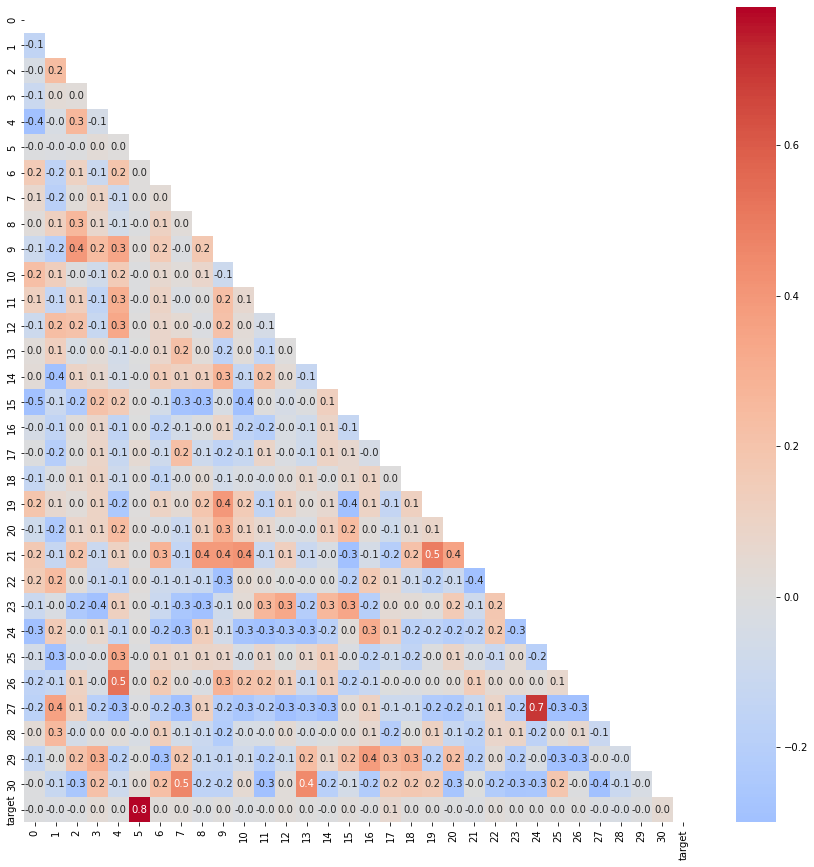

In [19]:
matrix = np.triu(train.corr(method='spearman'))

plt.figure(figsize=(15, 15))

sns.heatmap(train.corr(method='spearman'), annot=True,
            fmt='.1f', vmin=-0.3, center=0, cmap='coolwarm', mask=matrix);

Видим, что 5ый признак сильно коррелирует с целевыми значениями. Посмотрим на его подробнее

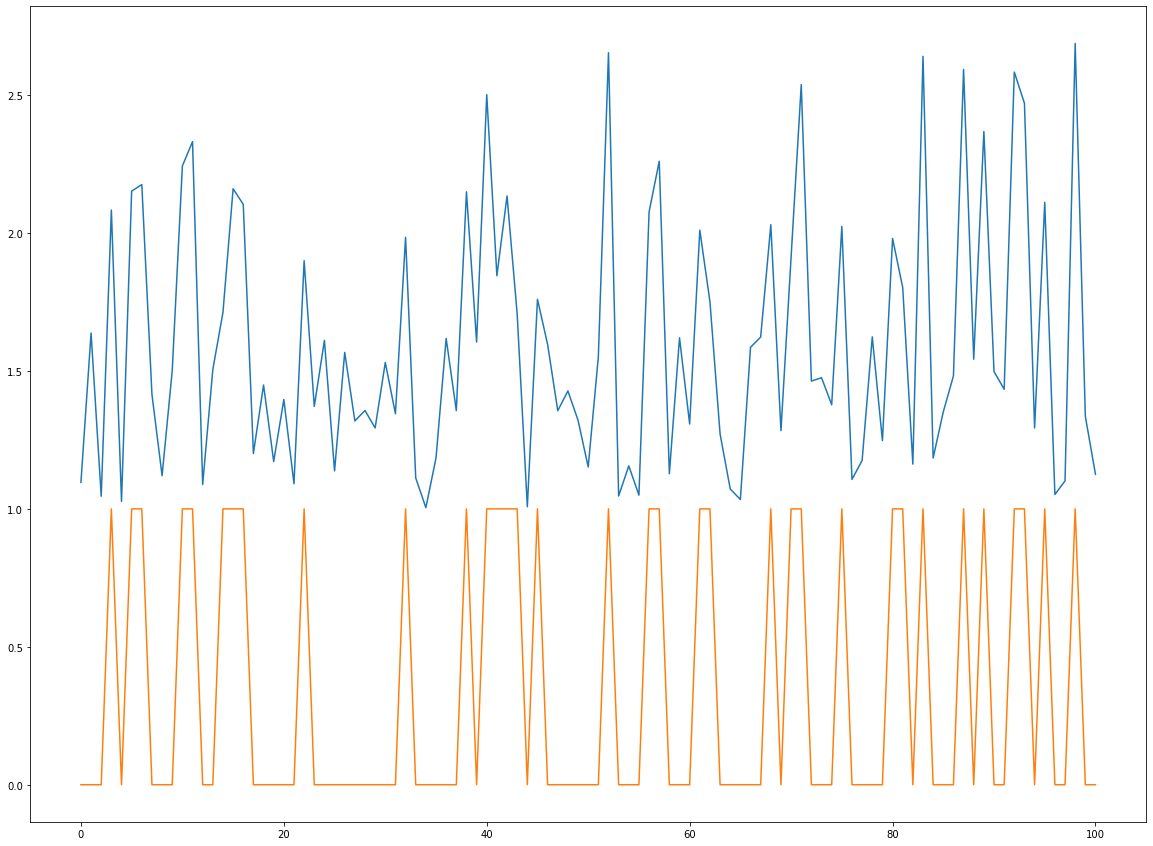

In [28]:
plt.figure(figsize=(20,15))
plt.plot(train[['5', 'target']].loc[:100])
plt.show()

Посмотрим на распределения значений признаков. Видим что все признаки близки к нормальному распределению, за исключением 5го признака

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train['5'].values.reshape(-1,1))
scaled_5 = scaler.transform(train['5'].values.reshape(-1,1))

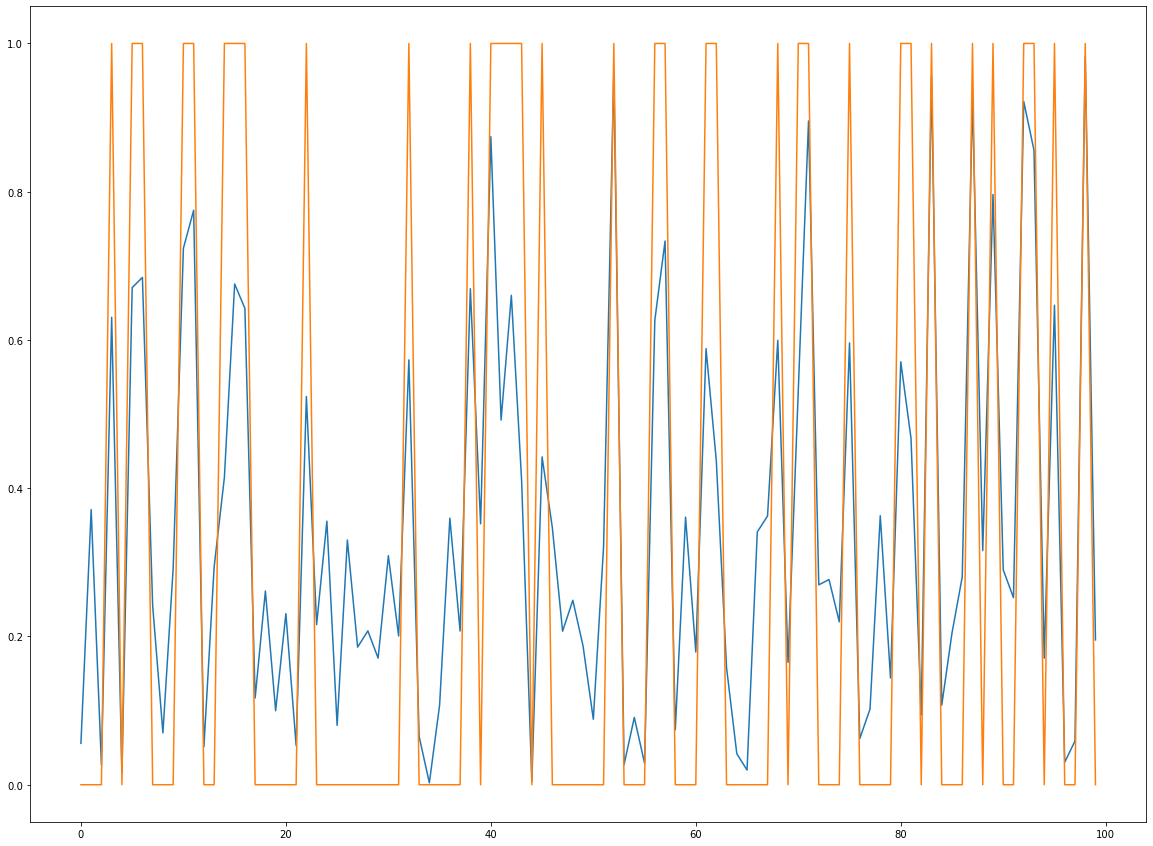

In [62]:
plt.figure(figsize =(20,15))
plt.plot(scaled_5[:100])
plt.plot(train['target'][:100])
plt.show()

0


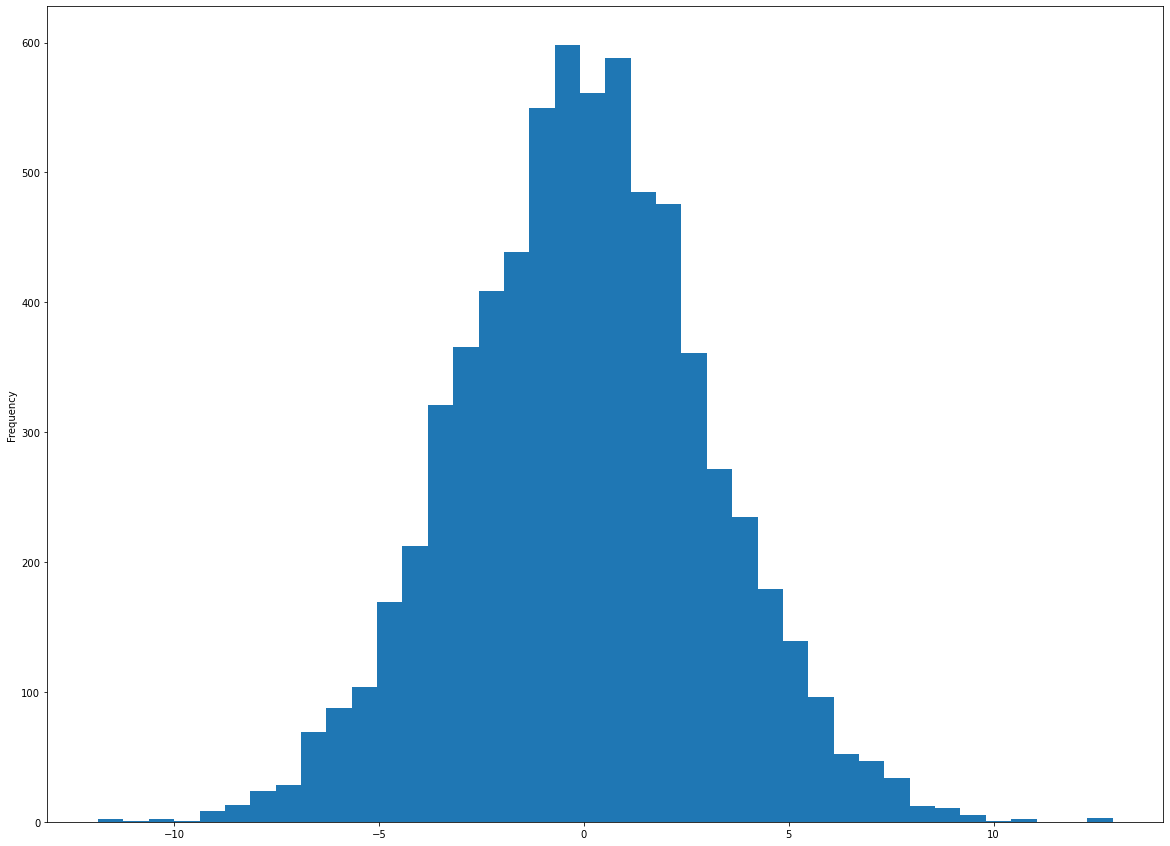

1


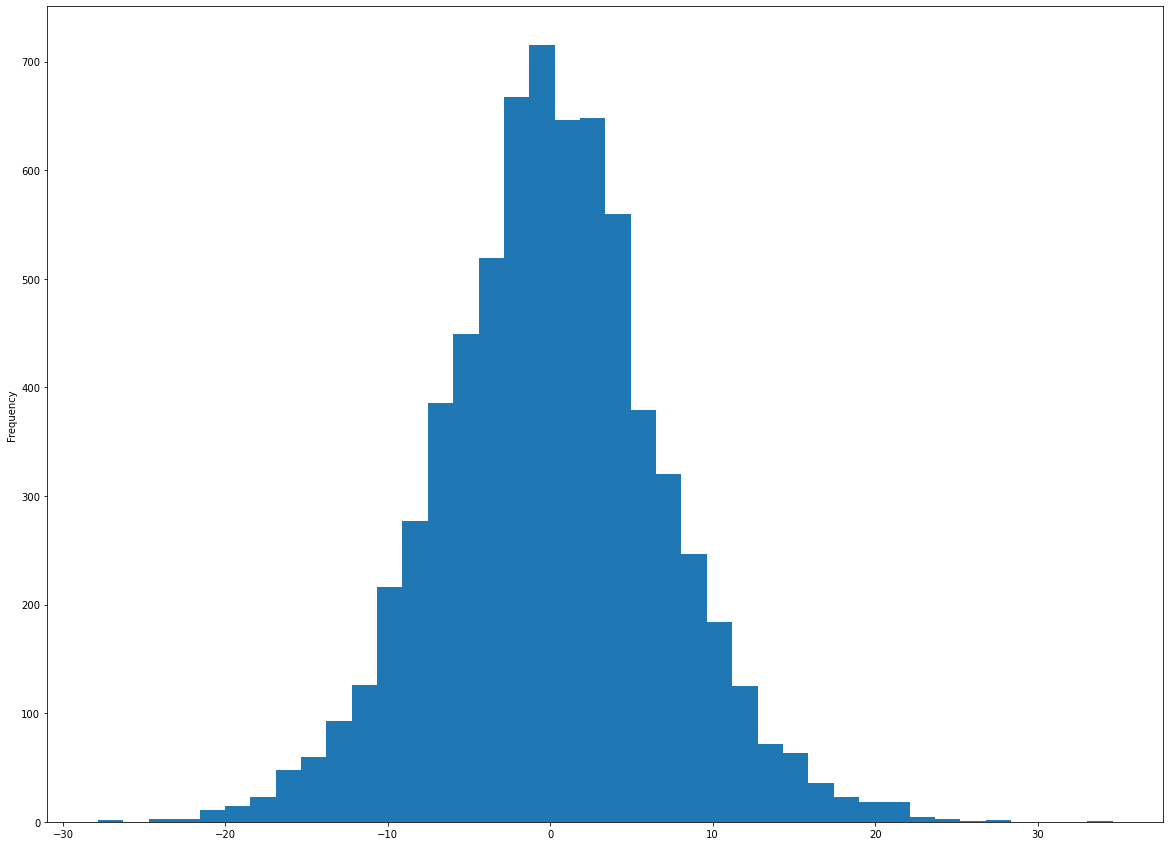

2


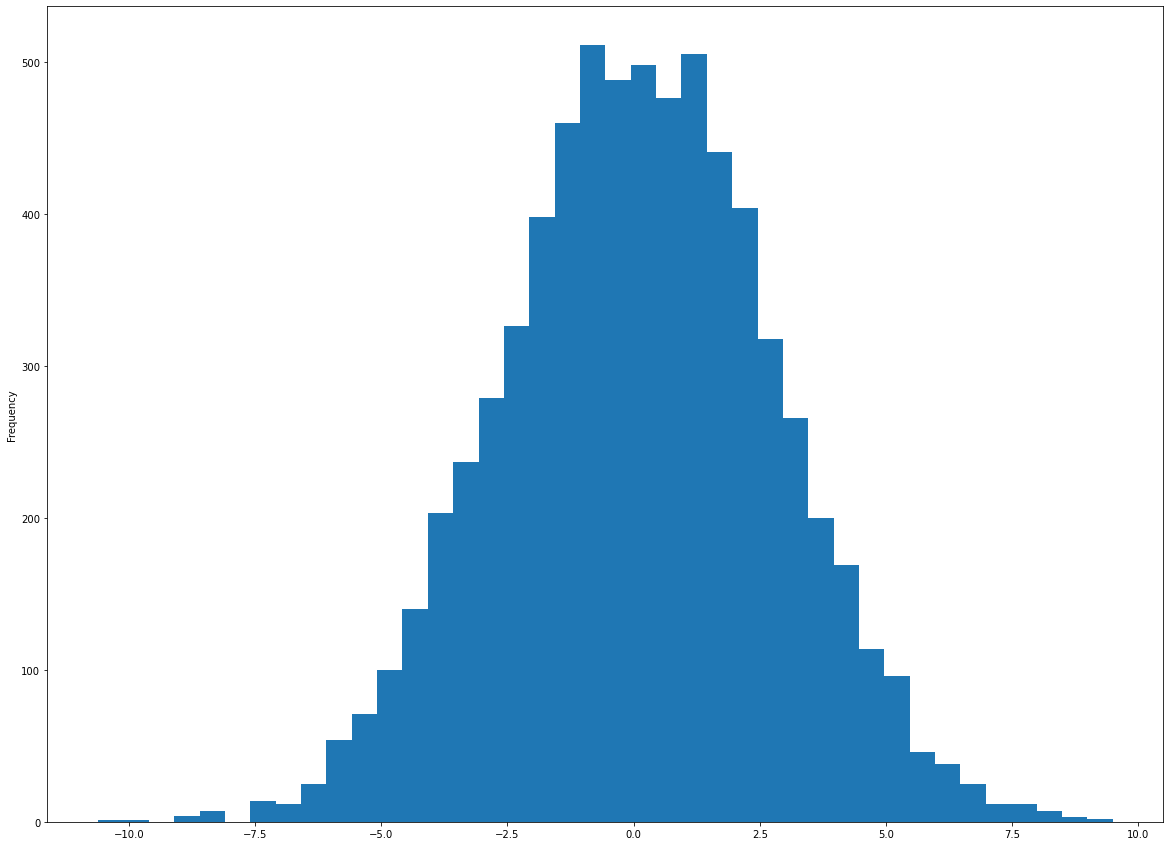

3


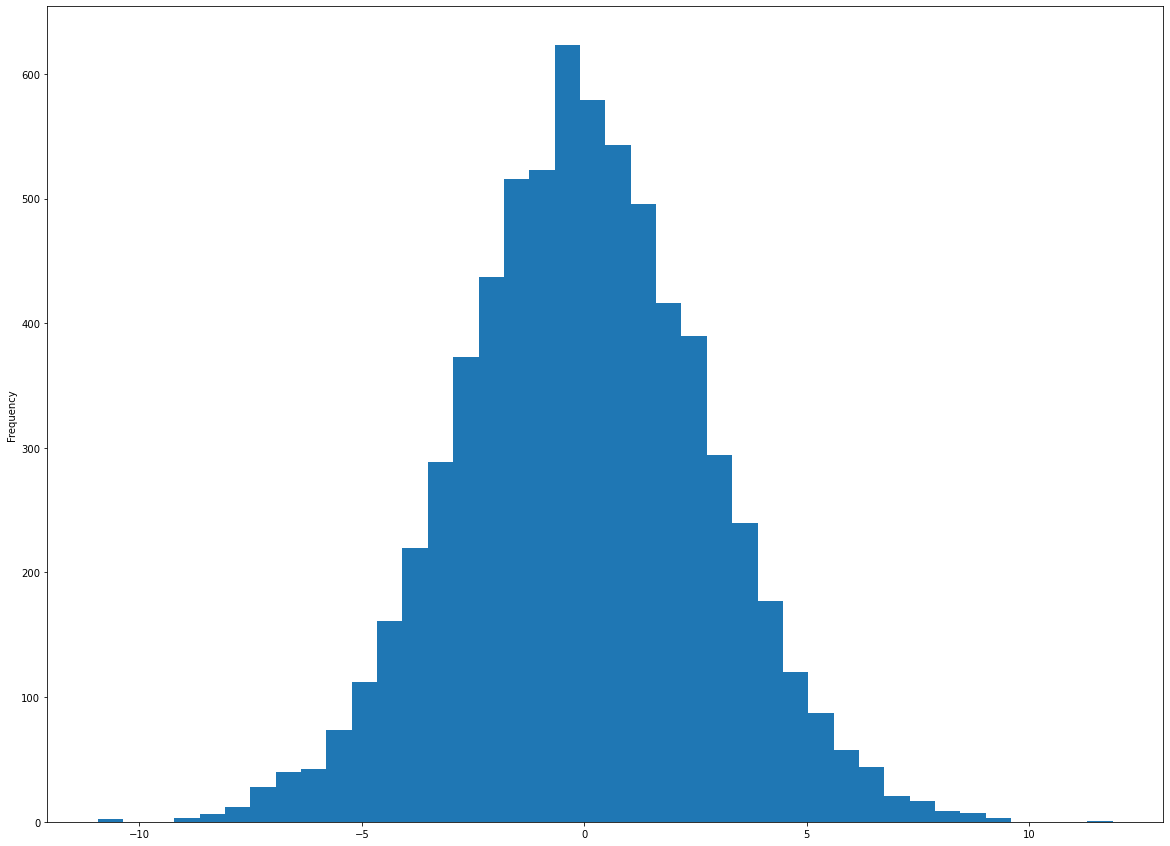

4


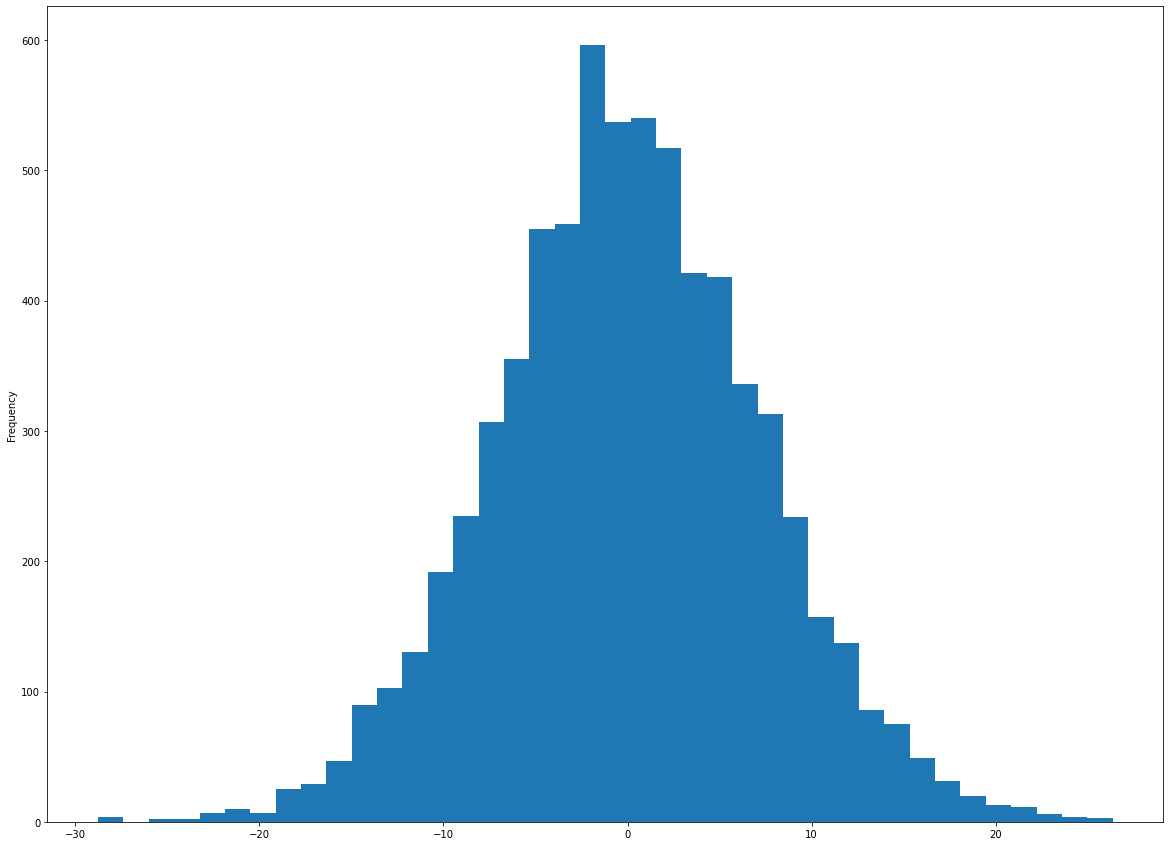

5


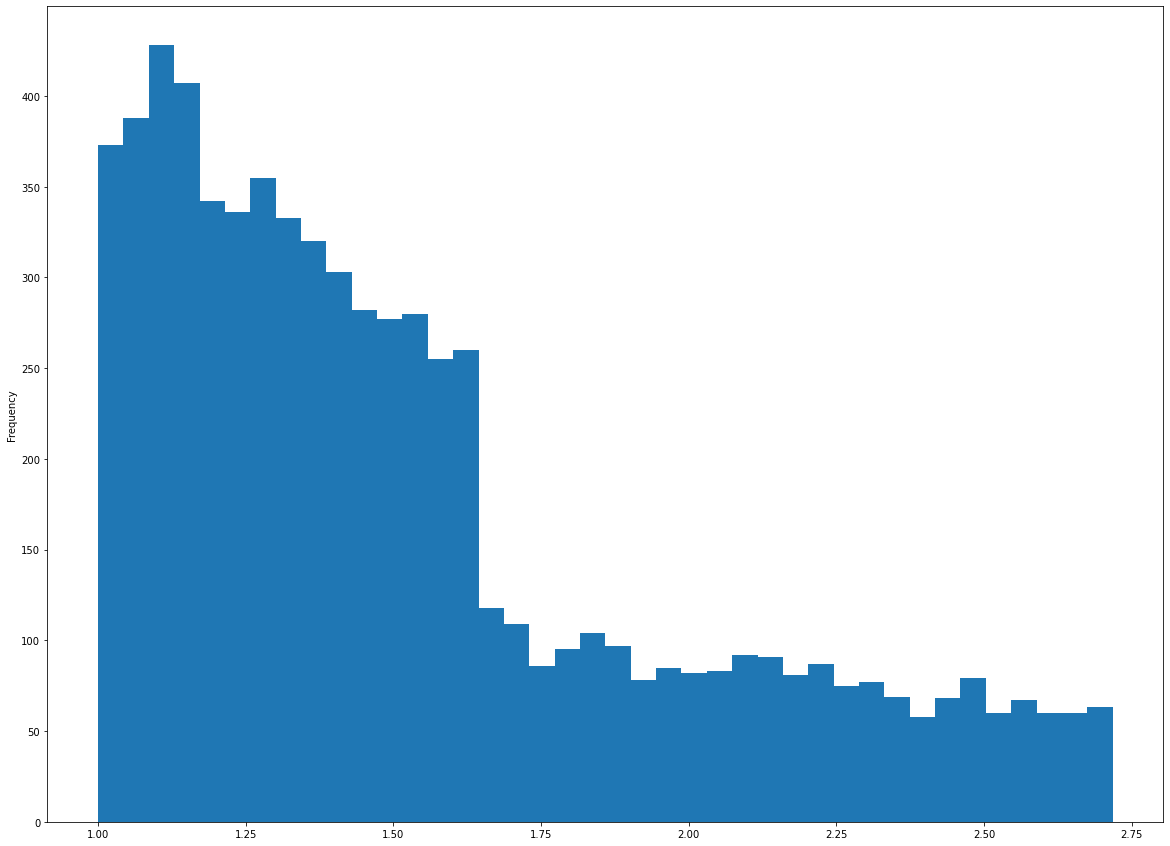

6


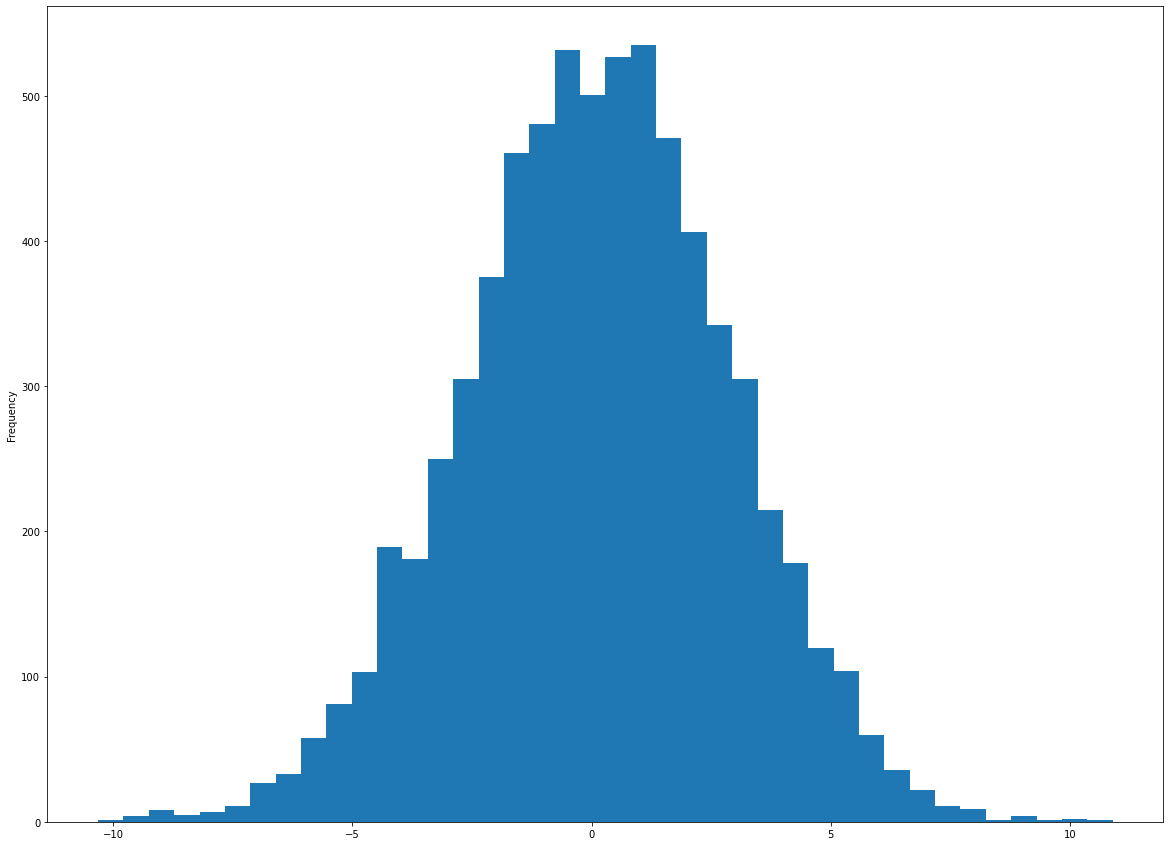

7


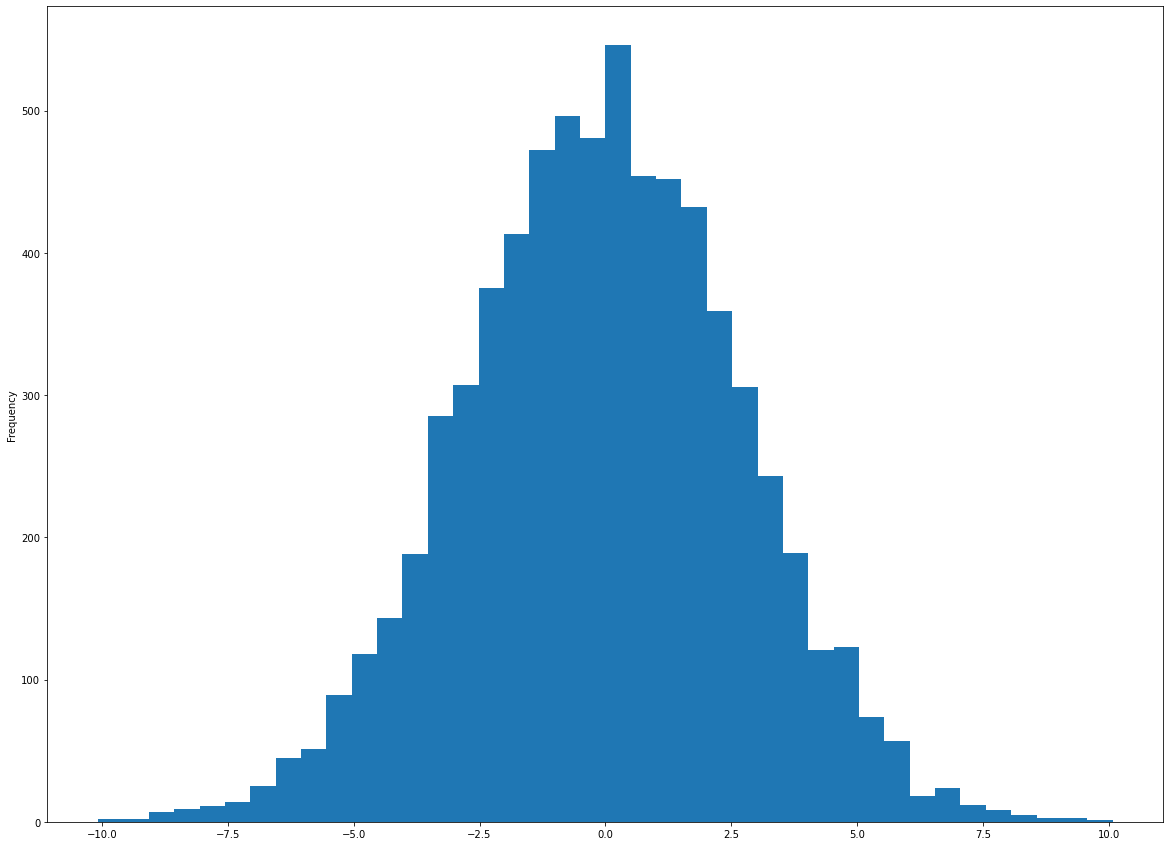

8


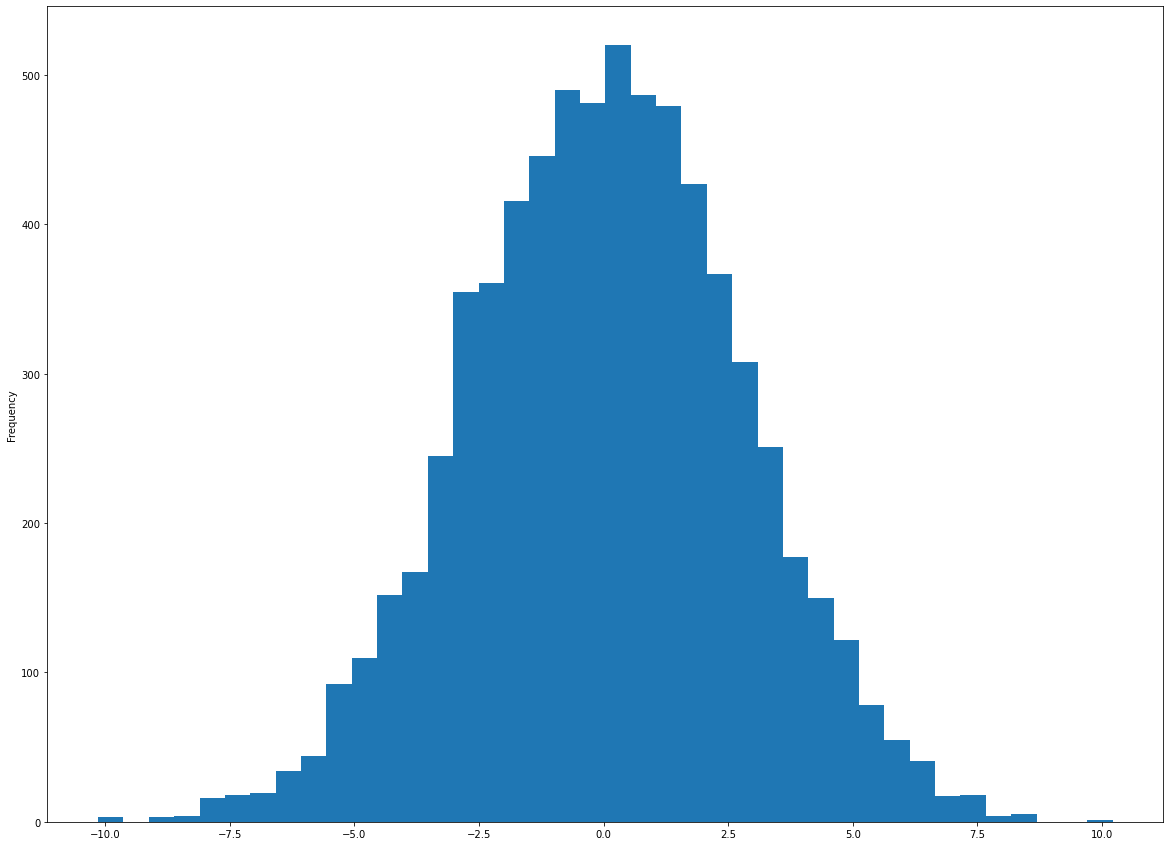

9


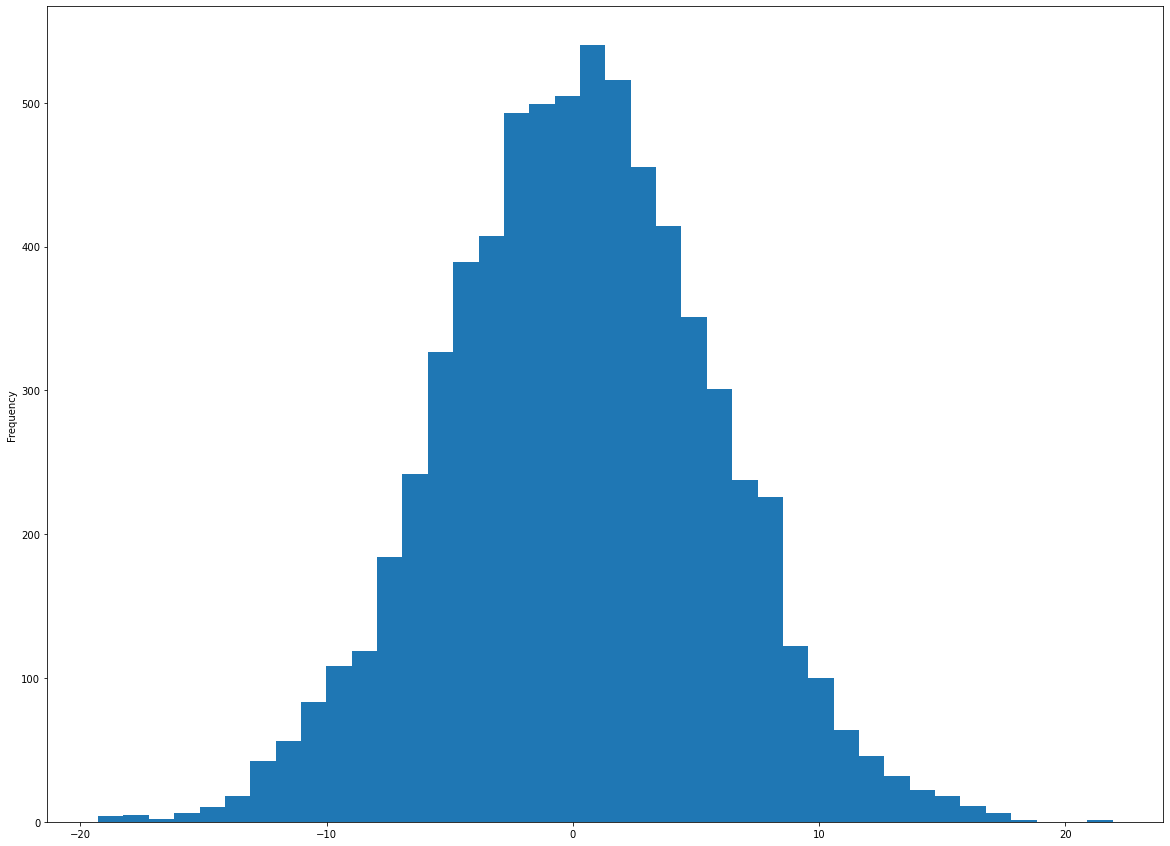

10


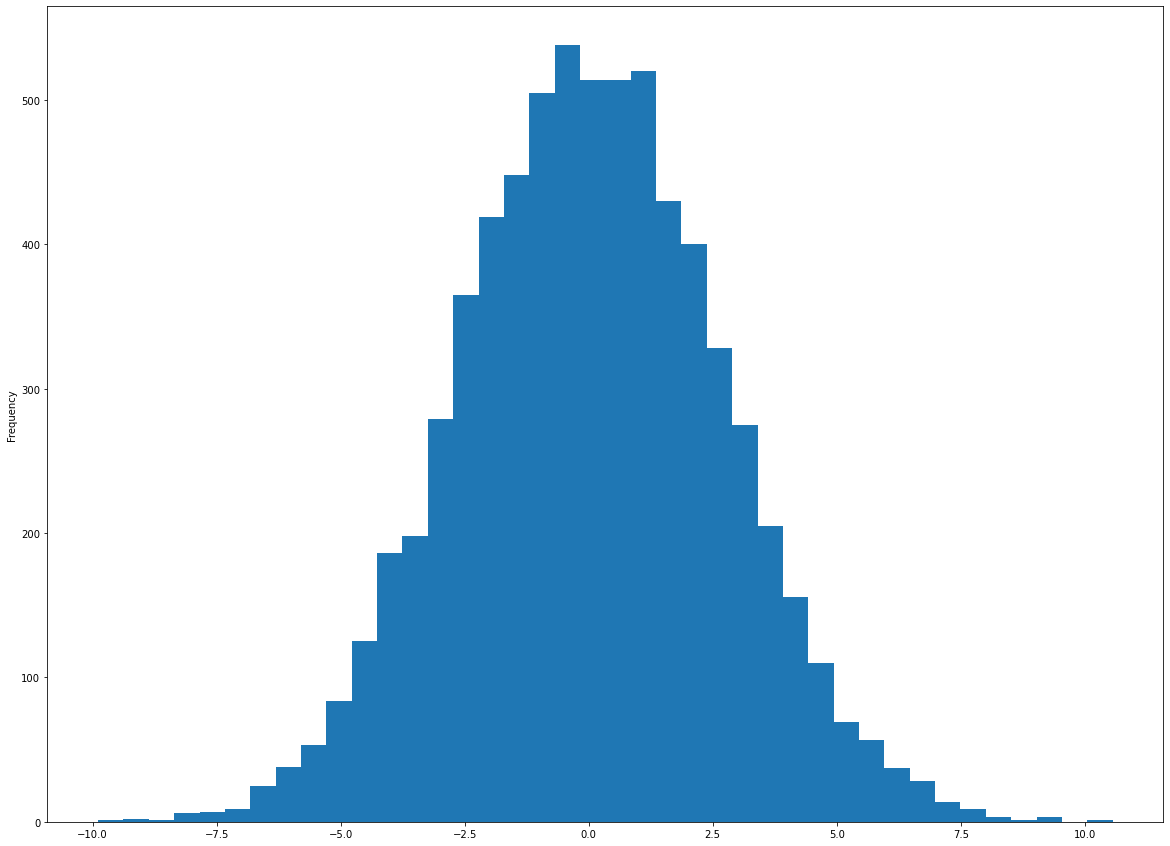

11


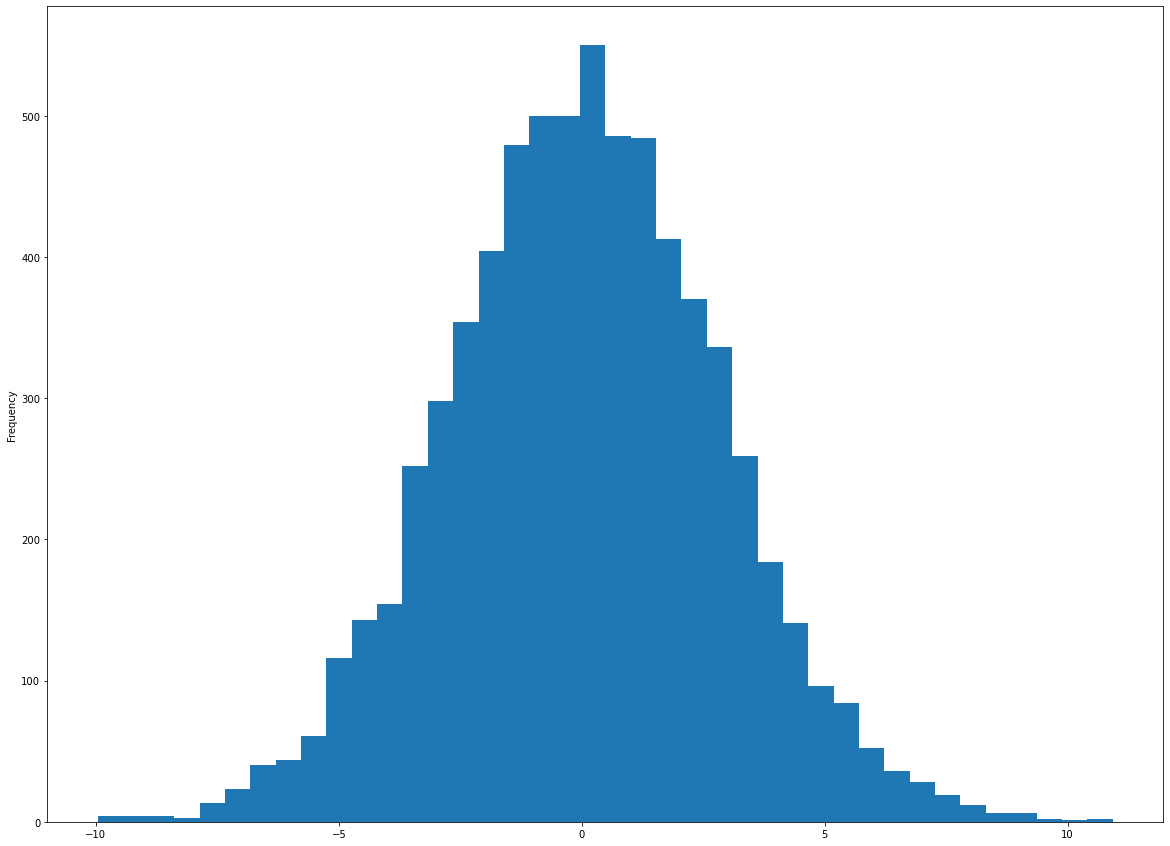

12


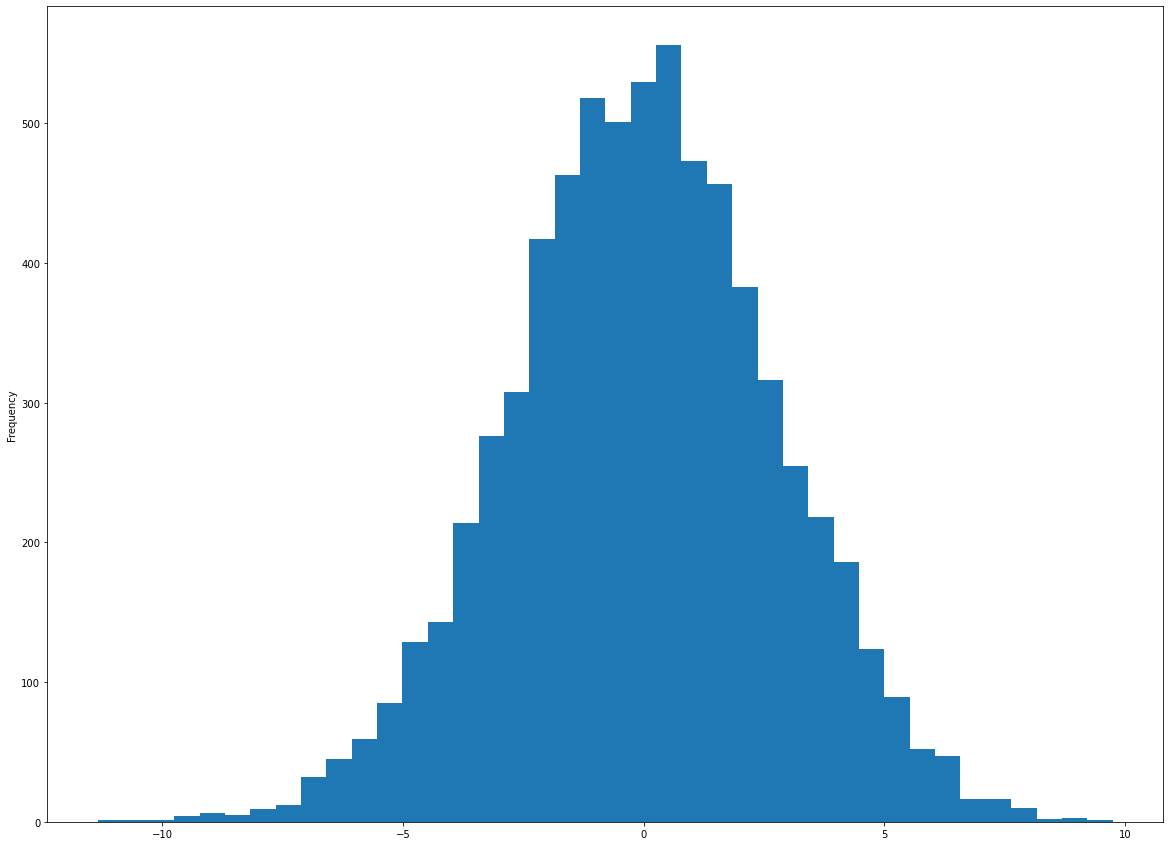

13


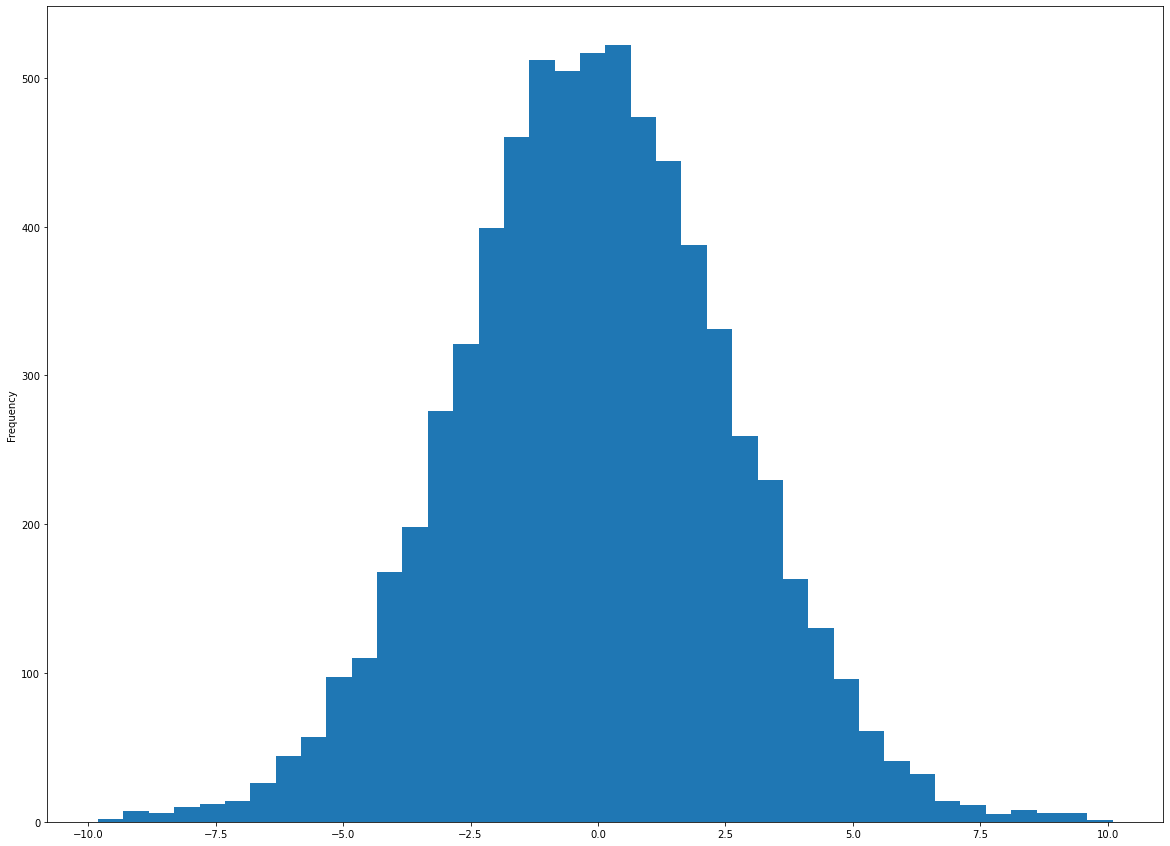

14


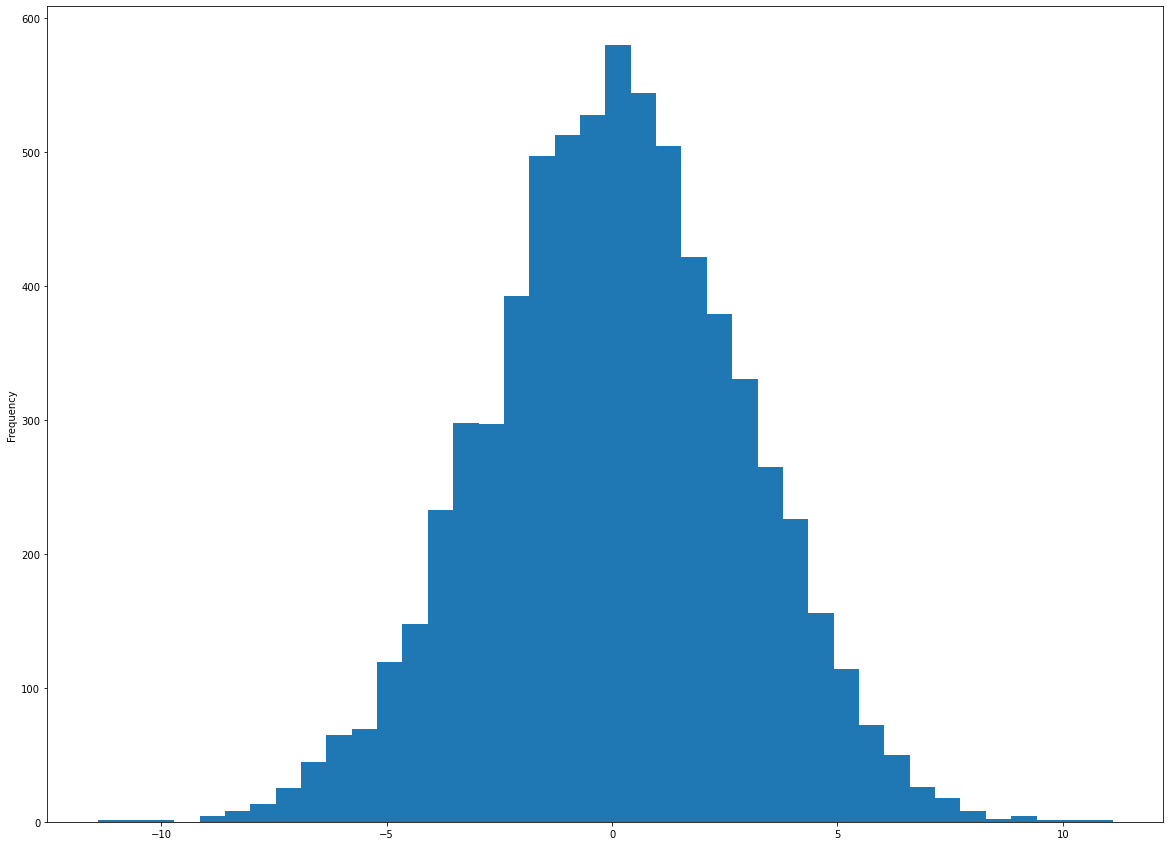

15


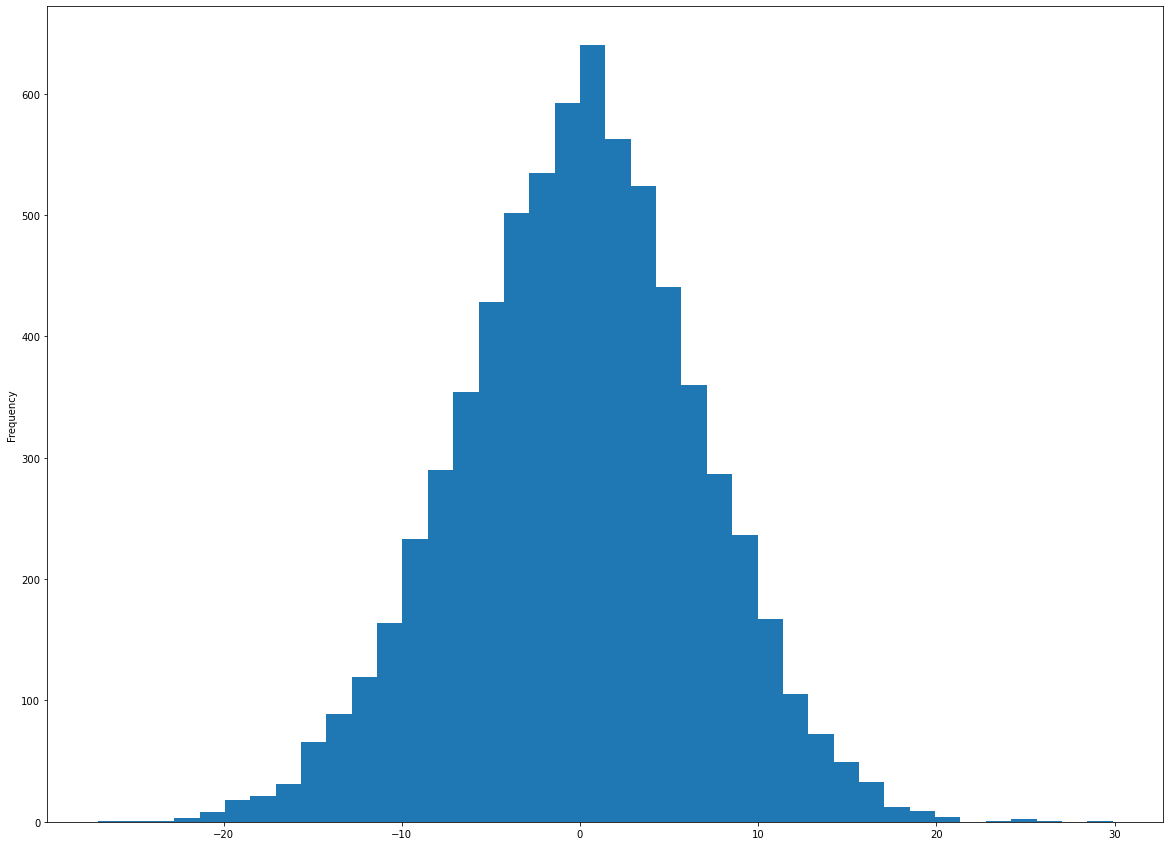

16


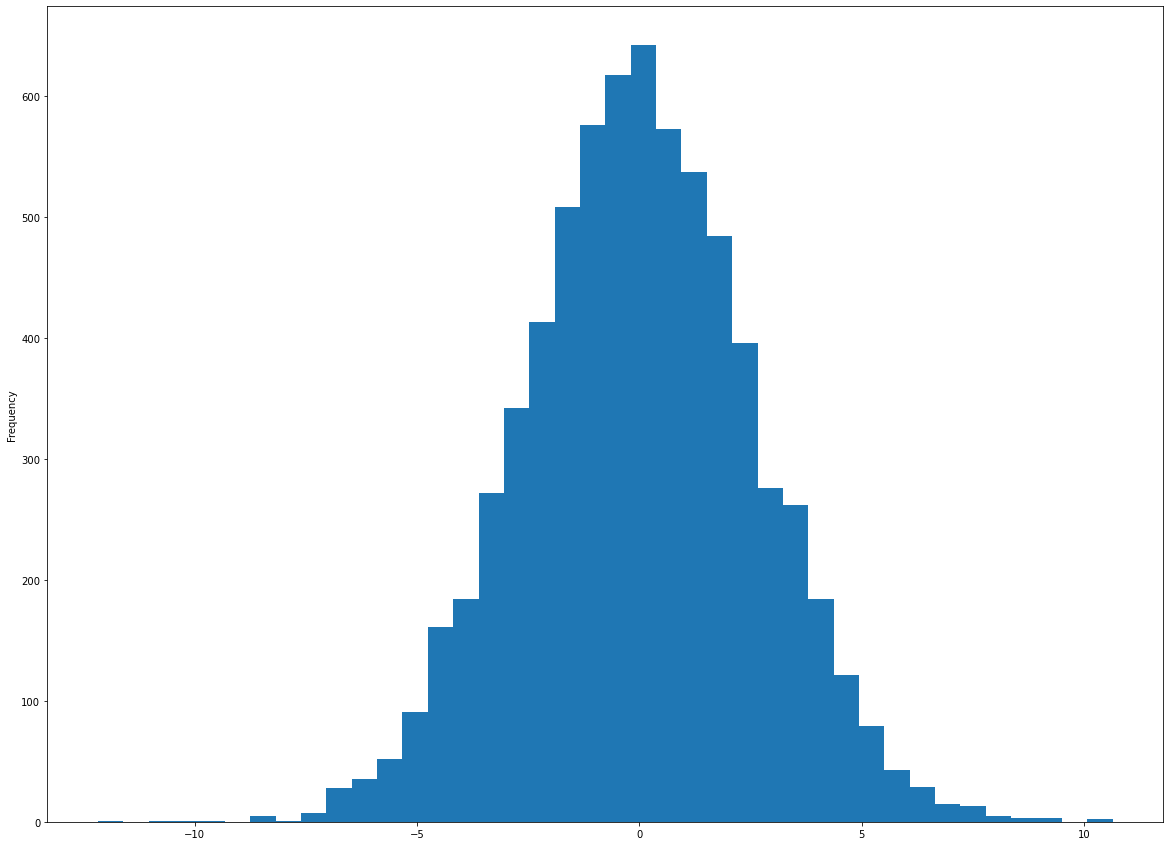

17


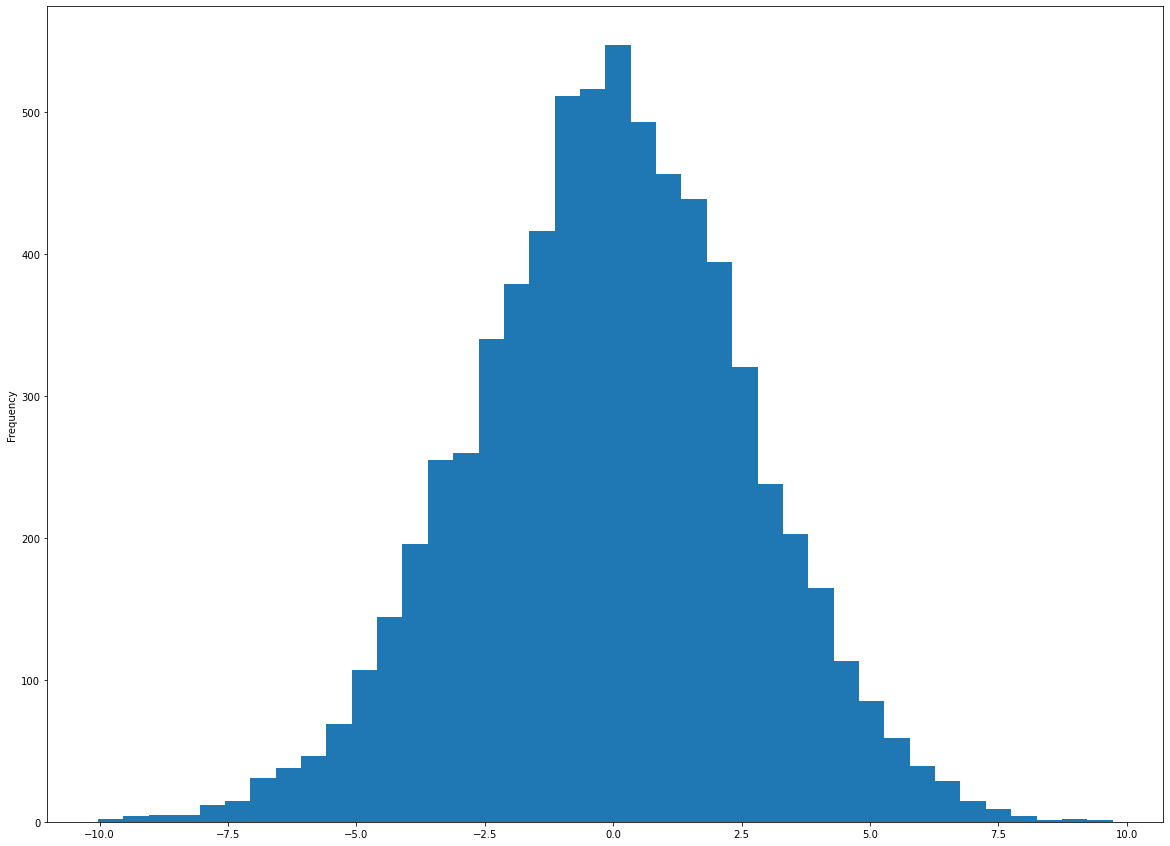

18


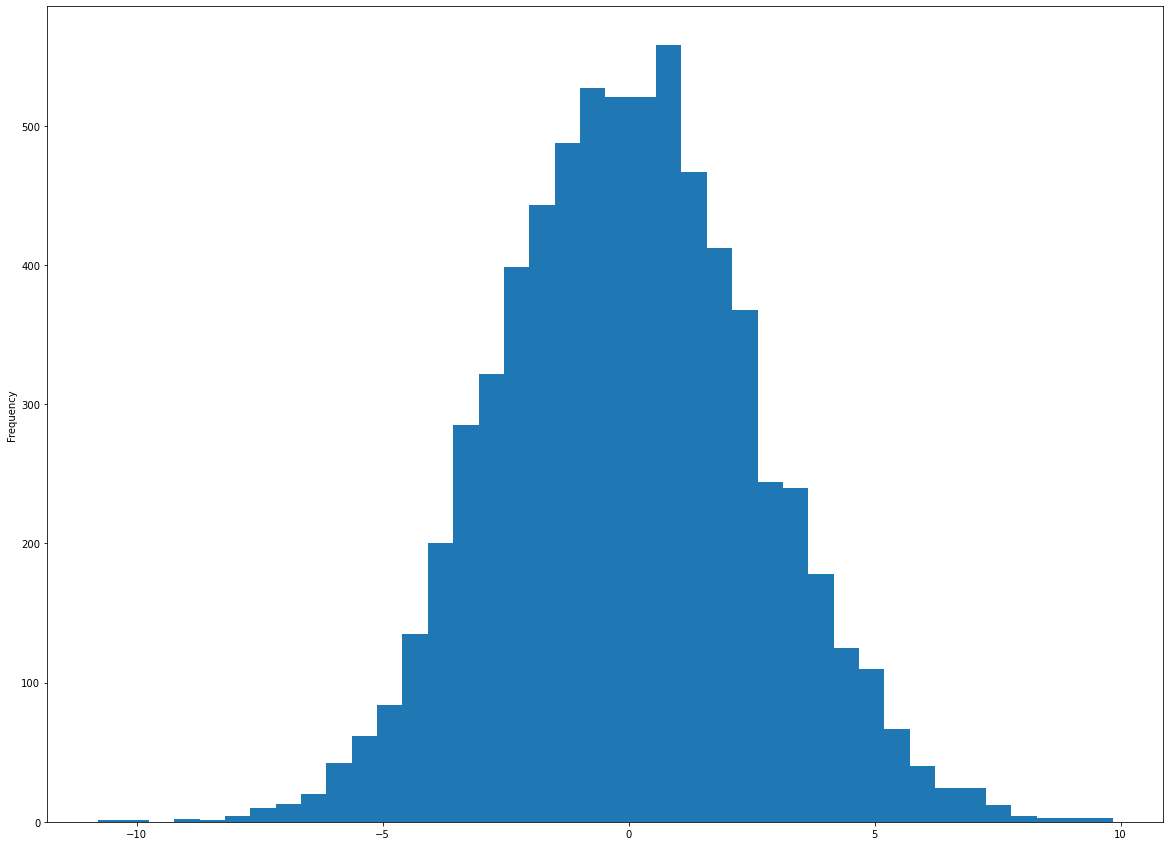

19


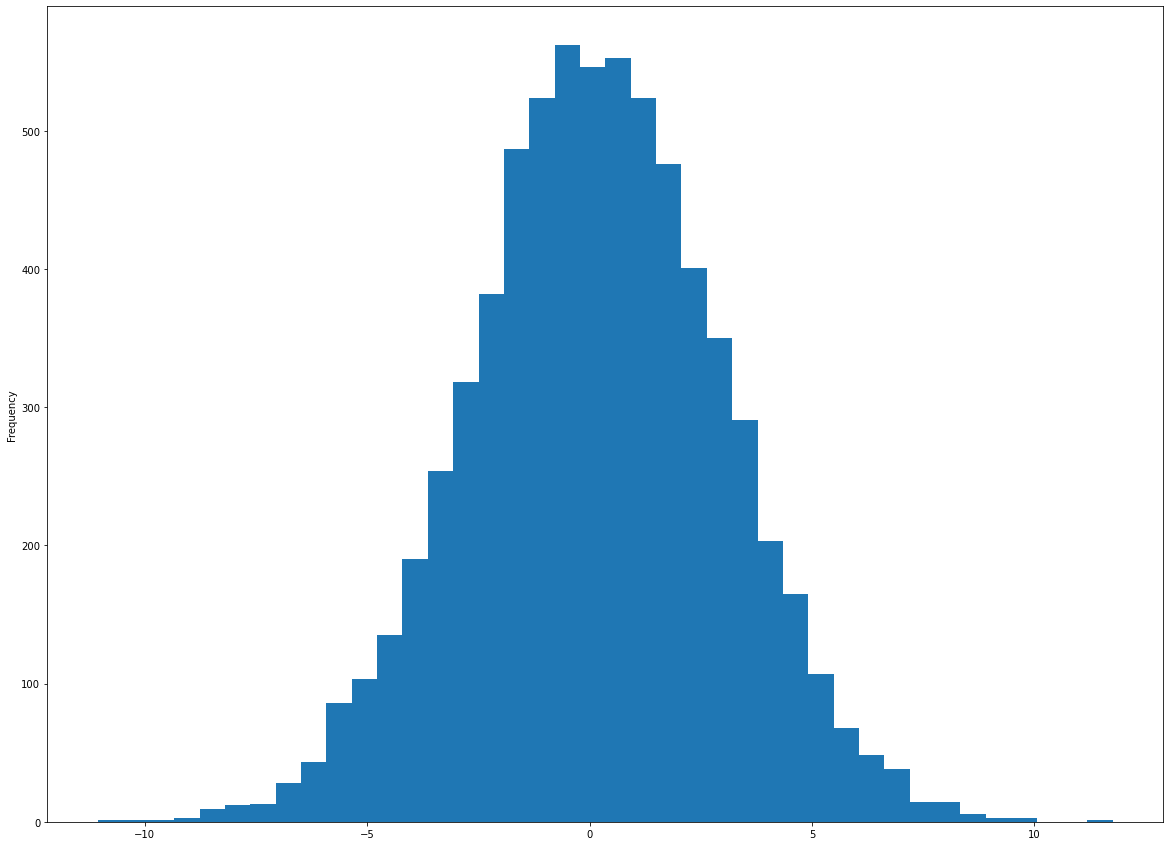

20


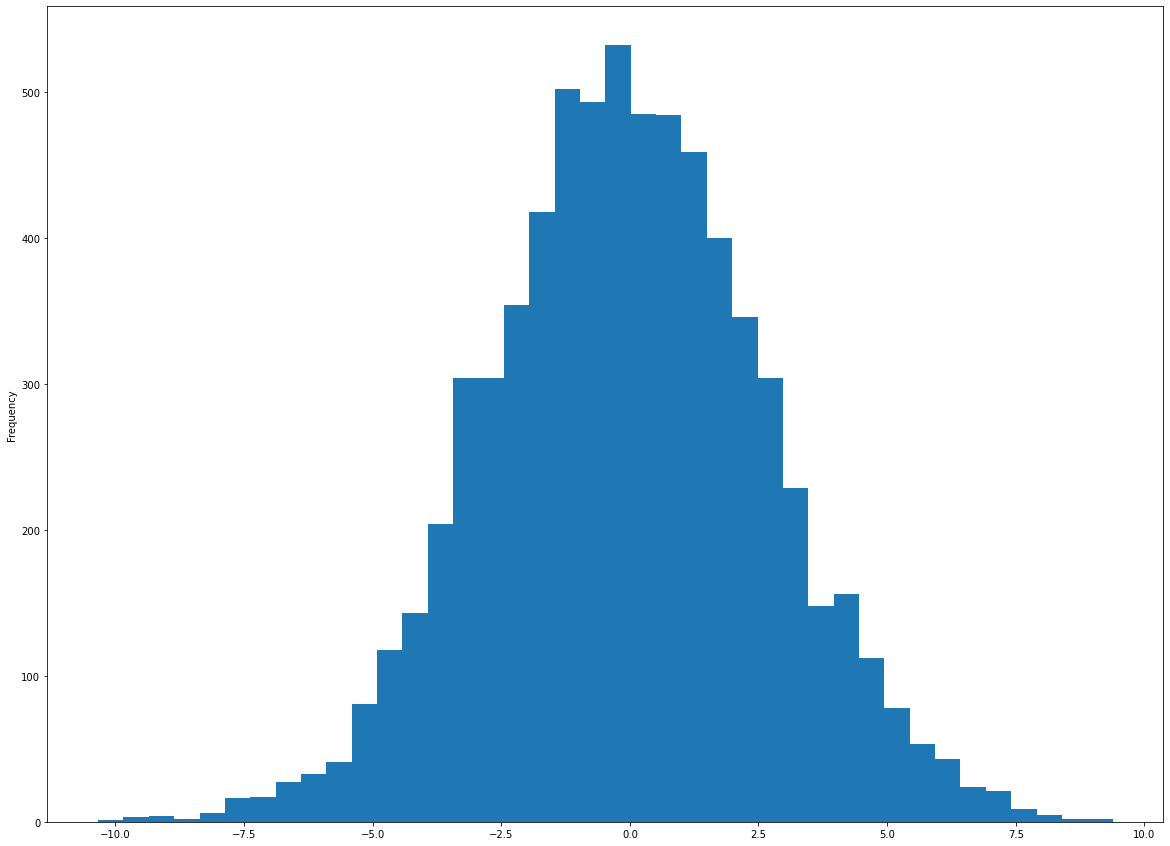

21


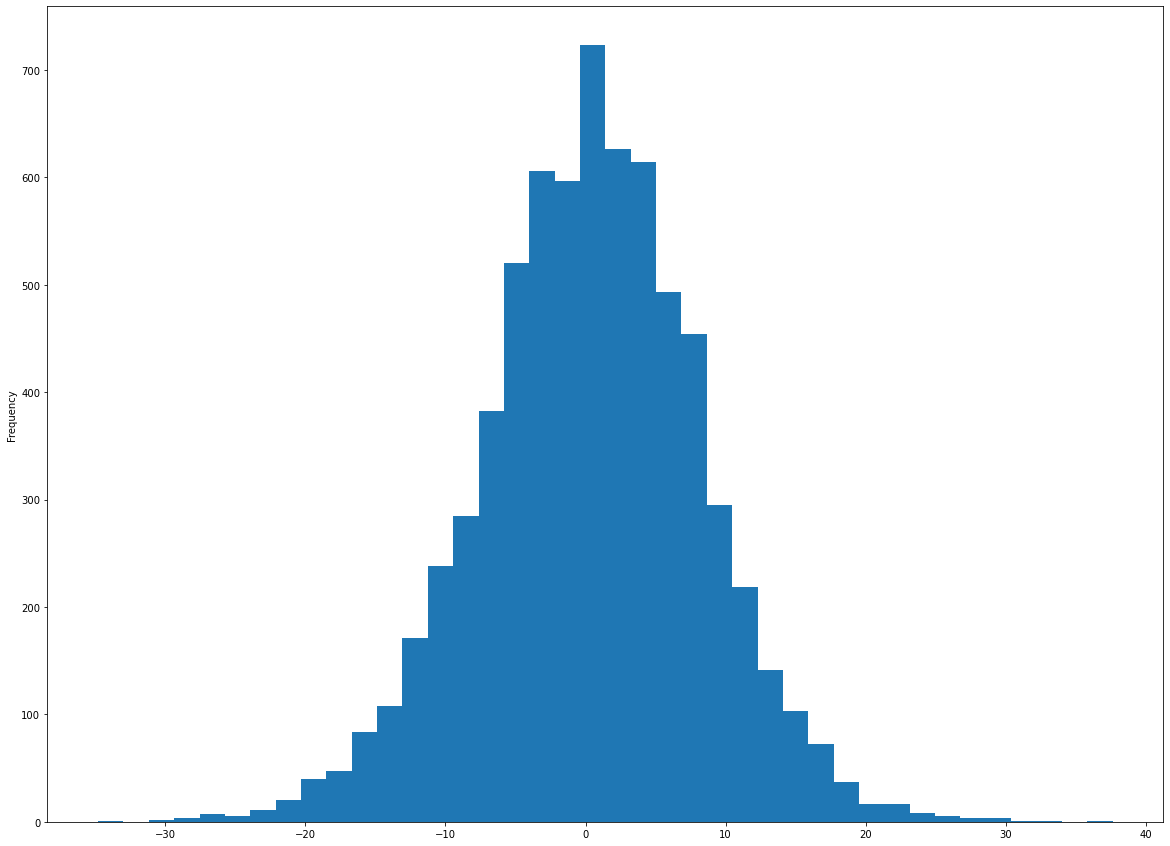

22


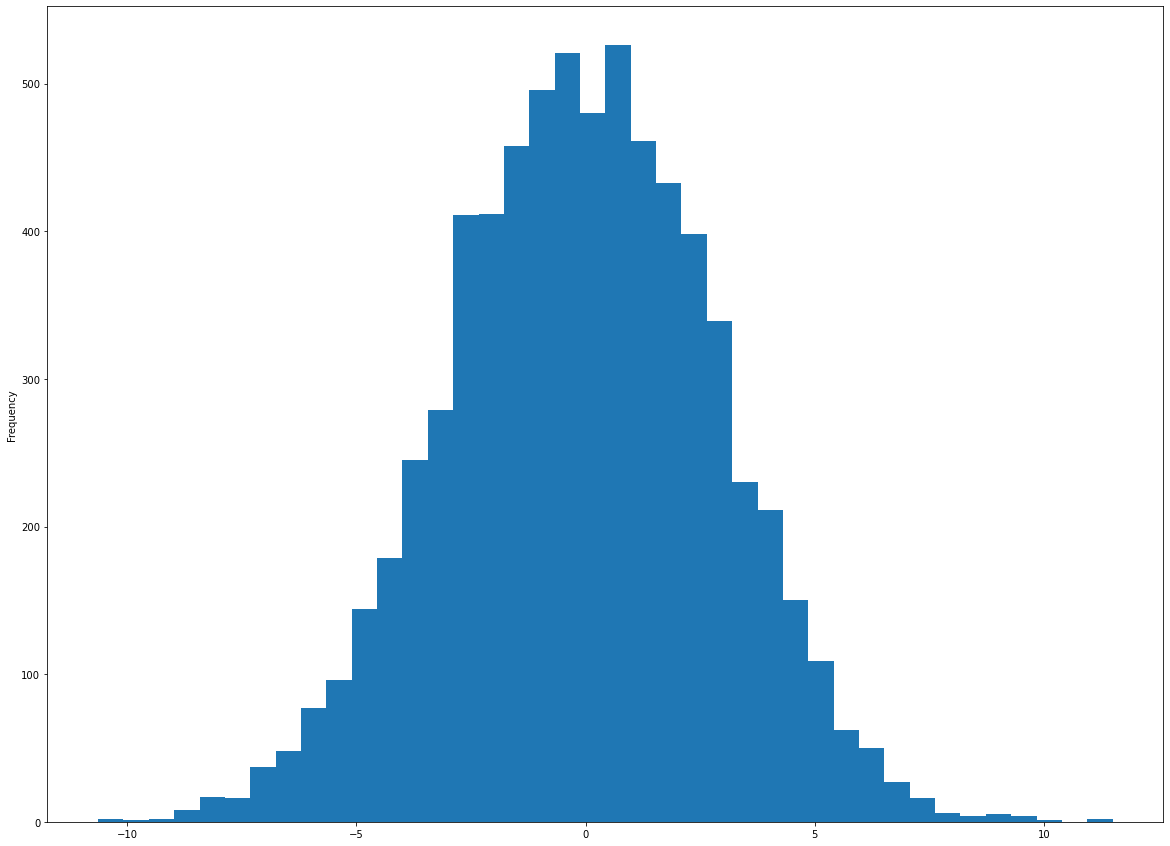

23


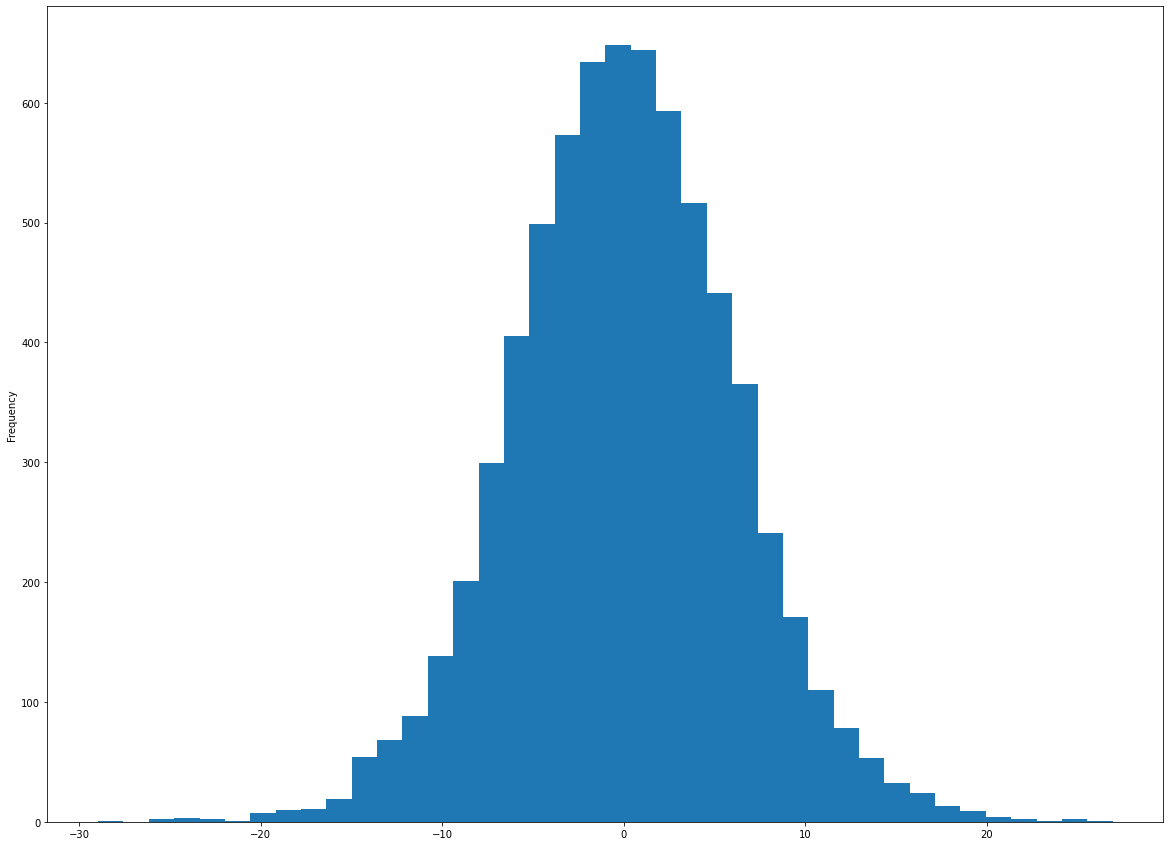

24


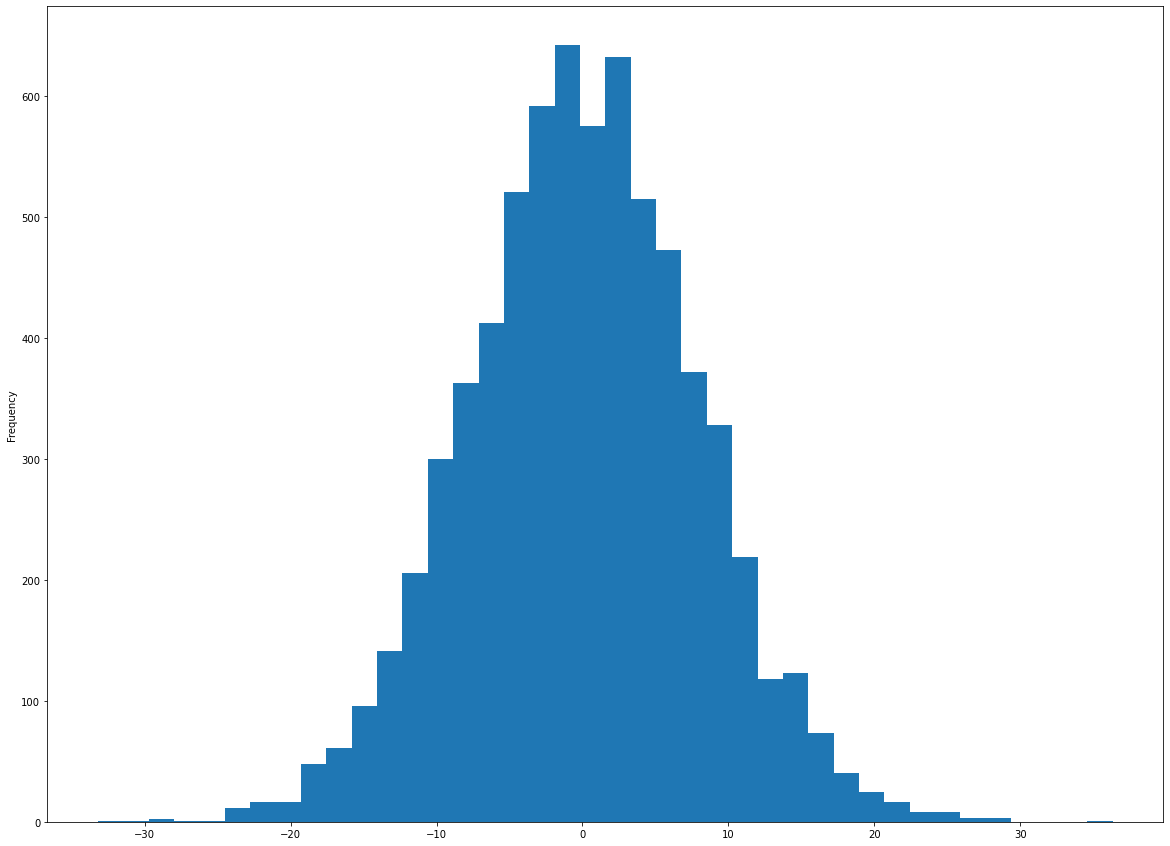

25


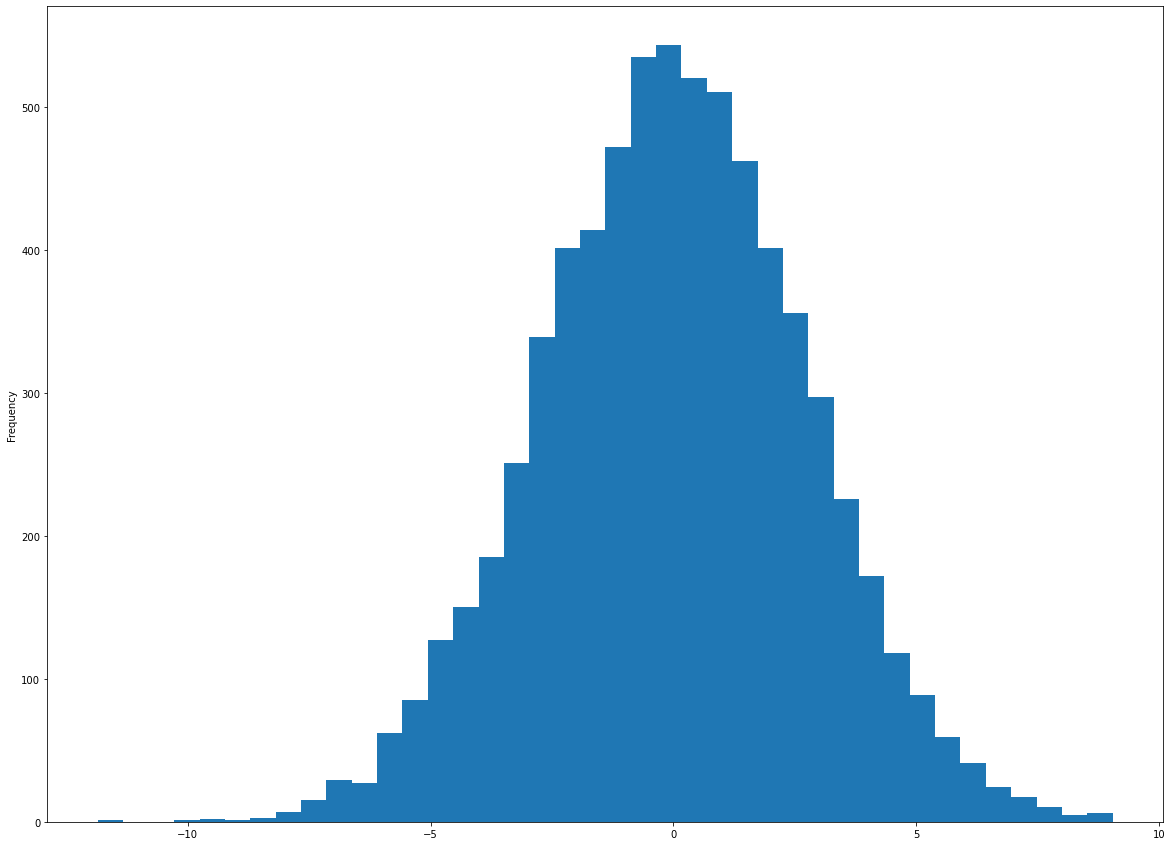

26


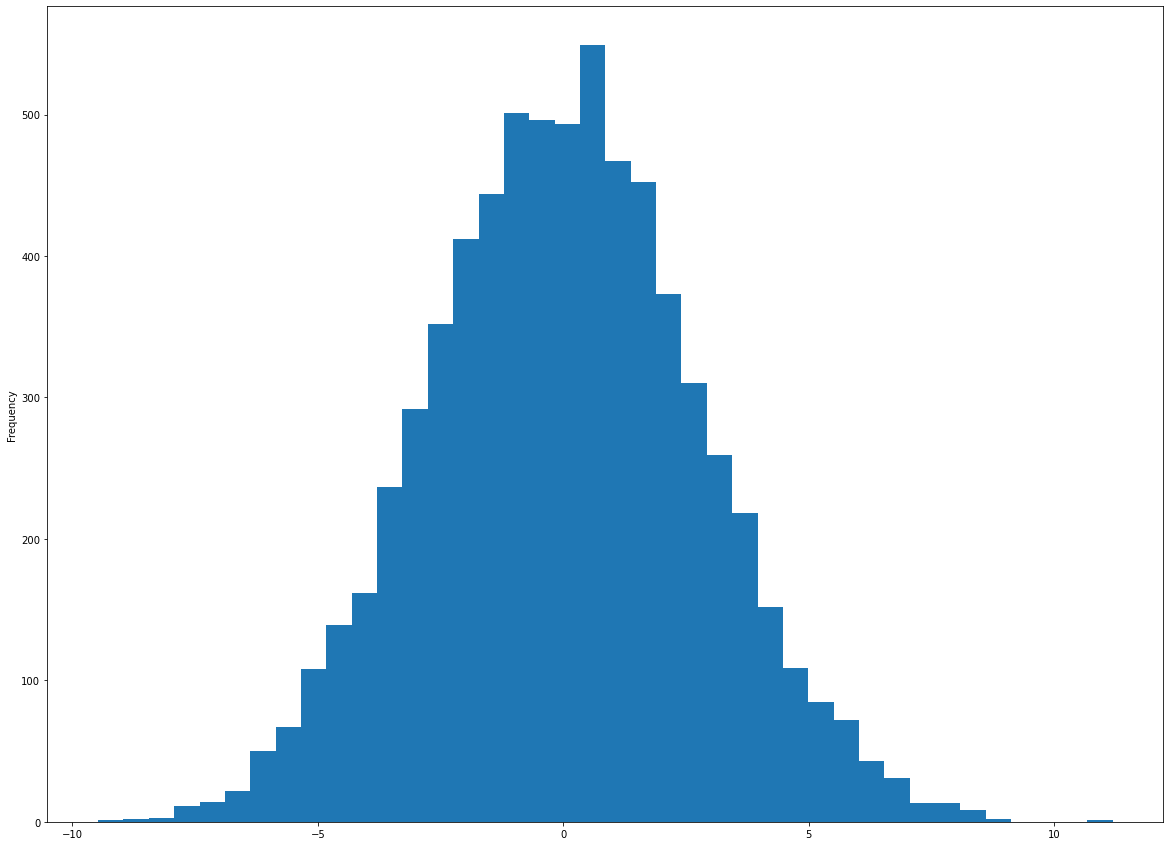

27


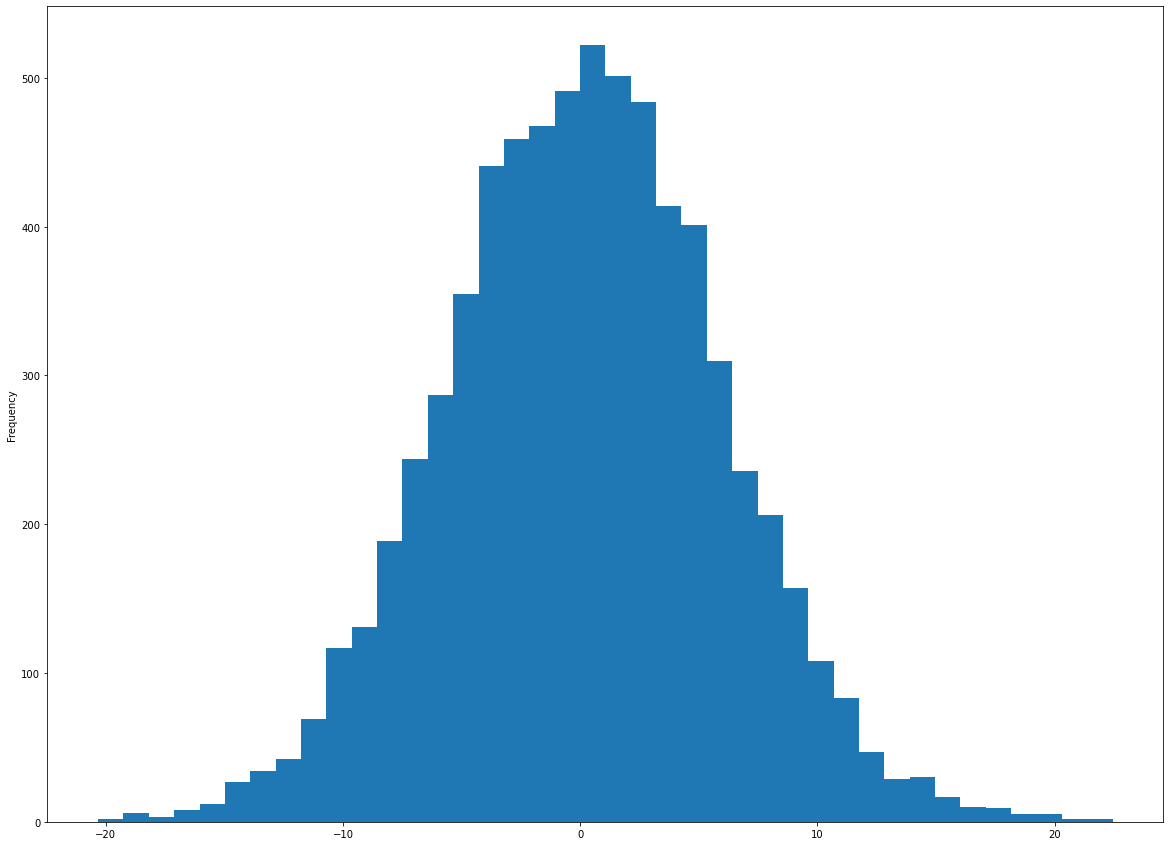

28


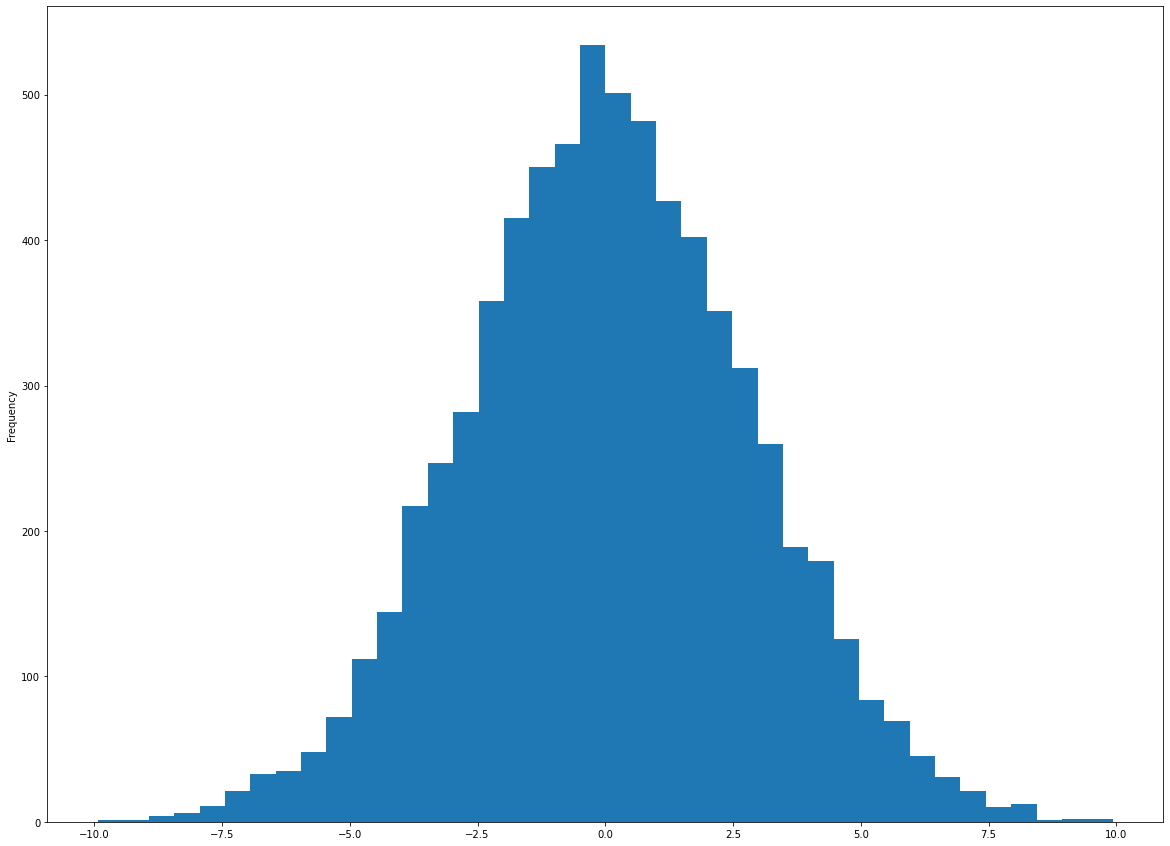

29


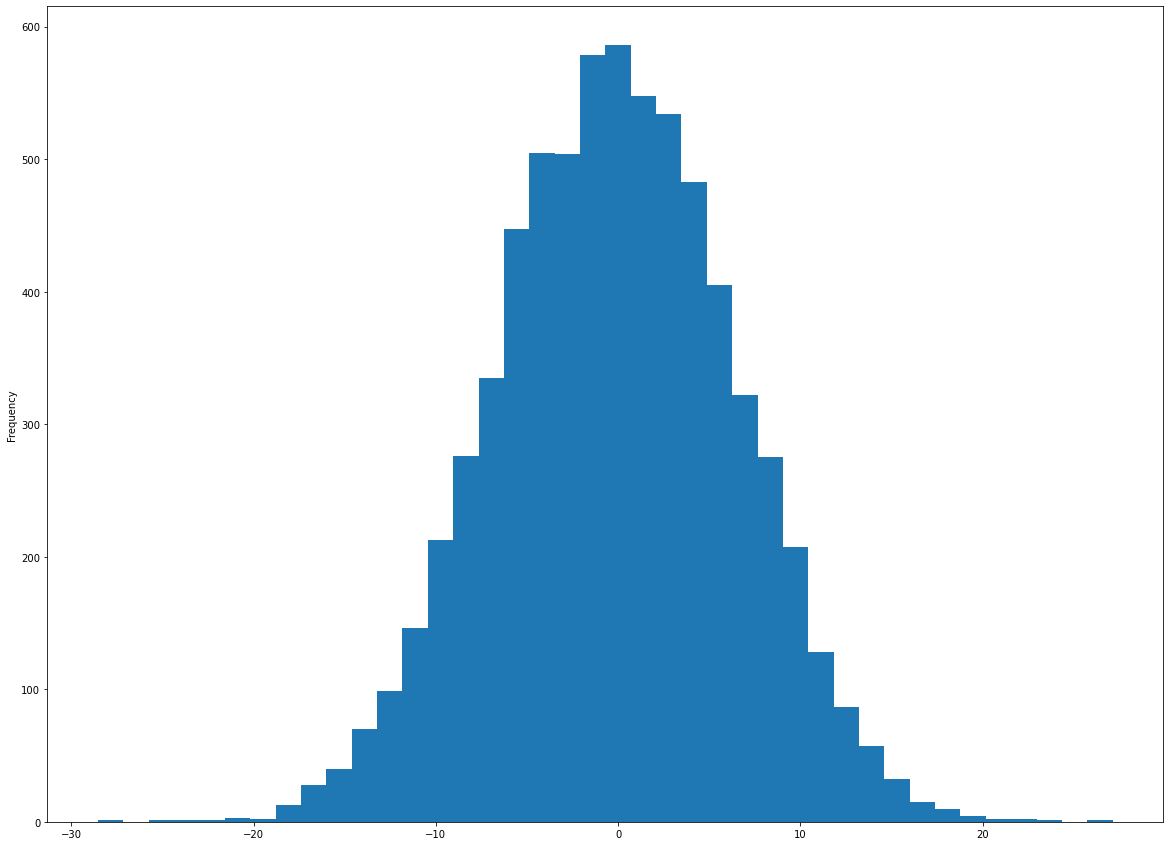

In [40]:
for i in range(30):
    plt.figure(figsize=(20,15))
    print(i)
    train.iloc[:,i].plot.hist(bins=40)
    plt.show()

Посмотрим на распределение целевых значений

In [105]:
train['target'].value_counts()

0    4963
1    2000
Name: target, dtype: int64

Видим, что 71.3% датасета принадлежит к случаям, когда болезнь не была вылечена (target=0)

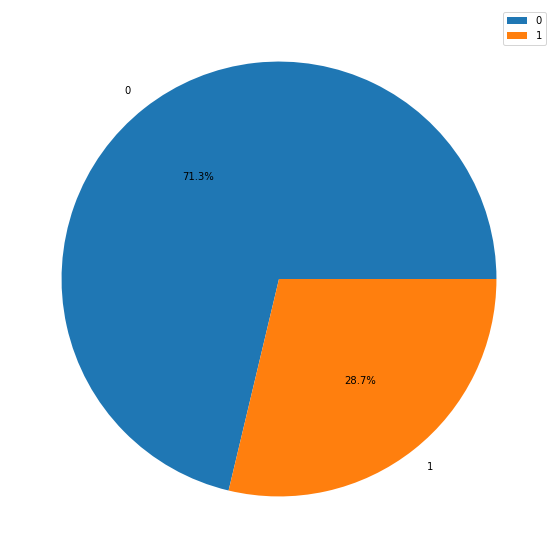

In [8]:
plt.figure(figsize=(15,10))
labels = train['target'].value_counts().index
patches, texts, _ = plt.pie(x=train['target'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.legend(patches, labels, loc="best")
plt.show()

## Test

Посмотрим внимательеней на датасет с тестовыми данными

In [65]:
test

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-4.768975,-1.744984,0.069141,-6.560182,13.267557,1.768138,1.711161,-5.289421,2.682271,-2.763065,...,4.198756,-0.625212,11.053370,1.535982,0.410761,-3.754269,8.633258,0.224213,-2.310344,-20.482680
1,3.085184,7.679585,-2.392444,-1.334928,-17.347661,2.470484,-0.662081,-0.719648,-2.489930,-11.762400,...,-1.176409,1.365061,0.140867,-4.210869,-5.718286,-4.055603,9.264081,-4.221163,7.481250,9.426657
2,-1.498828,-3.945847,-1.647106,0.058655,1.204024,1.043502,5.246244,2.123335,2.851375,4.398413,...,0.301051,0.758360,0.090010,-1.550171,-0.971835,2.027758,-2.723663,0.749390,-12.130969,4.706467
3,-2.813839,-1.913776,1.308982,3.866011,-9.249616,2.265848,-3.257832,-2.233508,3.623846,4.665100,...,2.316560,-0.590067,-6.825693,8.512672,-3.259642,-2.297466,4.758336,-2.134407,10.448348,-5.808233
4,-2.098517,1.831659,2.587683,1.507983,5.421837,2.184649,1.214167,0.402367,1.256427,17.582508,...,20.077786,-2.657541,5.592968,1.339930,0.425855,2.649136,-6.496886,-0.726197,-12.478830,1.058612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,2.508189,6.822515,2.302526,0.155807,-1.023587,2.203670,0.845270,-0.321115,2.363140,-2.496653,...,5.663491,-1.863070,1.468148,-9.942350,1.963485,-0.021794,-3.108828,1.814311,-6.039624,-0.044558
3916,6.053699,-10.316161,0.091797,-2.663973,-5.178977,2.212814,-1.988558,2.591763,-4.962822,3.604147,...,11.649862,-1.178201,16.564539,-20.700734,0.298458,-2.706402,-13.435369,-0.681875,-0.318238,4.397039
3917,3.640882,11.891265,2.557919,-3.911234,-2.221441,1.812180,0.577151,-2.354551,3.783805,-3.407179,...,-6.949225,3.605393,1.310036,9.611504,-2.088678,-0.117393,7.325959,2.529202,-8.628251,-7.028405
3918,2.534315,3.506921,-0.277519,0.987045,-5.451658,2.360820,-2.817228,3.186593,2.111677,-6.887573,...,-13.049812,2.289606,-2.186994,-0.420343,3.017078,-1.656409,-1.145950,1.324894,2.156788,-2.966942


In [64]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,...,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,0.015145,-0.020597,0.067258,-0.043136,-0.131702,1.704046,0.085163,-0.036655,0.016530,0.120174,...,0.200395,-0.022683,0.040625,-0.036537,0.008034,0.008786,0.050143,-0.135347,-0.109935,0.158666
std,3.075687,6.726325,2.695648,2.724650,7.458724,0.485110,2.802093,2.837274,2.767292,5.471667,...,7.777682,2.913653,6.569946,8.296168,2.793608,2.799258,5.715594,2.784791,6.524374,6.466419
min,-10.751347,-25.064691,-10.864731,-9.072677,-28.765004,1.000133,-9.748844,-10.728023,-11.077209,-22.657662,...,-31.982892,-9.998571,-27.444193,-27.156742,-9.619792,-8.805270,-19.133216,-9.673340,-23.701751,-21.738288
25%,-2.058661,-4.408143,-1.762262,-1.845699,-5.086969,1.275642,-1.841325,-1.982955,-1.822017,-3.443043,...,-4.814101,-1.983966,-4.175535,-5.519472,-1.879208,-1.908874,-3.740910,-1.985189,-4.425777,-4.039966
50%,0.049112,-0.001418,0.056225,-0.071386,-0.203640,1.619739,0.056721,-0.009575,-0.056668,0.204735,...,0.240013,-0.005157,-0.036412,-0.009390,-0.046520,-0.018940,0.059998,-0.134163,0.033743,0.134343
75%,2.118363,4.447761,1.851108,1.811830,4.829651,2.085166,1.966252,1.836777,1.856670,3.743951,...,5.240292,1.919159,4.245202,5.490575,1.963910,1.954291,3.935047,1.727993,4.440524,4.353940
max,10.903907,26.663139,9.767311,10.361460,28.600930,2.715644,10.325825,9.462251,11.742691,18.227720,...,32.652753,10.193316,25.573592,32.189738,8.979981,9.569150,23.670857,9.541021,23.439818,25.232459


Нулловых значений и дублей признаков также нет

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3920 non-null   float64
 1   1       3920 non-null   float64
 2   2       3920 non-null   float64
 3   3       3920 non-null   float64
 4   4       3920 non-null   float64
 5   5       3920 non-null   float64
 6   6       3920 non-null   float64
 7   7       3920 non-null   float64
 8   8       3920 non-null   float64
 9   9       3920 non-null   float64
 10  10      3920 non-null   float64
 11  11      3920 non-null   float64
 12  12      3920 non-null   float64
 13  13      3920 non-null   float64
 14  14      3920 non-null   float64
 15  15      3920 non-null   float64
 16  16      3920 non-null   float64
 17  17      3920 non-null   float64
 18  18      3920 non-null   float64
 19  19      3920 non-null   float64
 20  20      3920 non-null   float64
 21  21      3920 non-null   float64
 22  

In [67]:
test.describe().iloc[1].drop_duplicates()

0     0.015145
1    -0.020597
2     0.067258
3    -0.043136
4    -0.131702
5     1.704046
6     0.085163
7    -0.036655
8     0.016530
9     0.120174
10   -0.031897
11   -0.005133
12    0.027088
13    0.018495
14    0.074098
15   -0.143019
16   -0.088322
17    0.017121
18    0.073897
19    0.051928
20   -0.101954
21    0.200395
22   -0.022683
23    0.040625
24   -0.036537
25    0.008034
26    0.008786
27    0.050143
28   -0.135347
29   -0.109935
30    0.158666
Name: mean, dtype: float64

По матрице коррелляции сильная корреляция между 24 и 27 признаком, аналогично обучающему набору

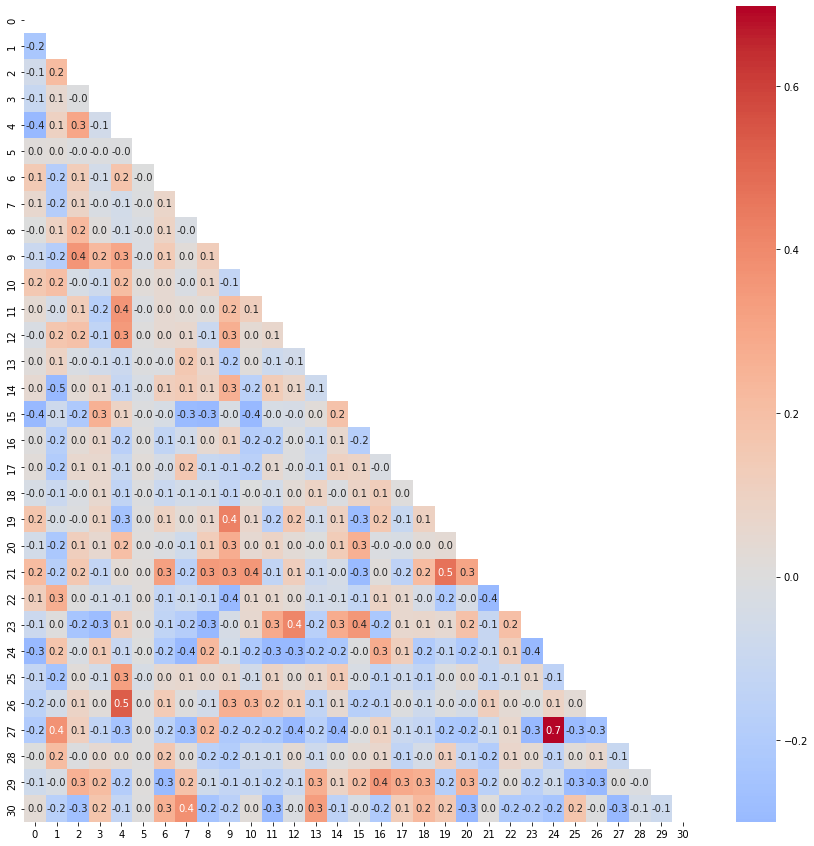

In [ ]:
matrix = np.triu(test.corr(method='spearman'))

plt.figure(figsize=(15, 15))

sns.heatmap(test.corr(method='spearman'), annot=True,
            fmt='.1f', vmin=-0.3, center=0, cmap='coolwarm', mask=matrix);

По 5му признаку видим, что распределение сильно отличается от нормального, но при этом оно не похоже на распределение в обучающем

0


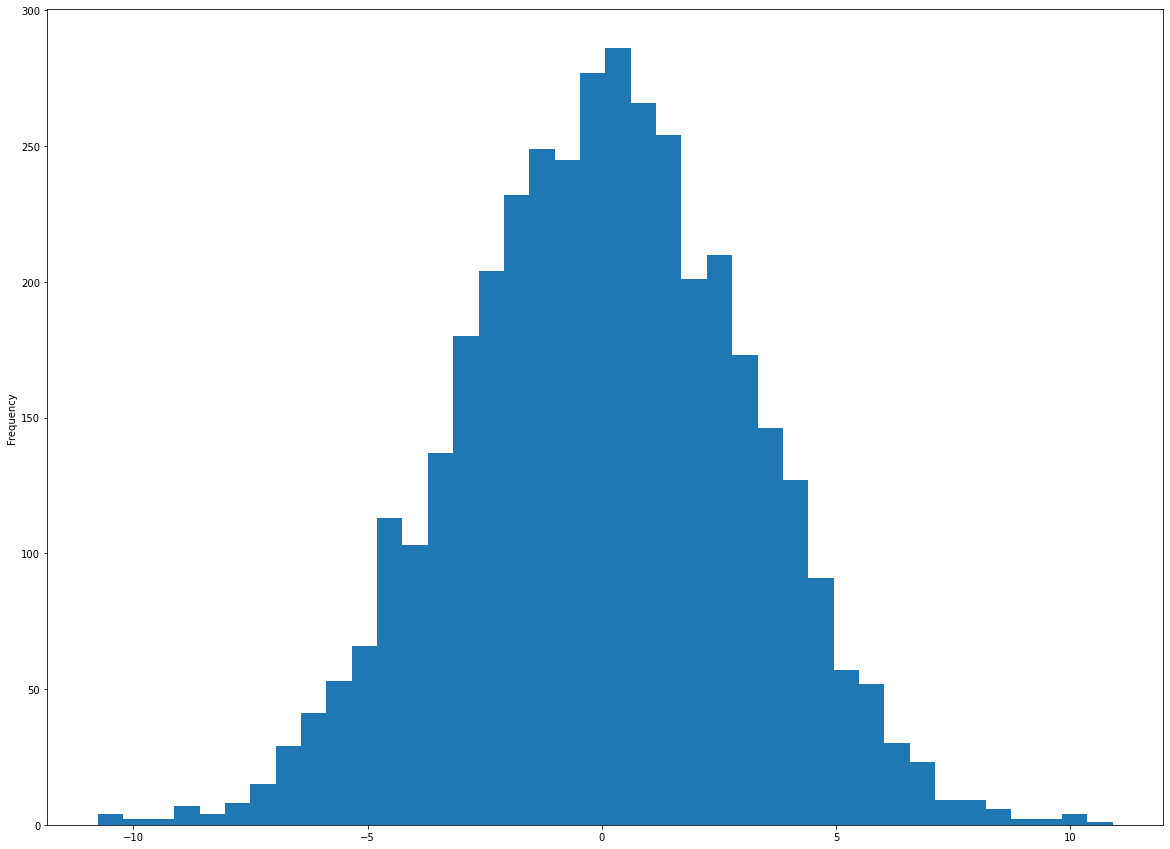

1


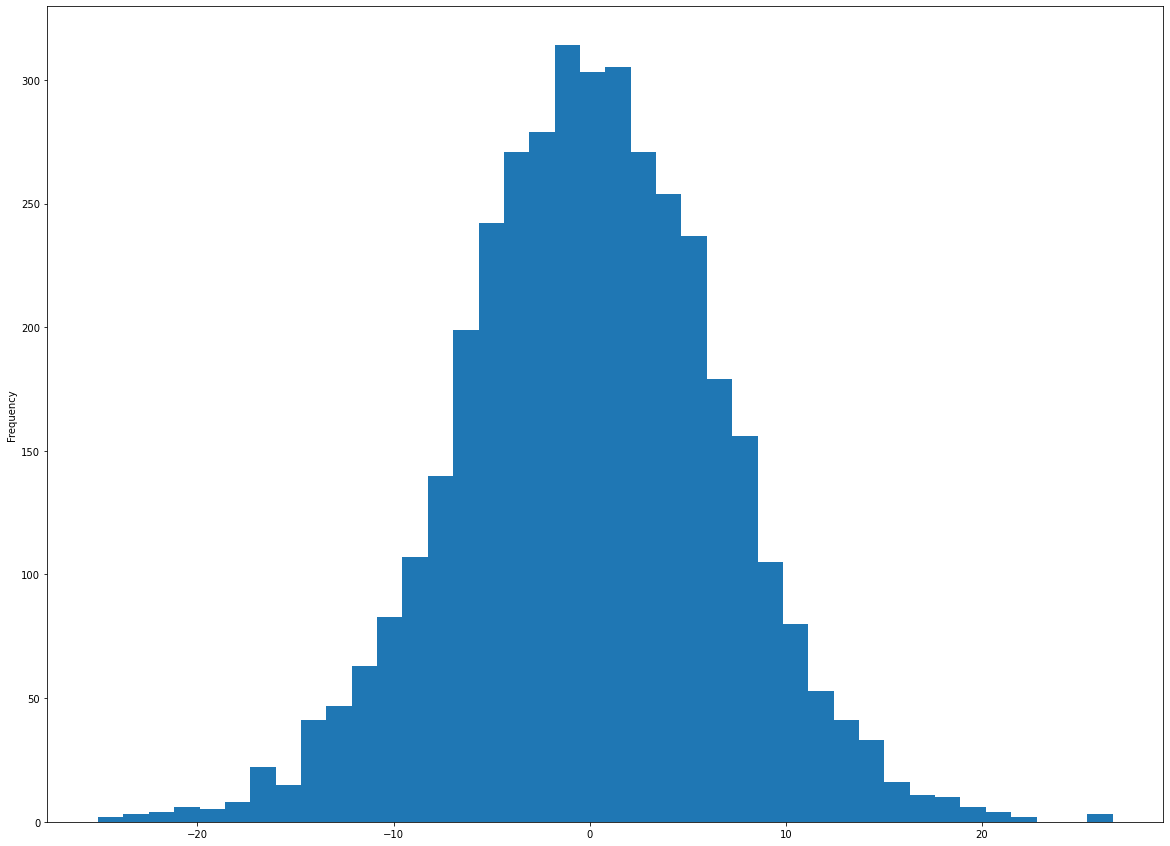

2


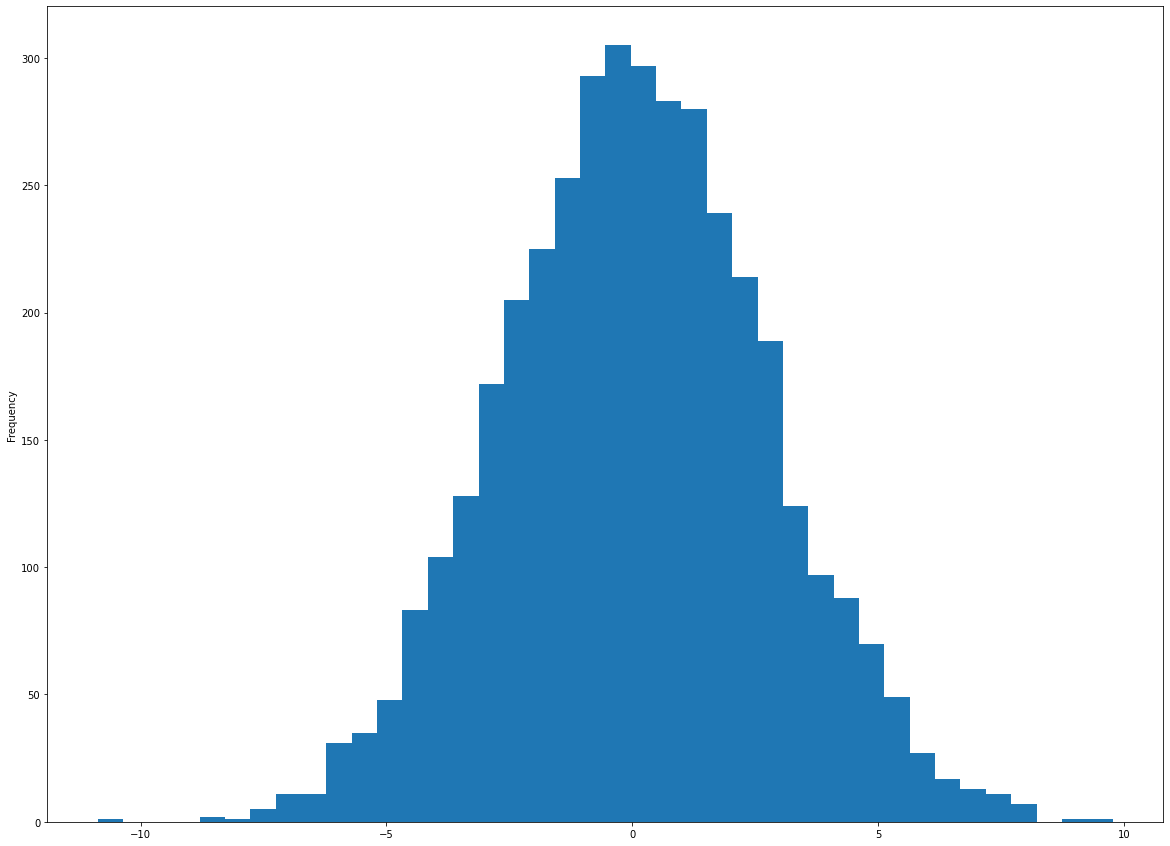

3


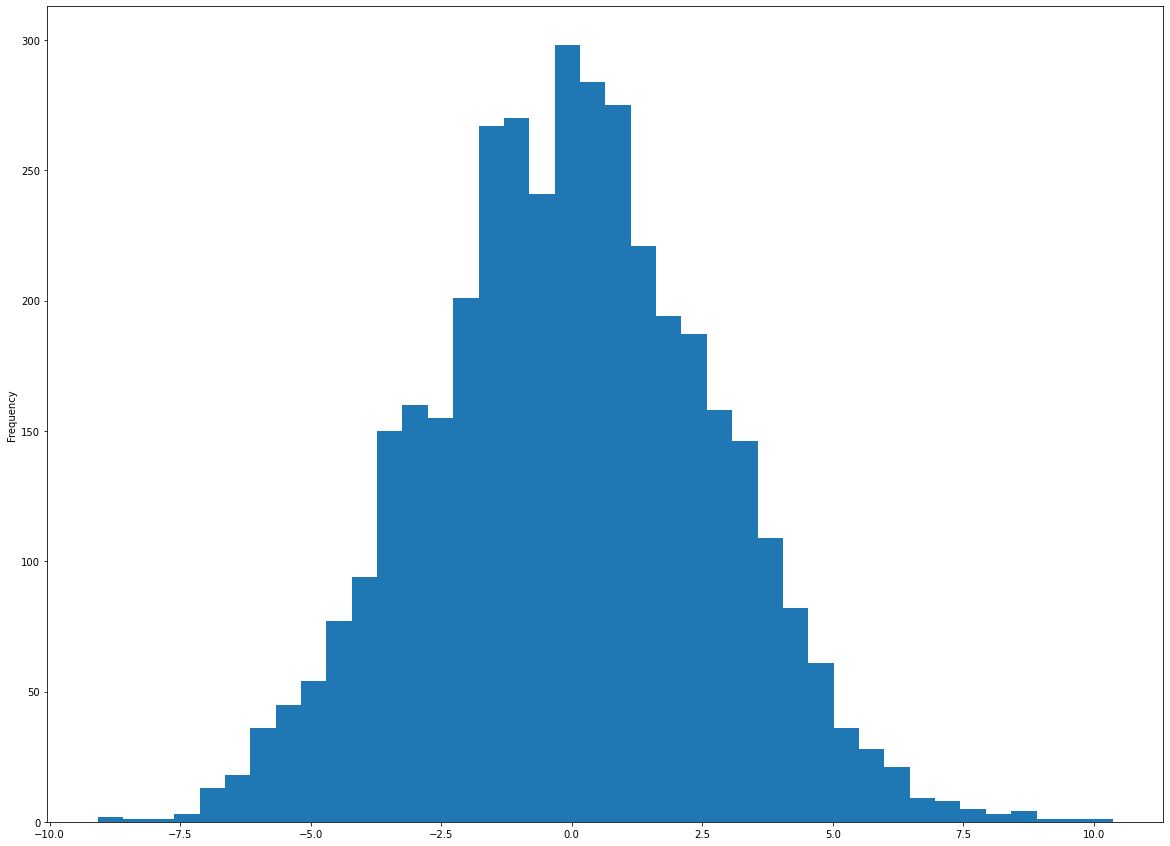

4


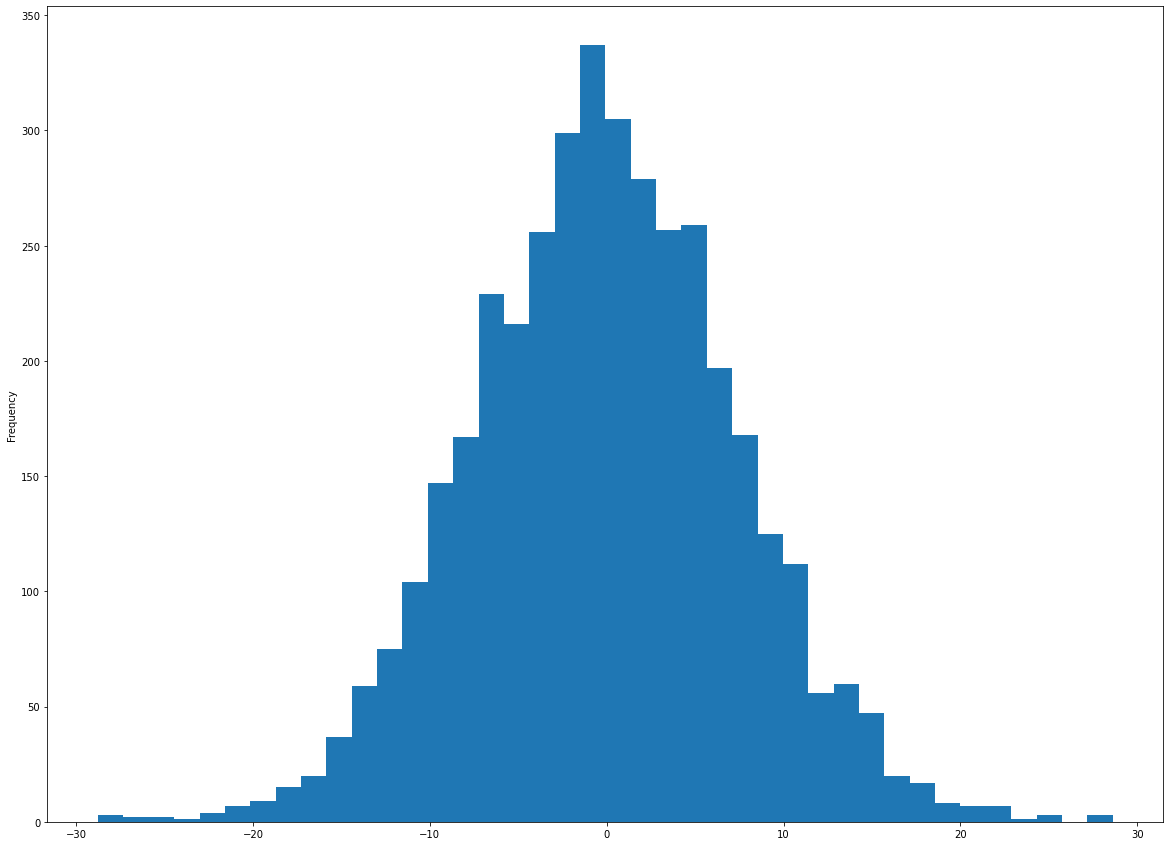

5


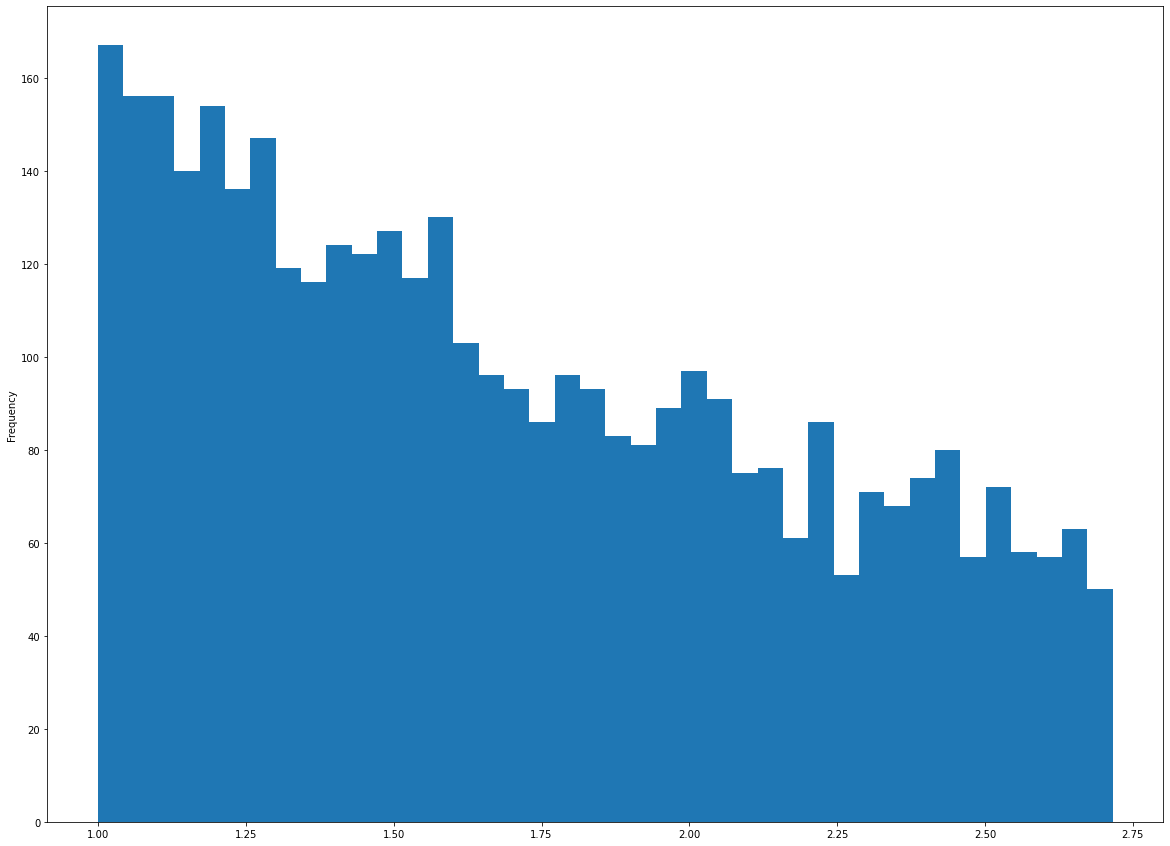

6


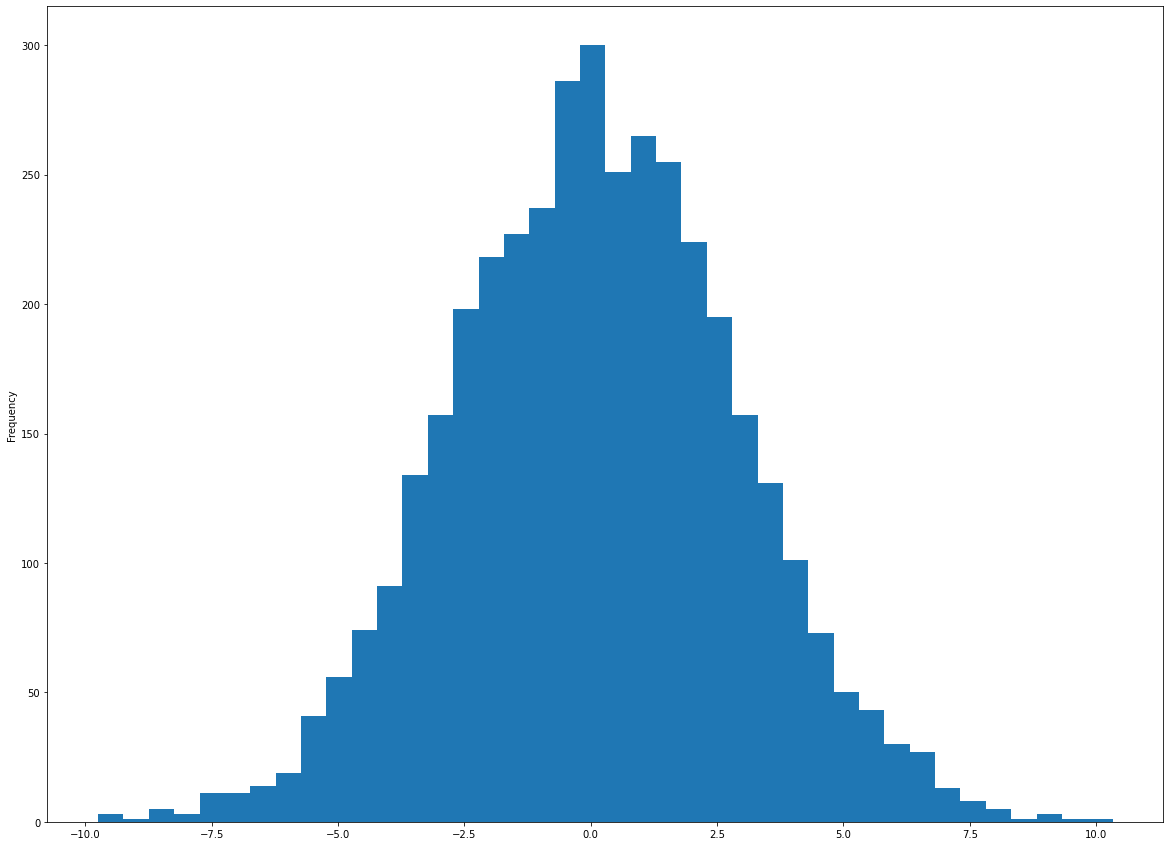

7


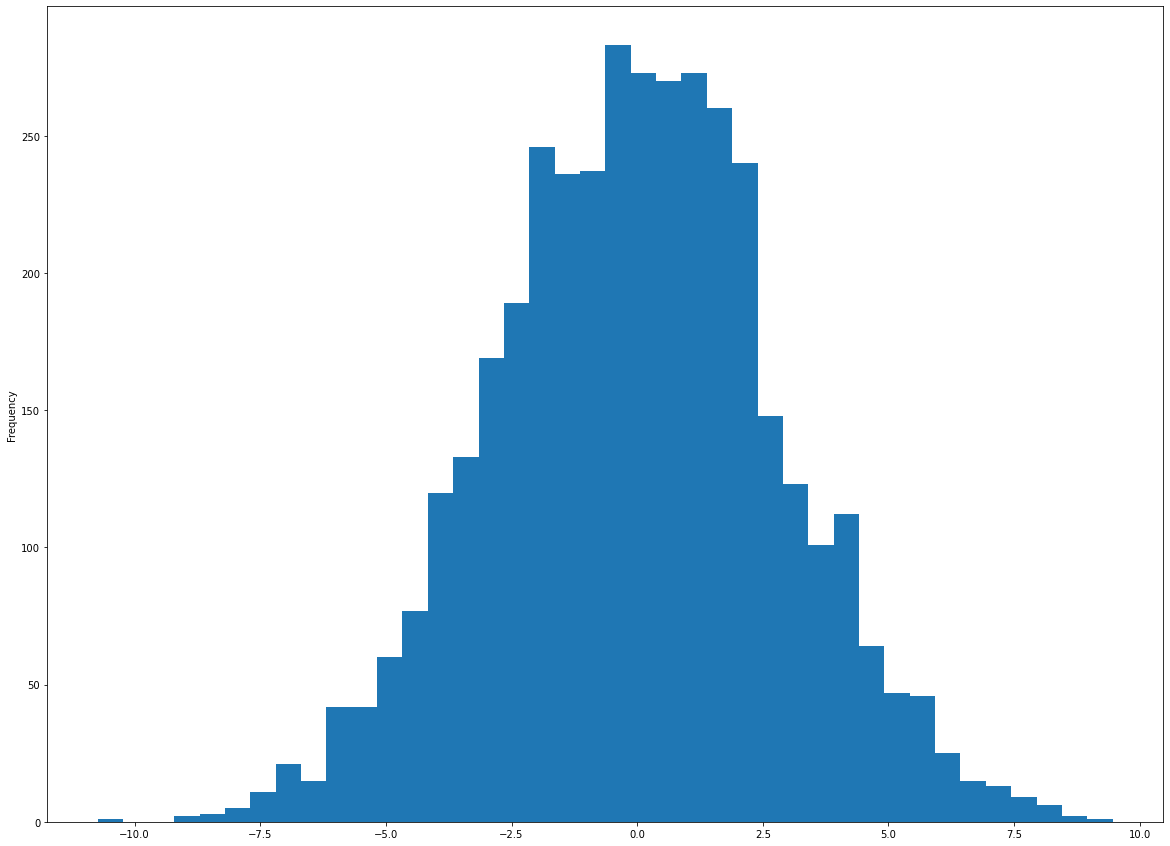

8


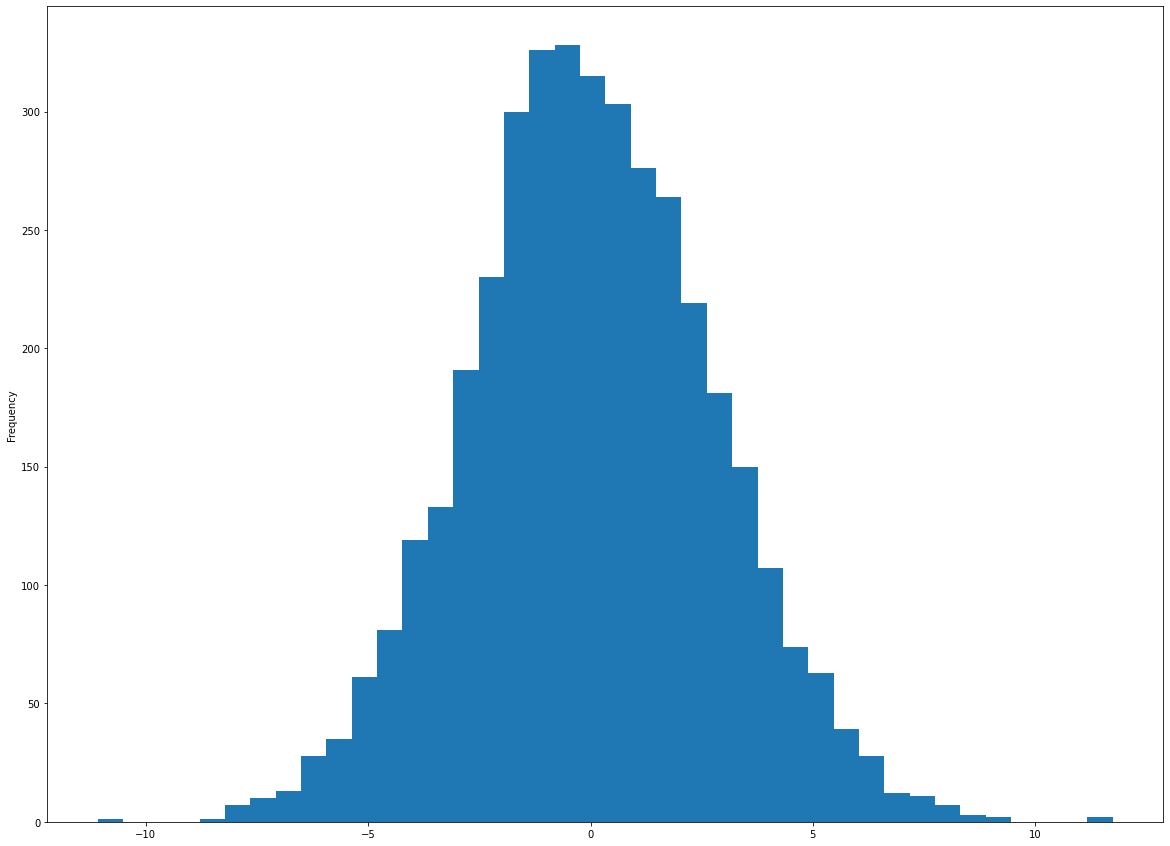

9


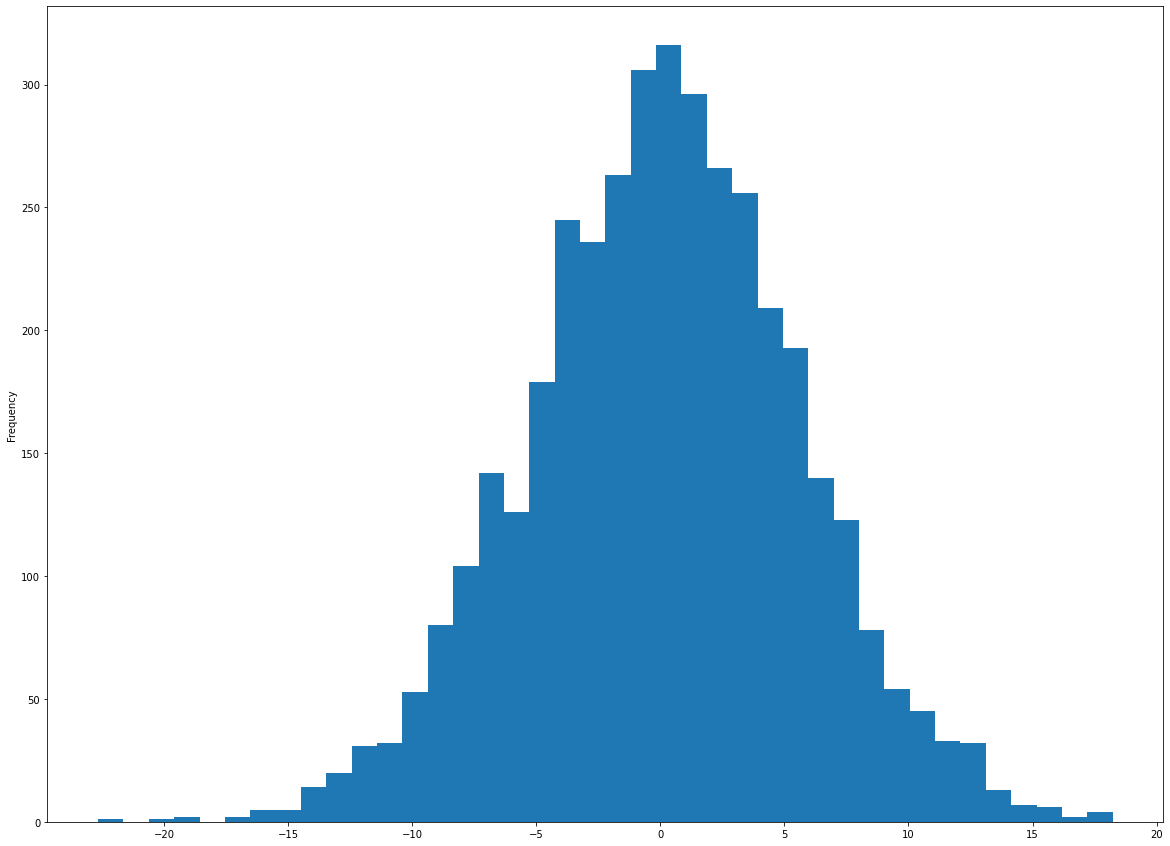

10


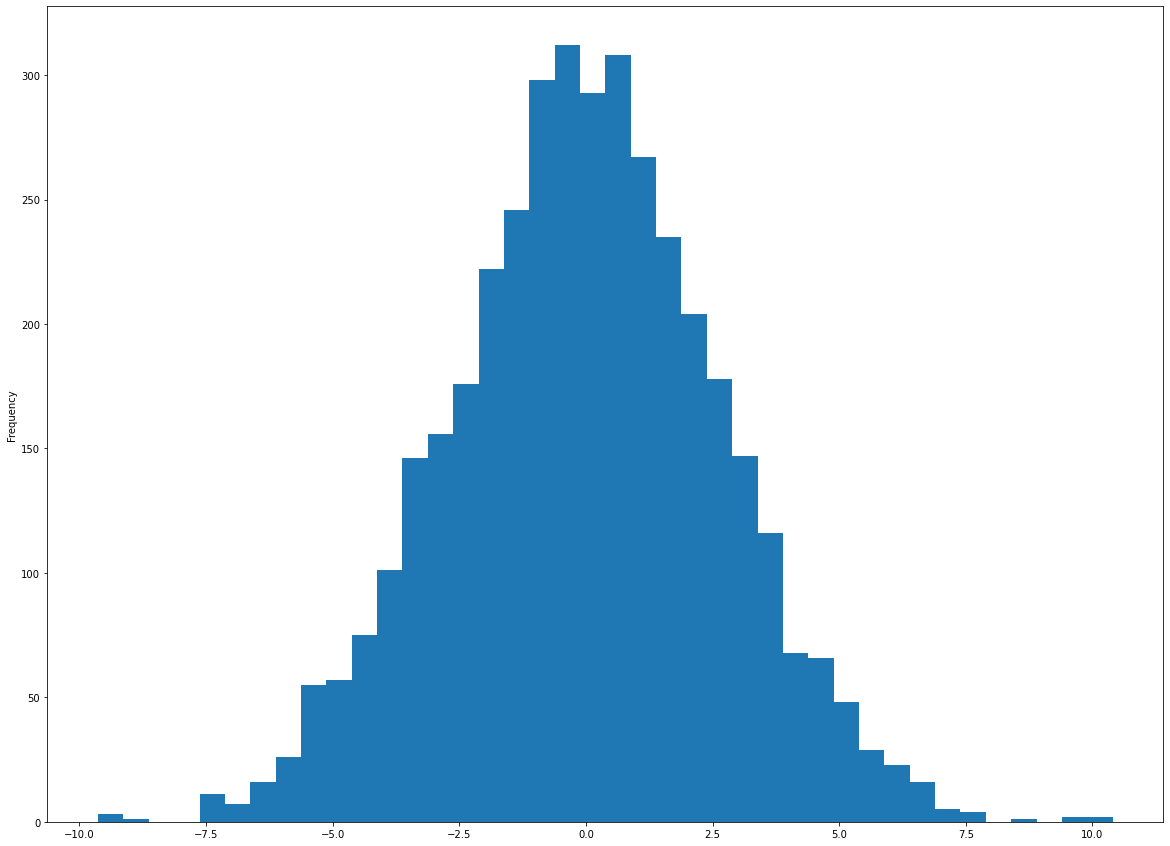

11


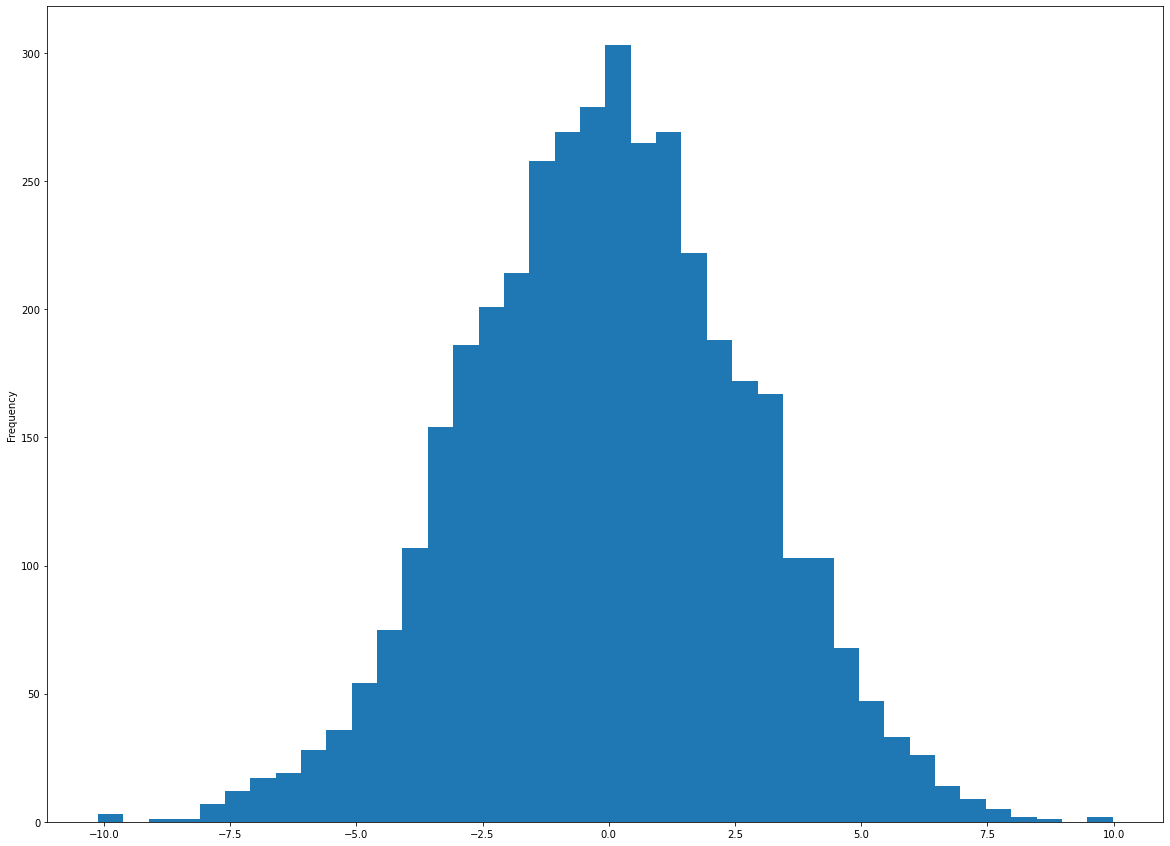

12


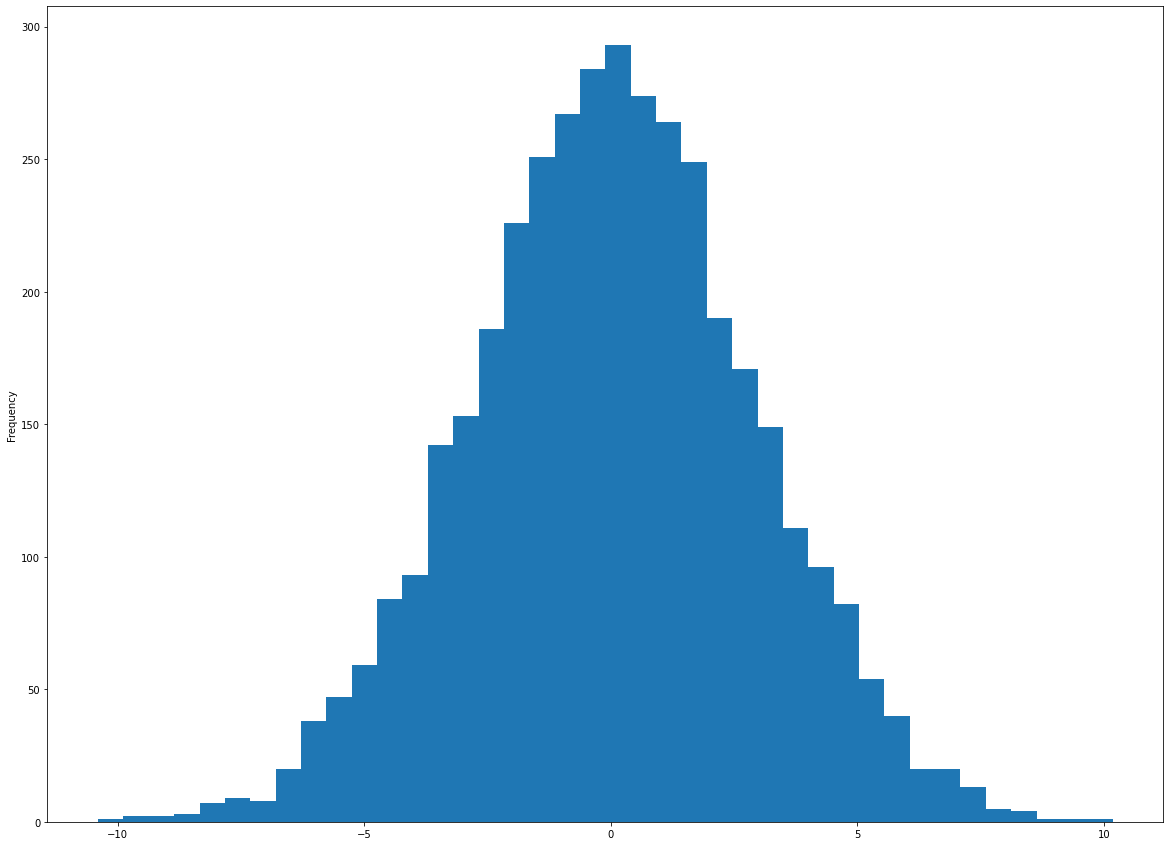

13


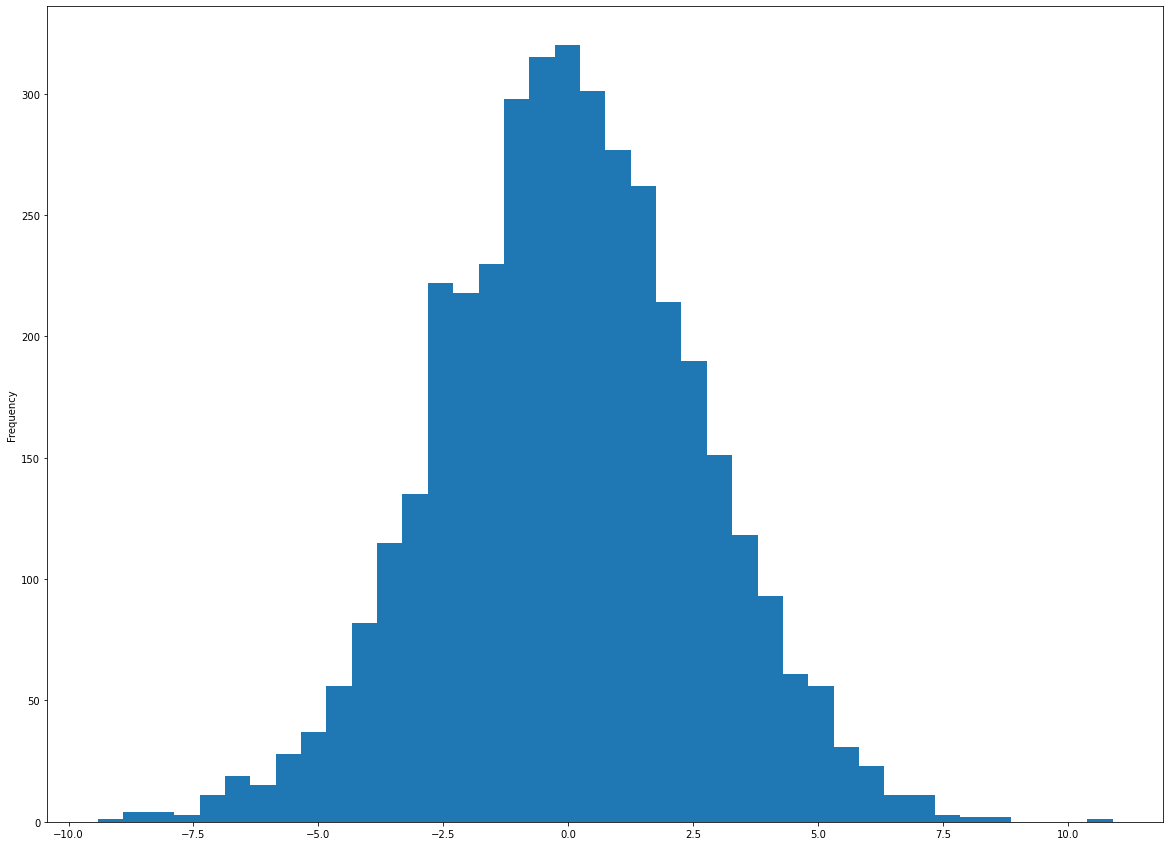

14


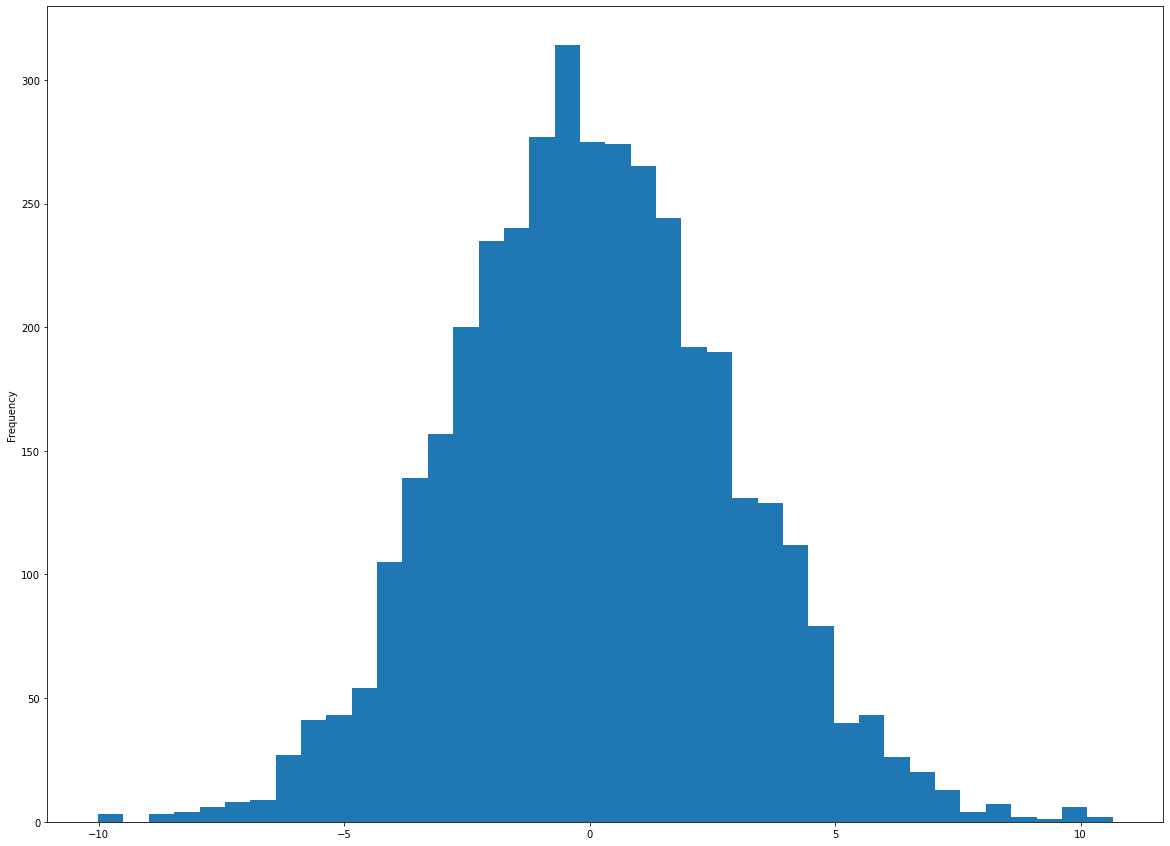

15


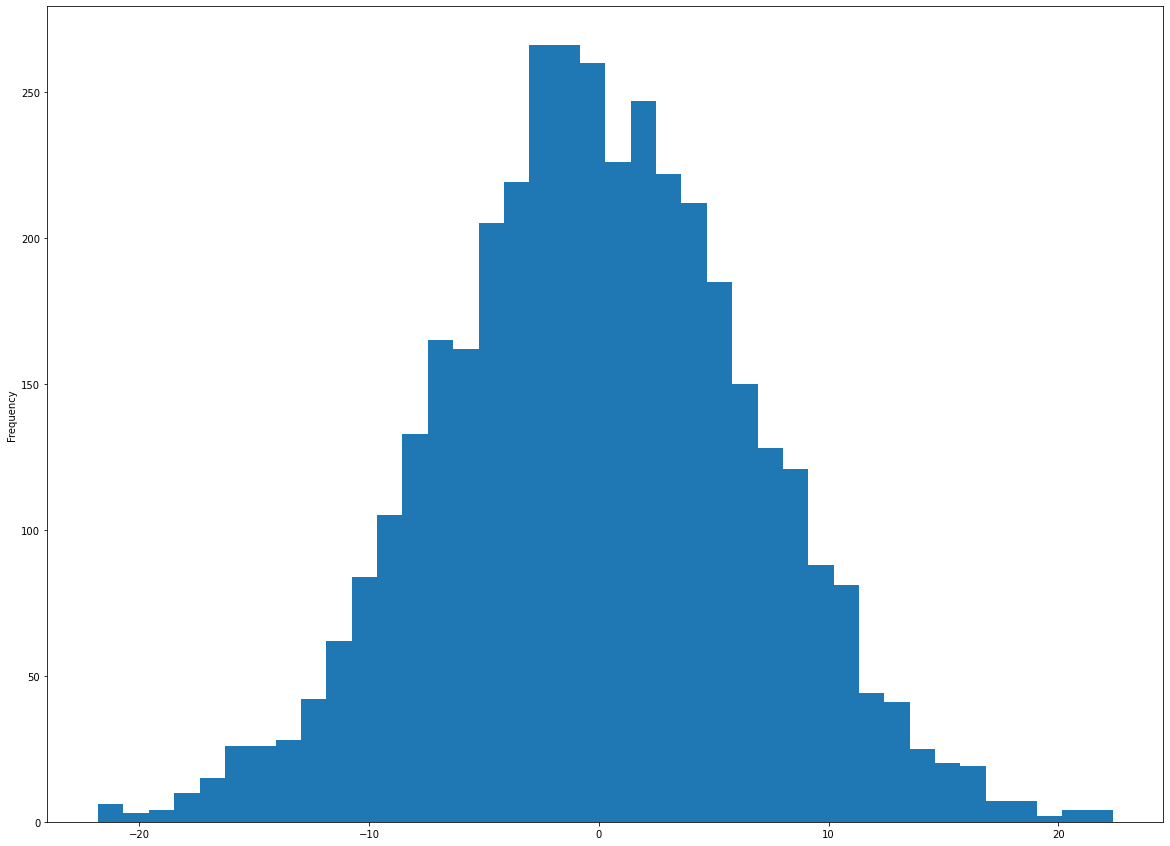

16


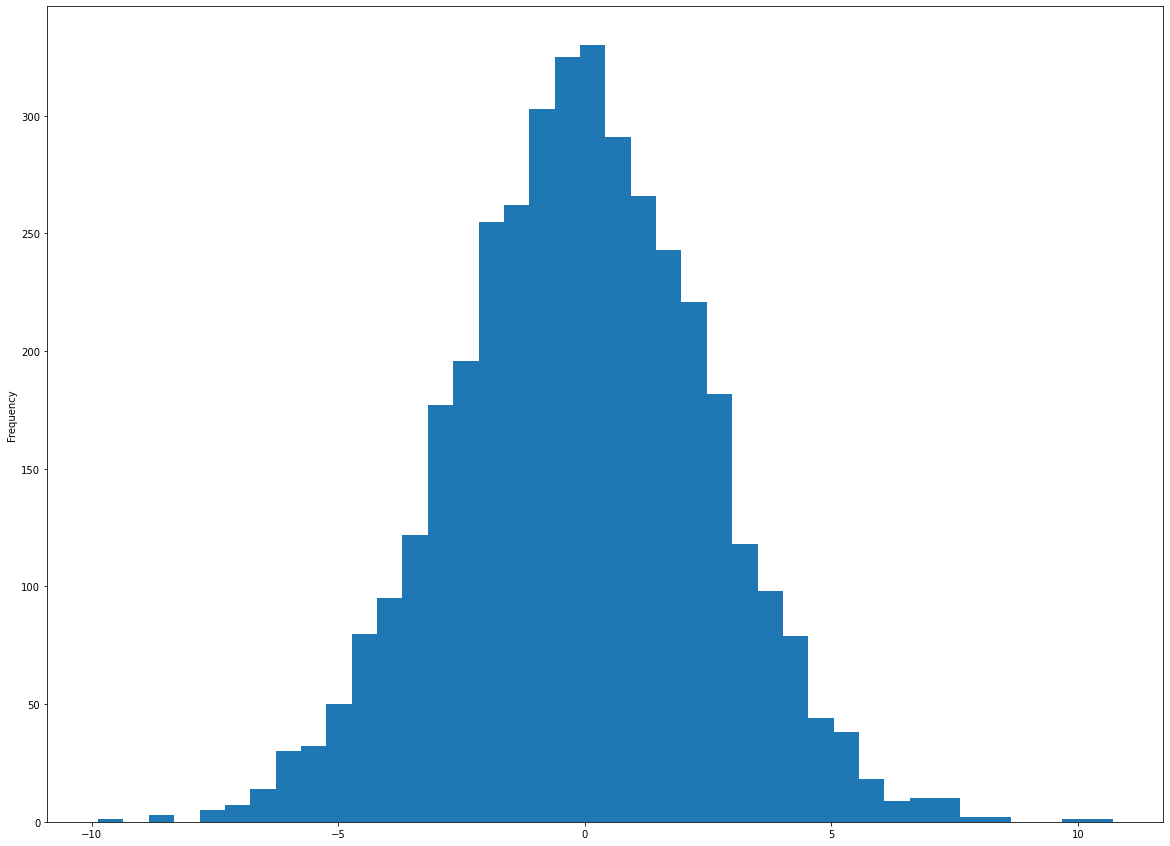

17


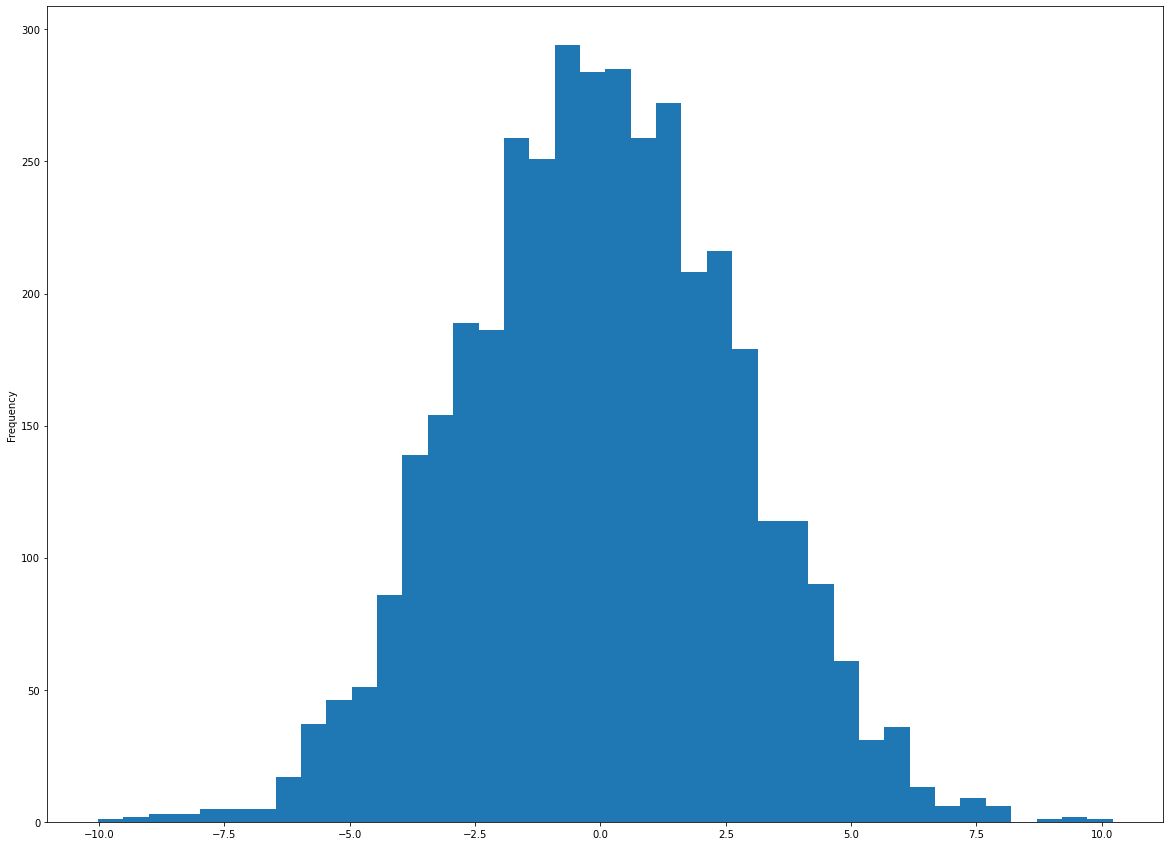

18


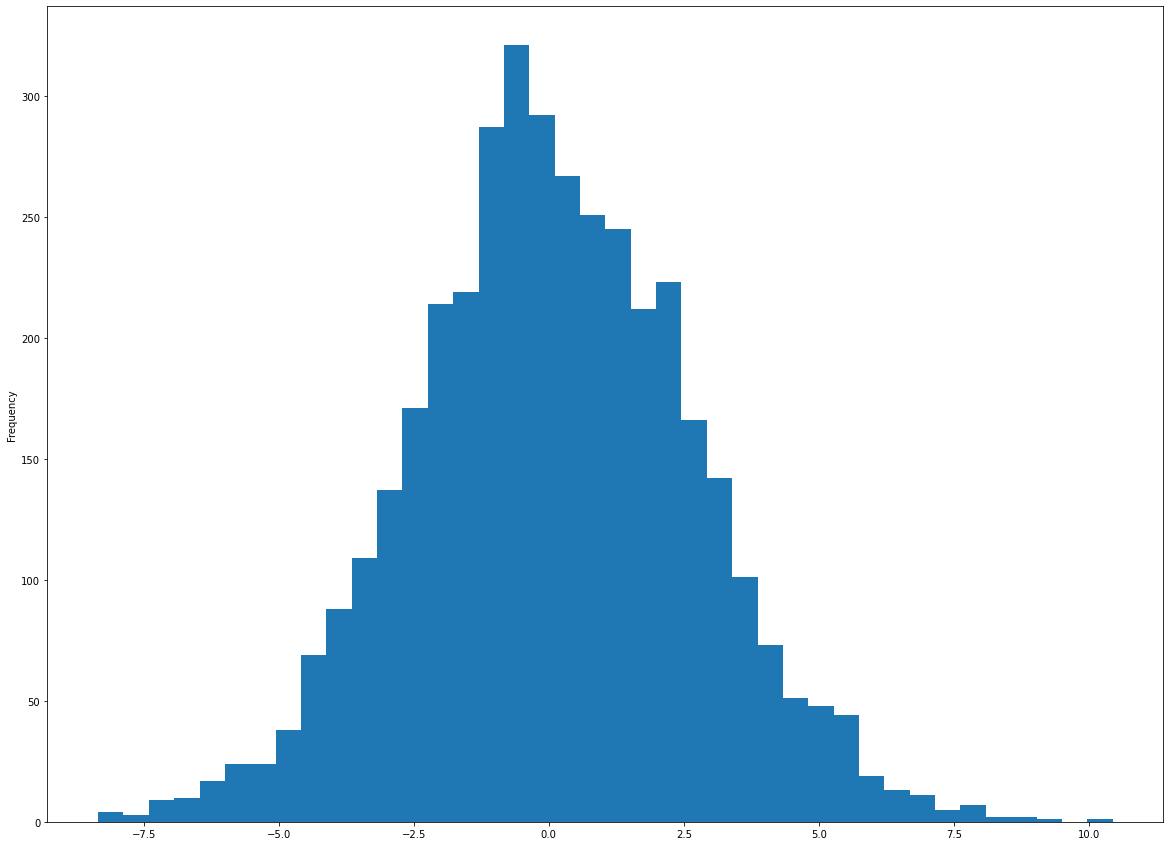

19


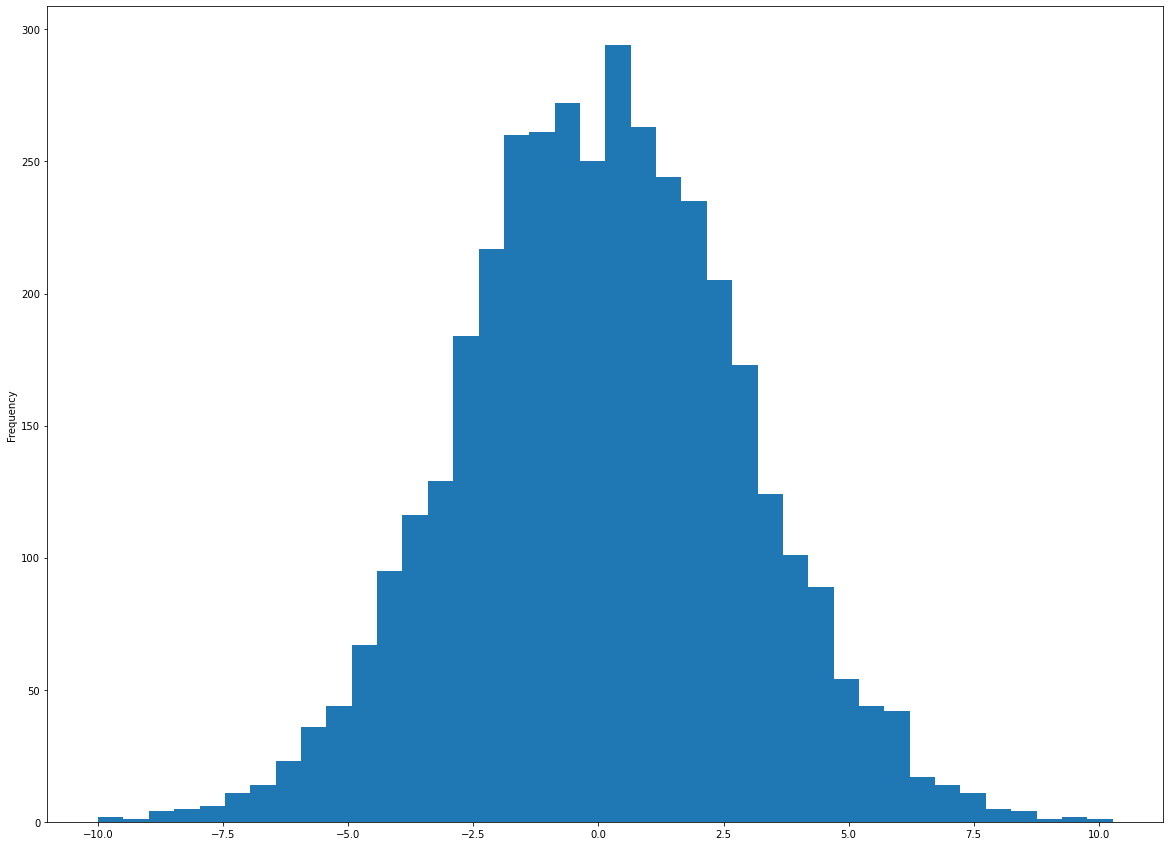

20


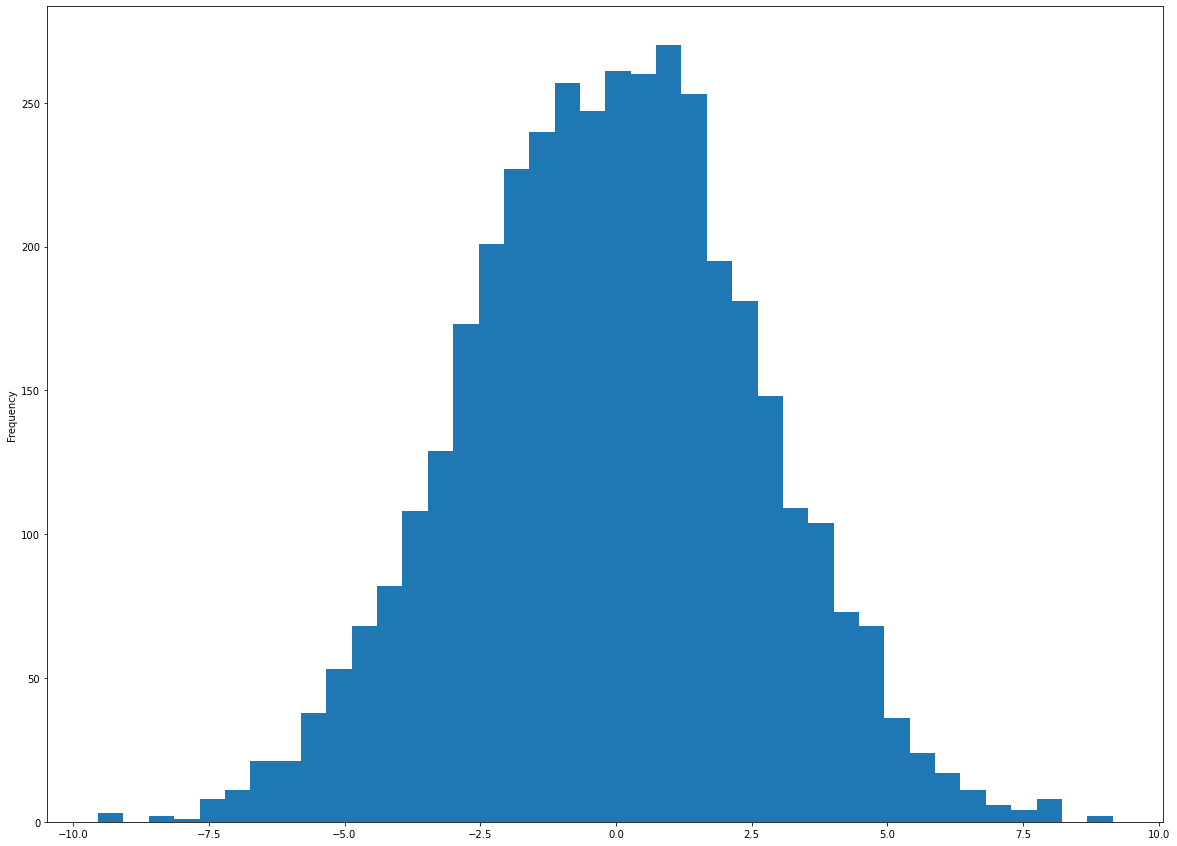

21


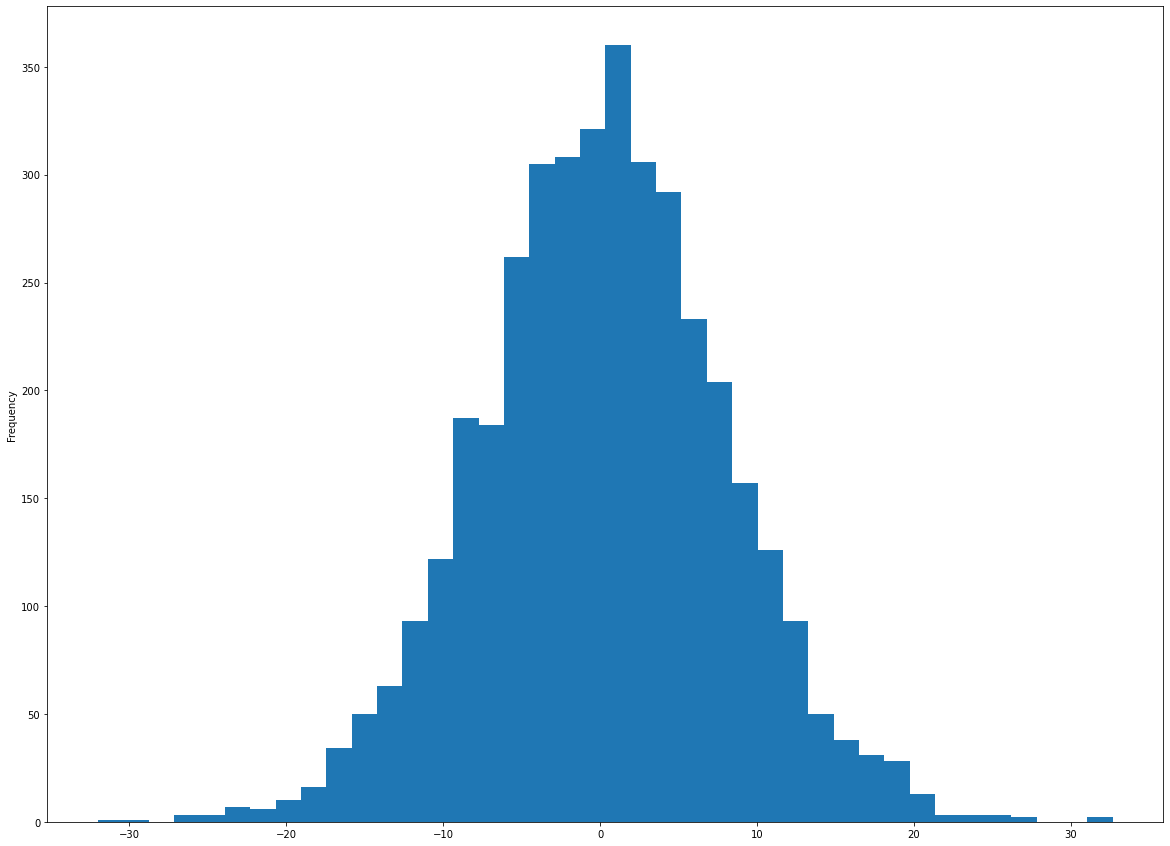

22


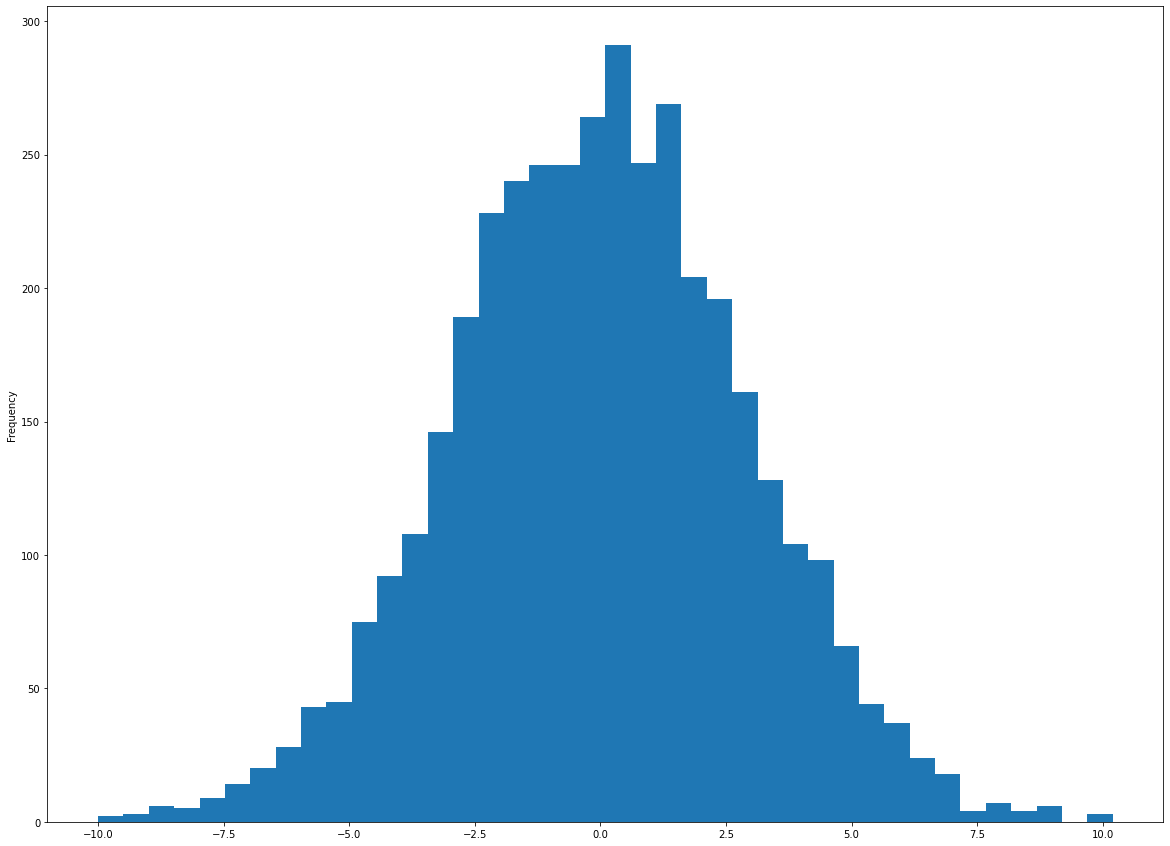

23


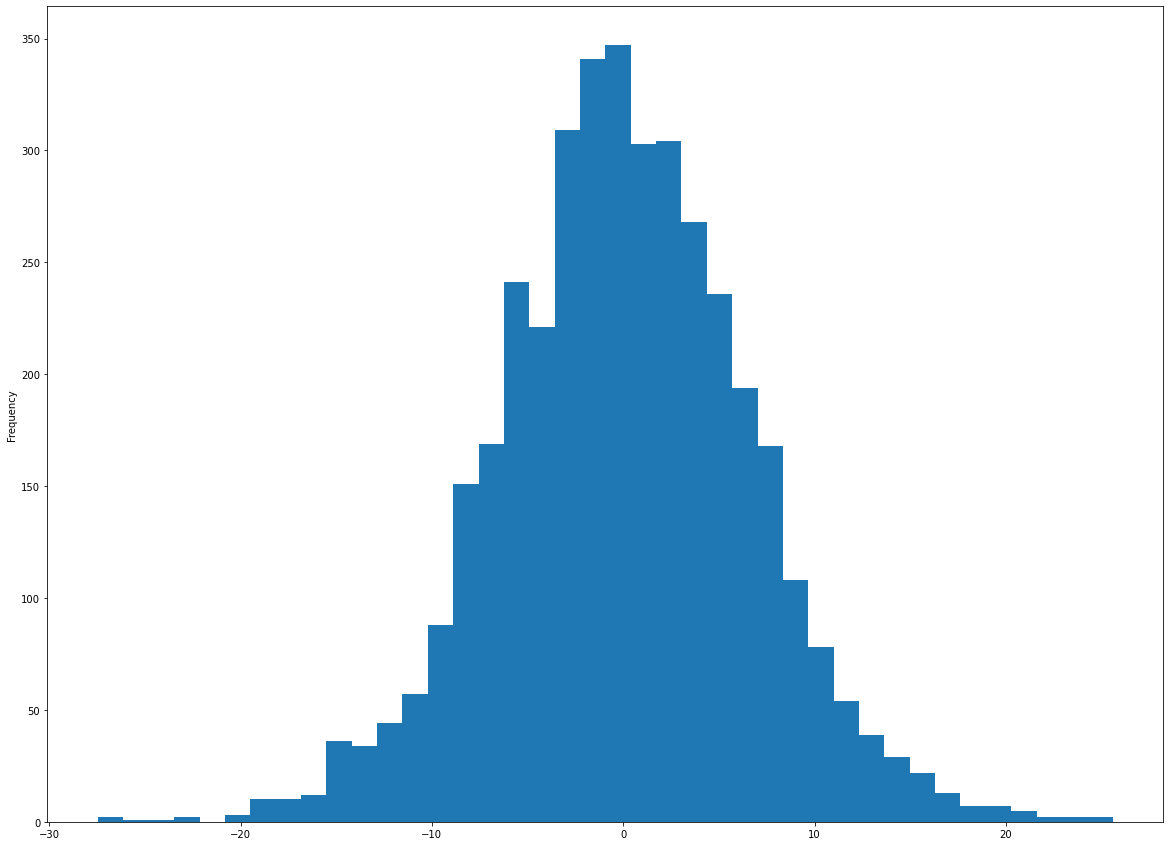

24


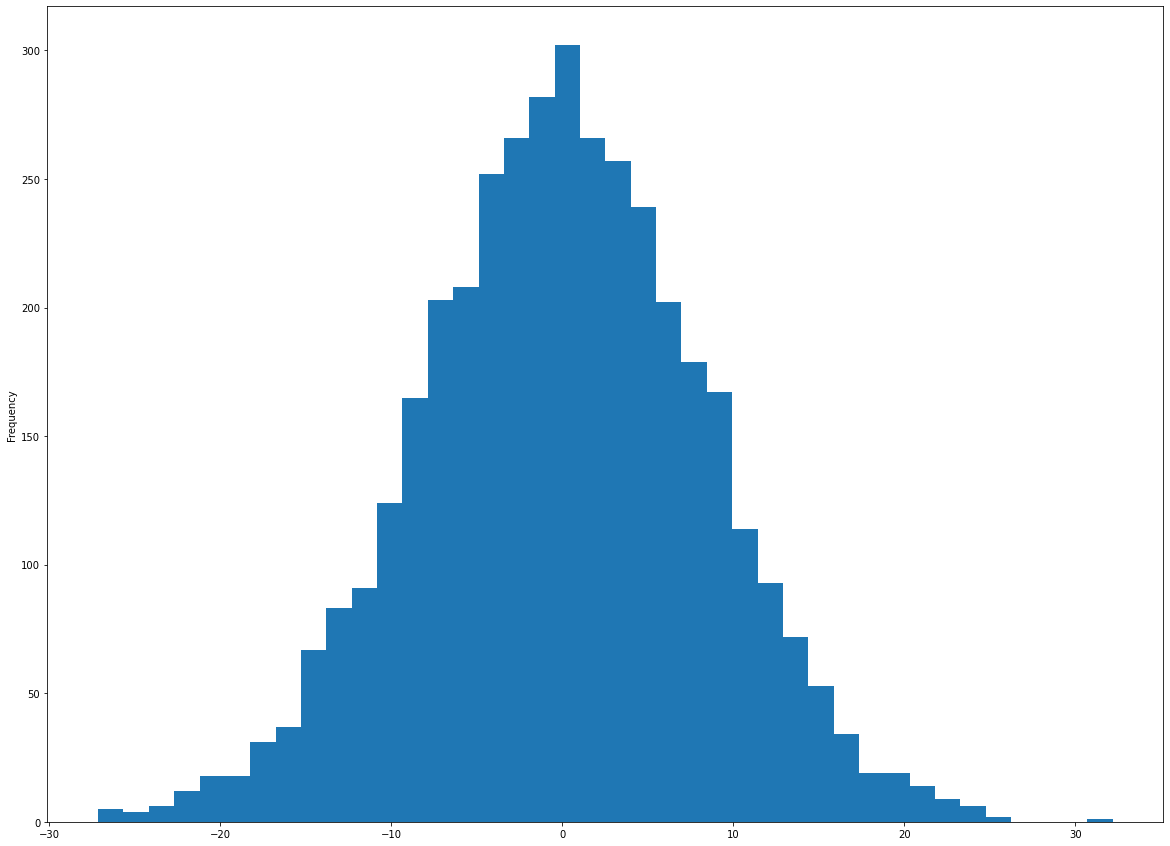

25


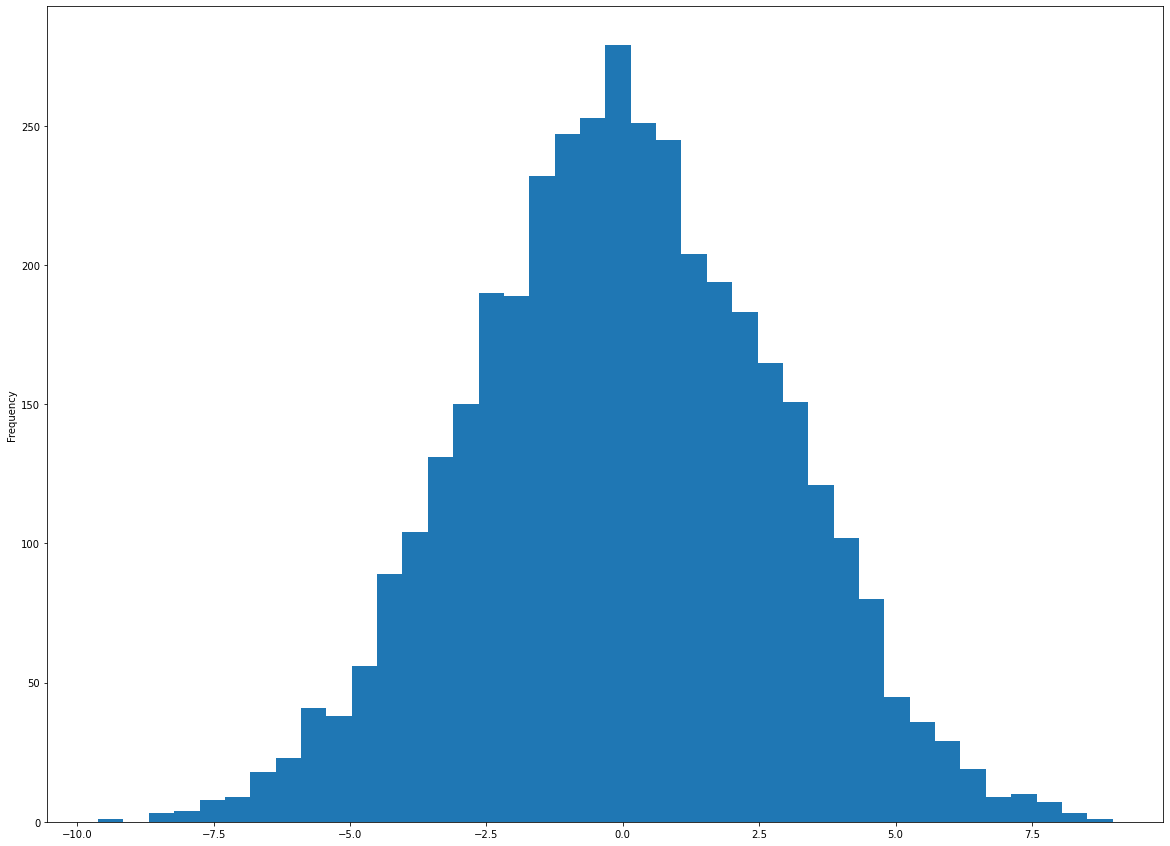

26


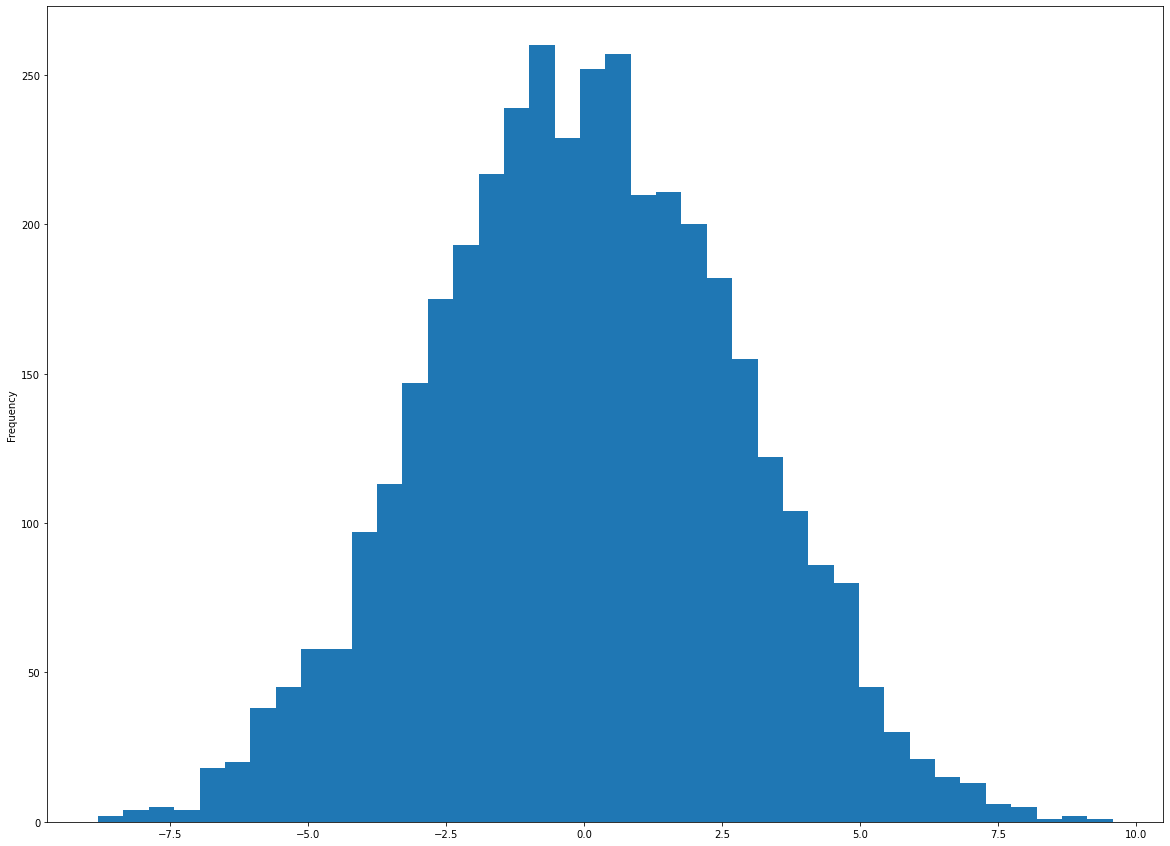

27


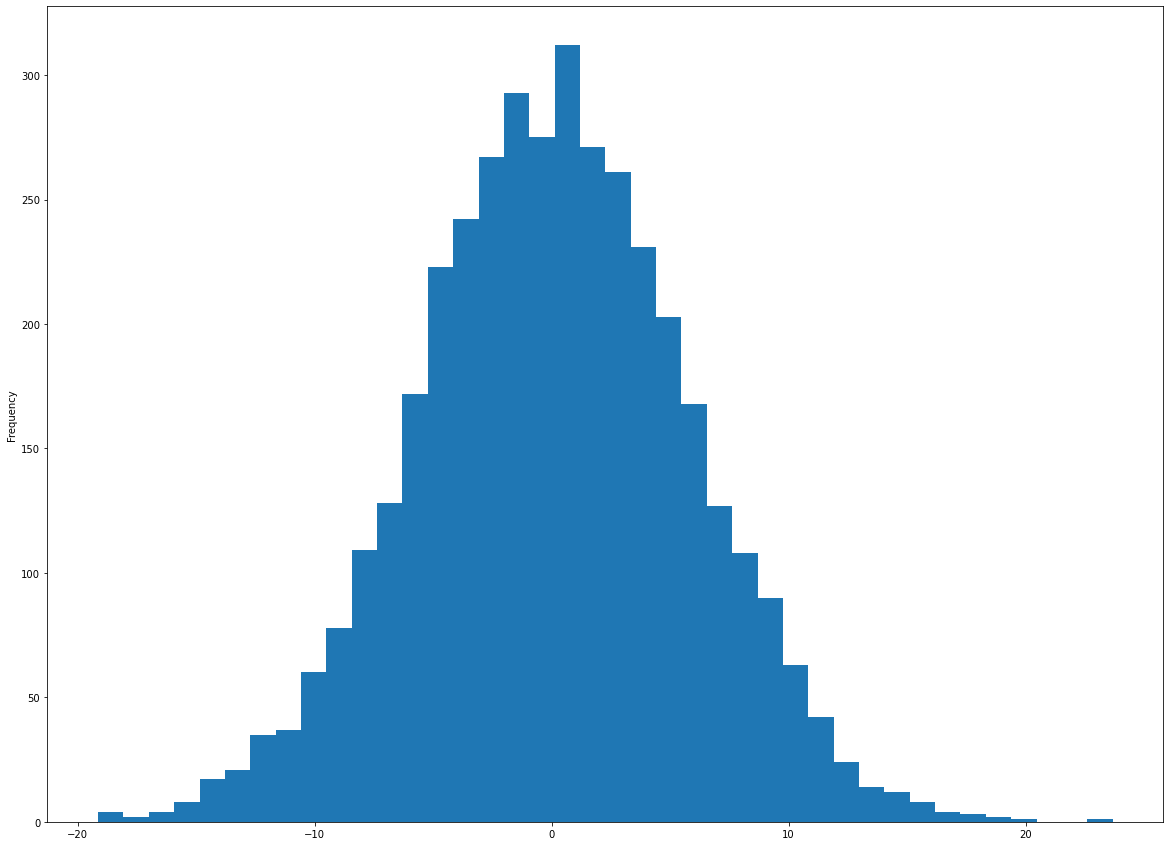

28


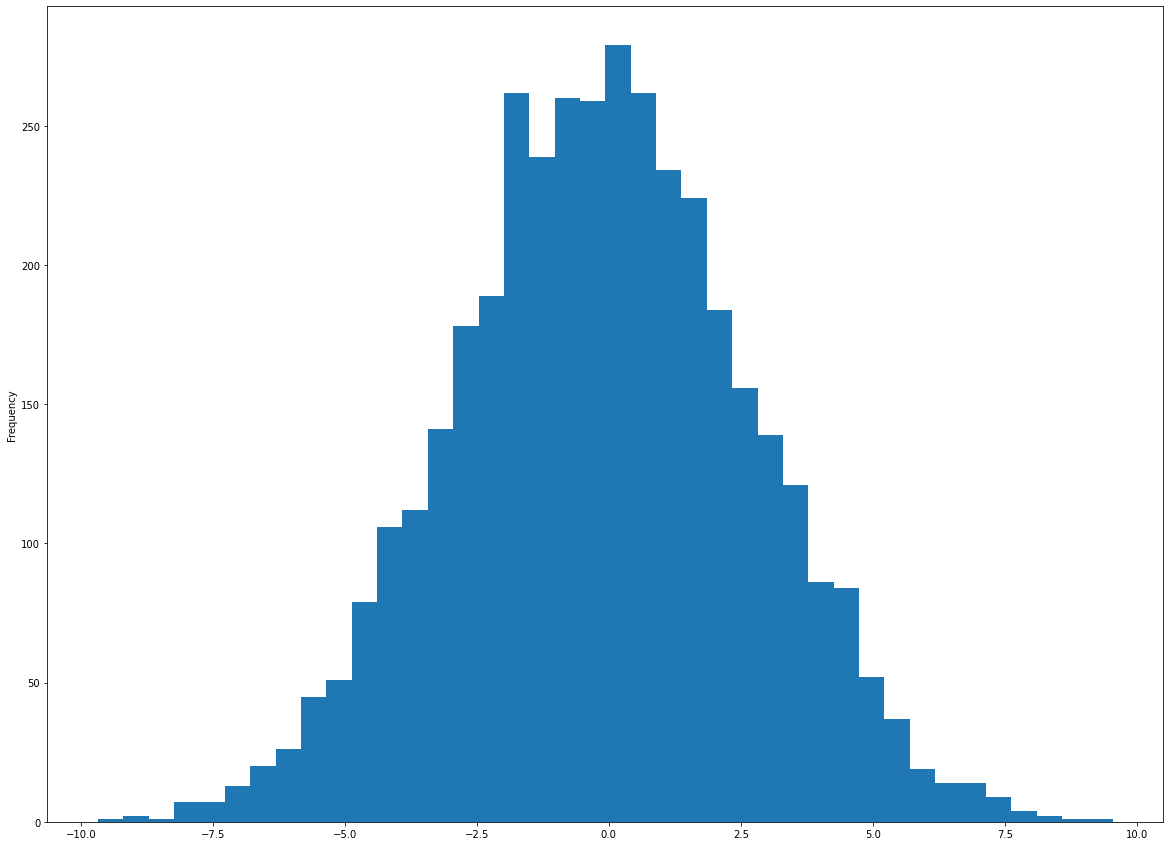

29


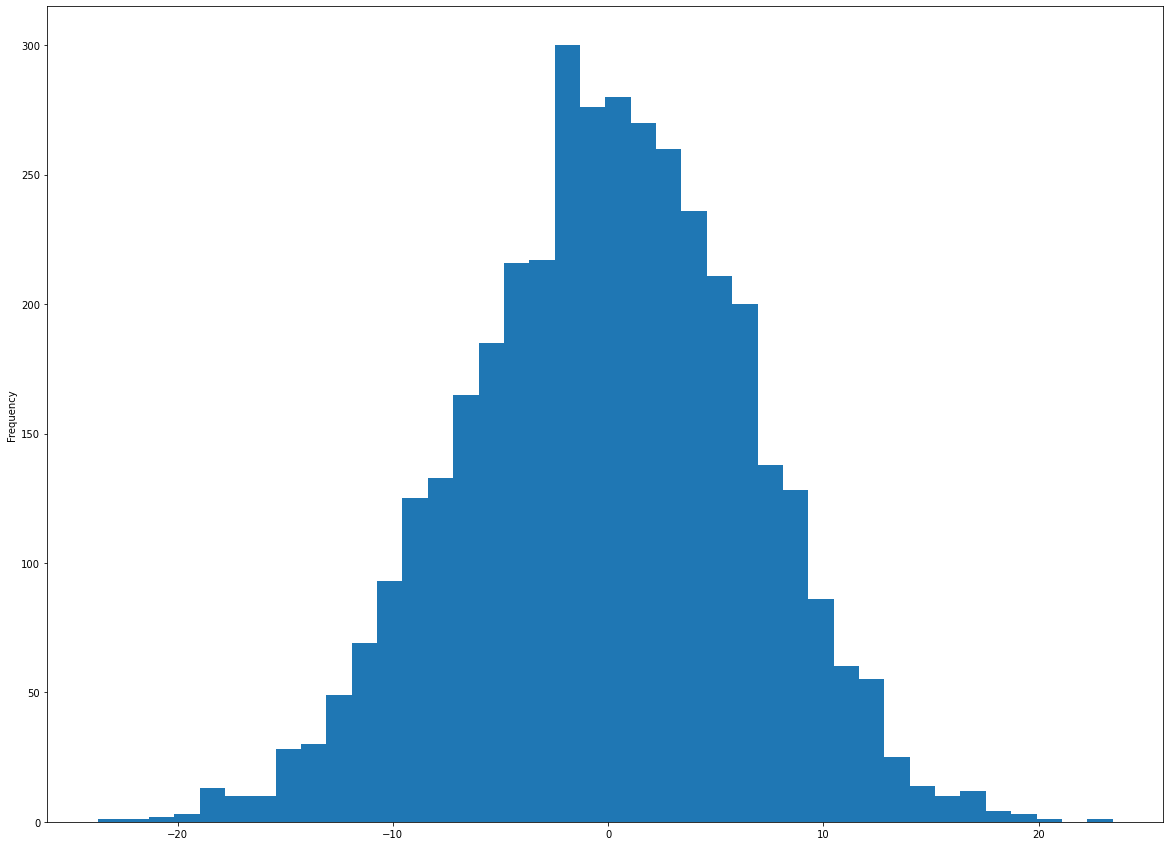

In [73]:
for i in range(30):
    plt.figure(figsize=(20,15))
    print(i)
    test.iloc[:,i].plot.hist(bins=40)
    plt.show()

## Выводы

Самым подозрительным является признак 5, который сильно коррелирует с целевыми значениеми на обучающем наборе. При обучении модели стоит сравнить значения точности с этим признаком и без него. Если окажется, что точность модели выше без 5го признака, то это означает, что в тестовом наборе этот признак имеет либо околонулевую корреляцию, либо даже отрицательную корреляцию с целевыми значениеми. Тогда модель будет ошибаться, обучишись делать выводы на 5 признаке.  

Кроме этого при интерпретации результатов нужно учитывать специфичность задачи - вероятность лечения болезни при применении лекарства. Скорее всего, необходимо относить к 1 целевому признаку даже при небольшой вероятности лечения болезни по предсказанию.

# Model engineering

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adadelta

from keras import backend as K

Init Plugin
Init Graph Optimizer
Init Kernel


In [77]:
# Определим метрики, которые будем использовать при обучении модели
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## first try simple model

Сначала попробуем самую простую модель со всеми признаками без изменений, чтобы получить стартовые значения точности

### model

In [89]:
model = Sequential()
model.add(Dense(32, input_dim=31, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', f1_m,precision_m, recall_m])


In [90]:
X_train = train.values[:,:-1]
X_train

array([[ -6.13072446,   7.42962817,   3.6514365 , ...,  -4.14071459,
          6.02781586, -20.28814487],
       [  5.16183634,  -6.51401075,  -7.47461156, ...,  -2.01716815,
         -8.5104239 ,  10.80663891],
       [ -2.9715497 , -21.50818406,  -1.12545715, ...,  -7.55395325,
          0.63663888,  14.2749502 ],
       ...,
       [ -2.34859098,  -8.2639953 ,  -0.31848362, ...,  -1.84197078,
          5.74719015,  -7.60828827],
       [  5.48159533,   4.8994123 ,  -0.42185146, ...,  -0.90893714,
         11.55578128,   2.88909307],
       [  0.93914157,  -0.35498998,  -5.47581519, ...,  -1.48244328,
         -3.21955552,   0.9969697 ]])

In [91]:
Y_train = train.values[:,-1]
Y_train.shape

(6963,)

### train

In [92]:
result = model.fit(X_train,         
          Y_train,         
          batch_size=64,    # Размер батча
          epochs=100,      # Количество эпох
          verbose=1)

Epoch 1/100


2022-08-10 17:35:49.819674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 4s 8ms/step - loss: 1.0000 - accuracy: 0.6174 - f1_m: 0.4121 - precision_m: 0.4152 - recall_m: 0.4848
Epoch 2/100
109/109 [==============================] - 1s 7ms/step - loss: 0.4700 - accuracy: 0.7731 - f1_m: 0.5464 - precision_m: 0.6406 - recall_m: 0.4927
Epoch 3/100
109/109 [==============================] - 1s 7ms/step - loss: 0.3732 - accuracy: 0.8337 - f1_m: 0.6710 - precision_m: 0.7584 - recall_m: 0.6132
Epoch 4/100
109/109 [==============================] - 1s 7ms/step - loss: 0.3076 - accuracy: 0.8709 - f1_m: 0.7500 - precision_m: 0.8144 - recall_m: 0.7062
Epoch 5/100
109/109 [==============================] - 1s 7ms/step - loss: 0.2603 - accuracy: 0.8920 - f1_m: 0.7931 - precision_m: 0.8433 - recall_m: 0.7596
Epoch 6/100
109/109 [==============================] - 1s 7ms/step - loss: 0.2252 - accuracy: 0.9111 - f1_m: 0.8371 - precision_m: 0.8710 - recall_m: 0.8123
Epoch 7/100
109/109 [==============================] - 1s 7ms/step - l

### predict

In [93]:
prediction = model.predict(test.values)

2022-08-10 17:45:32.300901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [94]:
prediction

array([[1.1629720e-12],
       [9.9862099e-01],
       [1.5593620e-11],
       ...,
       [9.3771380e-10],
       [4.0852591e-02],
       [1.1330525e-12]], dtype=float32)

In [99]:
pred_df = pd.DataFrame(prediction, columns=['target'])
pred_df

,target
0,1.162972e-12
1,9.986210e-01
2,1.559362e-11
3,1.000000e+00
4,2.459445e-06
...,...
3915,9.981524e-01
3916,1.000000e+00
3917,9.377138e-10
3918,4.085259e-02


In [ ]:
pred = np.around(pred_df['target'], decimals=0)

In [114]:
# сохраним предсказания в csv в нужном для соревнования формате
pred_to_csv(pred)

<Figure size 1440x1080 with 0 Axes>

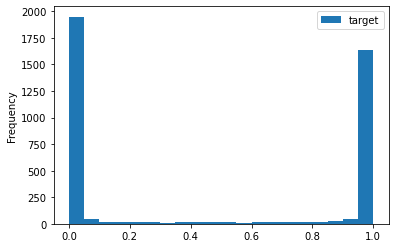

In [116]:
# посмотрим на распределение предсказаний на тестовом наборе
plt.figure(figsize=(20,15))
pred_df.plot.hist(bins=20)
plt.show()

### results

На первом подходе получил скор = 0.8002119766825648 на публичной части тестового набора.
При этом вероятности на 0 и 1 я делил обычным округлением

## without 5 feature

Уберем 5 признак и обучим ту же простую модель

In [151]:
train.drop('5', axis=1)

,0,1,2,3,4,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,target
0,-6.1307,7.4296,3.6514,-1.9510,-3.3844,-3.0778,-2.6191,5.1282,1.2285,-2.0307,...,0.3930,4.9205,16.6105,-2.4308,-1.4056,18.6102,-4.1407,6.0278,-20.2881,0
1,5.1618,-6.5140,-7.4746,-4.5443,-13.0814,-1.0947,-1.2535,-2.9553,-10.9582,0.2018,...,-4.8402,-0.5143,4.6133,2.3913,-4.7957,4.2083,-2.0172,-8.5104,10.8066,0
2,-2.9715,-21.5082,-1.1255,1.5241,3.0274,1.5510,1.5121,-1.9556,3.6839,-3.2816,...,-0.3853,2.6479,-2.2006,1.0587,1.0763,-7.8024,-7.5540,0.6366,14.2750,0
3,6.7244,0.5665,0.5098,-4.5242,10.3672,0.7418,-2.0778,-2.9127,-4.0406,0.9664,...,4.7313,15.3784,-14.0317,2.6594,5.1236,-8.5003,3.4180,-14.7985,-6.1328,1
4,-2.2137,-4.6782,-0.1358,2.3759,0.9166,-0.3533,-0.2206,-3.4168,-5.9642,0.1670,...,1.5983,-4.9966,4.5043,1.9190,-2.0762,0.1540,-2.0168,10.8032,5.9429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,1.5541,2.0188,-2.5510,-2.0490,0.9319,2.2606,0.9074,0.5599,-0.3665,6.4991,...,-2.0781,2.7749,-5.8194,-1.3973,0.6298,-1.0986,-7.4985,-7.7522,12.6911,0
6959,5.3416,-4.0575,0.7123,-0.5290,2.3892,-4.2485,-2.5163,1.6129,0.0883,2.2580,...,-0.1203,-3.2473,-3.3482,2.6518,1.0594,-2.8421,-1.9602,-5.0958,-0.1749,0
6960,-2.3486,-8.2640,-0.3185,1.8510,-4.8805,-4.3482,2.9373,-3.0679,-0.1737,-3.4464,...,0.8190,0.7942,9.3538,-1.8418,-1.1163,6.7081,-1.8420,5.7472,-7.6083,0
6961,5.4816,4.8994,-0.4219,4.6393,-20.6711,-3.8380,0.6220,1.5488,-8.8475,0.8641,...,1.6971,-8.3160,6.1499,1.4372,-7.2847,4.5667,-0.9089,11.5558,2.8891,0


In [148]:
X_train_4 = train
X_train_4

array([[ -6.13072446,   7.42962817,   3.6514365 , ...,  -4.14071459,
          6.02781586, -20.28814487],
       [  5.16183634,  -6.51401075,  -7.47461156, ...,  -2.01716815,
         -8.5104239 ,  10.80663891],
       [ -2.9715497 , -21.50818406,  -1.12545715, ...,  -7.55395325,
          0.63663888,  14.2749502 ],
       ...,
       [ -2.34859098,  -8.2639953 ,  -0.31848362, ...,  -1.84197078,
          5.74719015,  -7.60828827],
       [  5.48159533,   4.8994123 ,  -0.42185146, ...,  -0.90893714,
         11.55578128,   2.88909307],
       [  0.93914157,  -0.35498998,  -5.47581519, ...,  -1.48244328,
         -3.21955552,   0.9969697 ]])

In [149]:
X_train_4.shape

(6963, 30)

### model

In [154]:
model4 = Sequential()
model4.add(Dense(32, input_dim=30, activation="relu"))
model4.add(Dense(16, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

model4.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', f1_m,precision_m, recall_m])



### train

In [155]:
result4 = model4.fit(X_train_4,         
          Y_train,         
          batch_size=64,    # Размер батча
          epochs=100,      # Количество эпох
          verbose=1)

Epoch 1/100
  1/109 [..............................] - ETA: 35s - loss: 2.4057 - accuracy: 0.5000 - f1_m: 0.5556 - precision_m: 0.3922 - recall_m: 0.9524

2022-08-10 19:16:54.429868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 1s 9ms/step - loss: 0.9885 - accuracy: 0.6290 - f1_m: 0.3983 - precision_m: 0.4215 - recall_m: 0.4426
Epoch 2/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4577 - accuracy: 0.7793 - f1_m: 0.5489 - precision_m: 0.6511 - recall_m: 0.4874
Epoch 3/100
109/109 [==============================] - 1s 7ms/step - loss: 0.3742 - accuracy: 0.8295 - f1_m: 0.6619 - precision_m: 0.7550 - recall_m: 0.6045
Epoch 4/100
109/109 [==============================] - 1s 7ms/step - loss: 0.3232 - accuracy: 0.8590 - f1_m: 0.7308 - precision_m: 0.8026 - recall_m: 0.6824
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.2860 - accuracy: 0.8779 - f1_m: 0.7683 - precision_m: 0.8211 - recall_m: 0.7330
Epoch 6/100
109/109 [==============================] - 1s 7ms/step - loss: 0.2580 - accuracy: 0.8917 - f1_m: 0.7960 - precision_m: 0.8471 - recall_m: 0.7598
Epoch 7/100
109/109 [==============================] - 1s 7ms/step - l

### predict

In [156]:
prediction = model4.predict(test.drop('5', axis=1).values)

2022-08-10 19:18:54.495909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [160]:
pred_df_4 = np.around(prediction)
unique, counts = np.unique(pred_df_4, return_counts=True)
print(unique)
print(counts)
pred_df_4

[0. 1.]
[2143 1777]


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [161]:
pred_to_csv(pred_df_4)

0    2143
1    1777
Name: target, dtype: int64


### results

без 5го признака получил скор на публичной части тестового набора = 0.9185423365487674, что значительно выше предыдущего значения. Это значит что гипотеза насчет разной коррелляции этого признака с целевыми значениями в обучающем и тестовом наборе подтвердилась. В дальнейшем небходимо обучать модель без этого признака

## without 5th and big model

Попробуем обучить более мощную модель, обязательно с использованием дропаутов и нормализации, чтобы предотвратить заучивание обучающего набора

### model

In [201]:
model7 = Sequential()
model7.add(Dense(64, input_dim=30, activation="relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))
model7.add(Dense(32, activation="relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))
model7.add(Dense(16, activation="relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))
model7.add(Dense(8, activation="relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))
model7.add(Dense(1, activation="sigmoid"))

model7.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', f1_m,precision_m, recall_m])



### train

In [202]:
result7 = model7.fit(X_train_4,         
          Y_train,         
          batch_size=64,    # Размер батча
          epochs=300,      # Количество эпох
          verbose=1)

Epoch 1/300


2022-08-11 09:42:28.644851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 7s 44ms/step - loss: 0.8232 - accuracy: 0.5894 - f1_m: 0.3354 - precision_m: 0.3201 - recall_m: 0.3660
Epoch 2/300
109/109 [==============================] - 4s 38ms/step - loss: 0.6331 - accuracy: 0.6892 - f1_m: 0.4034 - precision_m: 0.4590 - recall_m: 0.3743
Epoch 3/300
109/109 [==============================] - 5s 42ms/step - loss: 0.5680 - accuracy: 0.7334 - f1_m: 0.4181 - precision_m: 0.5629 - recall_m: 0.3425
Epoch 4/300
109/109 [==============================] - 4s 38ms/step - loss: 0.5286 - accuracy: 0.7609 - f1_m: 0.4677 - precision_m: 0.6556 - recall_m: 0.3744
Epoch 5/300
109/109 [==============================] - 4s 39ms/step - loss: 0.4975 - accuracy: 0.7791 - f1_m: 0.5098 - precision_m: 0.7085 - recall_m: 0.4128
Epoch 6/300
109/109 [==============================] - 4s 39ms/step - loss: 0.4732 - accuracy: 0.7897 - f1_m: 0.5415 - precision_m: 0.7267 - recall_m: 0.4418
Epoch 7/300
109/109 [==============================] - 4s 39ms/s

### predict

In [203]:
prediction7 = model7.predict(test.drop('5', axis=1).values)

2022-08-11 10:05:50.071821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Важным моментом оказалось то, что если предсказания делить не через округление к ближайшему значению, а отдавая к 1 значению все, что имеет хотя бы небольшую вероятность, тоскор на тестовом наборе выше. Получается подтверждается другая гипотеза о специфике задачи - есть есть шанс, что лечение поможет, то он должен быть использован. Поэтому здесь считаем за 1 все вероятности что выше 0.1

In [204]:
prediction_7_copy = prediction7.copy()
prediction_7_copy[prediction_7_copy > 0.1] = 1
prediction_7_copy[prediction_7_copy <= 0.1] = 0
prediction_7_copy

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

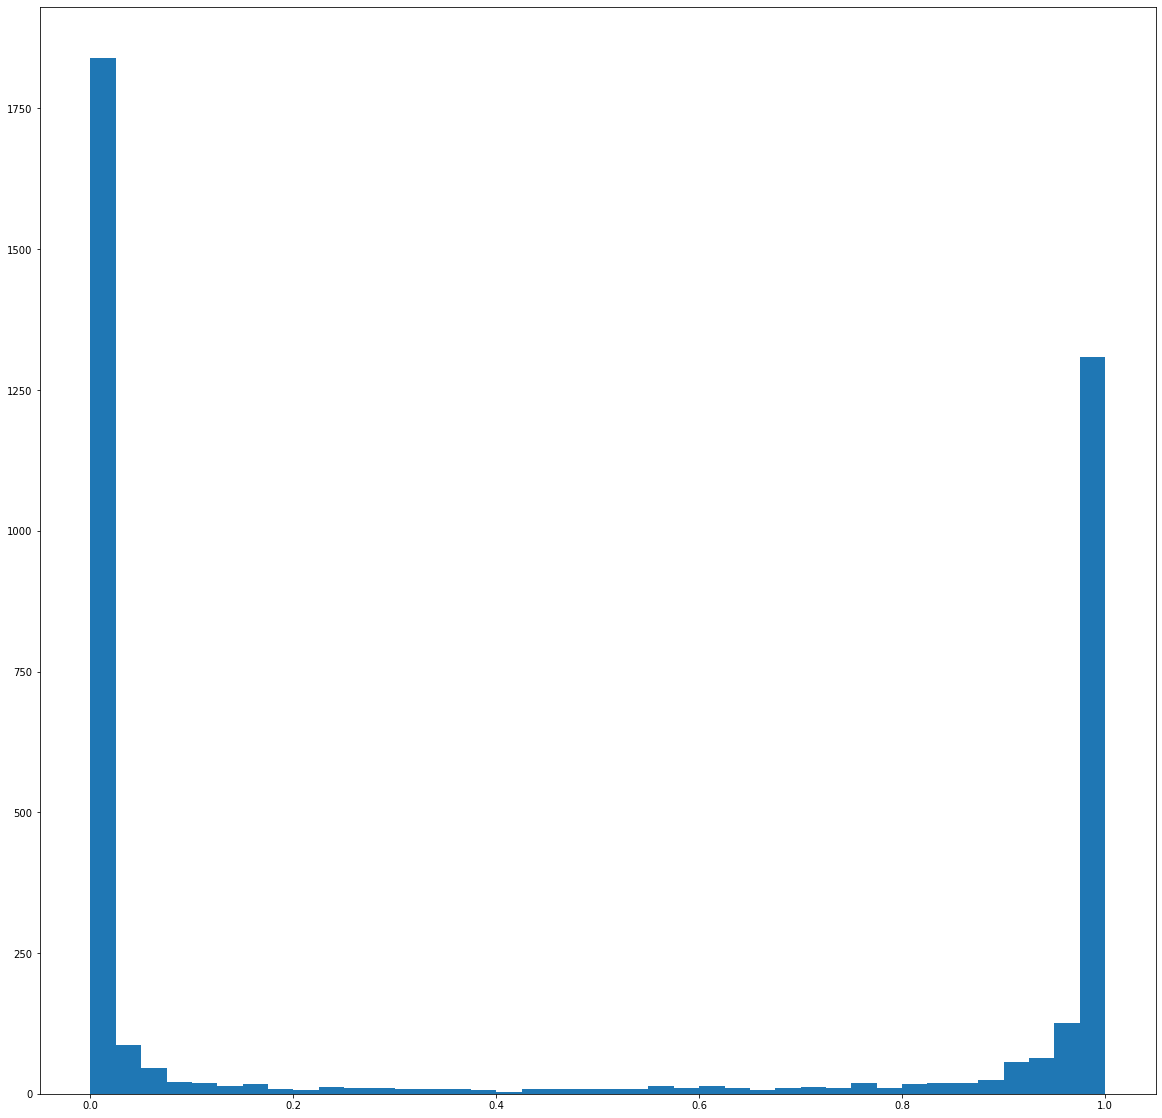

In [211]:
plt.figure(figsize=(20,20))
plt.hist(prediction7, bins=40)
plt.show()

In [209]:
pd.DataFrame(prediction_7_copy, columns=['target']).value_counts()

target
0.0000    1992
1.0000    1928
dtype: int64

In [205]:
pred_to_csv(prediction_7_copy)

0    1992
1    1928
Name: target, dtype: int64


### results

Скор на публичной части тестового набора = 0.9674081738230729.

## final model

Итоговой моделью стала модель с большим количеством весов и долгим обучением. Данная модель дала приемлимый результат на публичном скоре в тестовом наборе, что позволило прекратить дальнейшие попытки улучшения

### model

In [221]:
model12 = Sequential()
model12.add(Dense(128, input_dim=30, activation="relu"))
model12.add(BatchNormalization())
model12.add(Dropout(0.35))
model12.add(Dense(64, activation="relu"))
model12.add(BatchNormalization())
model12.add(Dropout(0.35))
model12.add(Dense(32, activation="relu"))
model12.add(BatchNormalization())
model12.add(Dropout(0.35))
model12.add(Dense(8, activation="relu"))
model12.add(BatchNormalization())
model12.add(Dropout(0.35))
model12.add(Dense(1, activation="sigmoid"))

model12.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', f1_m,precision_m, recall_m])



### train

In [ ]:
result12 = model12.fit(X_train_4,         
          Y_train,         
          batch_size=64,    # Размер батча
          epochs=700,      # Количество эпох
          verbose=1)

Epoch 1/700


2022-08-11 17:31:55.692570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 4s 32ms/step - loss: 0.8484 - accuracy: 0.6012 - f1_m: 0.3703 - precision_m: 0.3438 - recall_m: 0.4167
Epoch 2/700
109/109 [==============================] - 3s 29ms/step - loss: 0.6364 - accuracy: 0.6878 - f1_m: 0.4237 - precision_m: 0.4575 - recall_m: 0.4079
Epoch 3/700
109/109 [==============================] - 4s 33ms/step - loss: 0.5577 - accuracy: 0.7380 - f1_m: 0.4587 - precision_m: 0.5754 - recall_m: 0.3956
Epoch 4/700
109/109 [==============================] - 4s 32ms/step - loss: 0.5080 - accuracy: 0.7699 - f1_m: 0.5109 - precision_m: 0.6536 - recall_m: 0.4278
Epoch 5/700
109/109 [==============================] - 3s 31ms/step - loss: 0.4523 - accuracy: 0.8038 - f1_m: 0.5841 - precision_m: 0.7491 - recall_m: 0.4913
Epoch 6/700
109/109 [==============================] - 3s 29ms/step - loss: 0.4237 - accuracy: 0.8173 - f1_m: 0.6158 - precision_m: 0.7796 - recall_m: 0.5189
Epoch 7/700
109/109 [==============================] - 3s 28ms/s

### predict

In [225]:
prediction12 = model12.predict(test.drop('5', axis=1).values)

In [229]:
prediction_12_copy = prediction12.copy()
prediction_12_copy[prediction_12_copy > 0.1] = 1
prediction_12_copy[prediction_12_copy <= 0.1] = 0
prediction_12_copy

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [230]:
pred_to_csv(prediction_12_copy)

0    2010
1    1910
Name: target, dtype: int64


### result

скор на публичной части тестового набора составил 0.9729729729729729

# Conclusions

Итоговая модель показала скор 0.9729729729729729 на публичной части и  0.9623430962343096 на приватной части тестового набора.  
Этот показатель оказался 2-м по эффективности в общем рейтинге решений (всего было загружено 65+ итоговых моделей).


Что можно было развить:
- можно комбинировать различные признаки применяя fеature selection
- можно попробовать разбить на кластеры все признаки и обучать их разными моделями
- можно было бы применить сжатие данных PCA или автокодировщиком